# Appendix A

## Step 1: Data Import and Initial Review

### 1.1 Import necessary libraries

In [1]:
import os
import warnings
import logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict, Optional, Callable, Any
warnings.filterwarnings('ignore')


# Configure Logger
LOG_FORMAT = "%(asctime)s - %(levelname)s - %(message)s"
logging.basicConfig(level=logging.INFO, format=LOG_FORMAT)
logger = logging.getLogger(__name__)

In [2]:
# Define file paths
train_file_path = 'dataset/aps_failure_training_set.csv'
test_file_path = 'dataset/aps_failure_test_set.csv'

# Load the datasets
try:
    # Load training and test datasets
    train_data = pd.read_csv(train_file_path, skiprows=20,na_values=["na"])  # Replace 'na' with NaN for consistency
    test_data = pd.read_csv(test_file_path, skiprows=20,na_values=["na"])
    
    print("Datasets successfully loaded!")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure the file path is correct.")

Datasets successfully loaded!


In [3]:
# Display basic information about the training dataset
print("\n--- Training Dataset Info ---")
print(train_data.info())  # Summary of columns, data types, and non-null counts

# Display basic information about the test dataset
print("\n--- Test Dataset Info ---")
print(test_data.info())  # Summary of columns, data types, and non-null counts

# Display a few rows from the training dataset to understand its structure
print("\n--- First Five Rows of Training Dataset ---")
print(train_data.head())

# Check for missing values in both datasets
print("\n--- Missing Values in Training Dataset ---")
print(train_data.isnull().sum())

print("\n--- Missing Values in Test Dataset ---")
print(test_data.isnull().sum())



--- Training Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB
None

--- Test Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB
None

--- First Five Rows of Training Dataset ---
  class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_

In [4]:
# Section 2: Initial Exploration

# Display dataset structure
print("\n--- Dataset Structure (Training Data) ---")
print(f"Number of rows: {train_data.shape[0]}, Number of columns: {train_data.shape[1]}")
print(f"Names of Columns/Features:\n {list(train_data.columns)}")

# Generate summary statistics for numerical features
print("\n--- Summary Statistics (Numerical Features) ---")
print(train_data.describe())  # Includes mean, median, std, min, max

# Identify categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
print(f"\n--- Categorical Features ---")
if len(categorical_features) > 0:
    print(categorical_features)
else:
    print("No categorical features found.")




--- Dataset Structure (Training Data) ---
Number of rows: 60000, Number of columns: 171
Names of Columns/Features:
 ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_0

In [5]:
# Section 3: Check for Missing Data

# Calculate percentage of missing values for each feature
missing_percentage = train_data.isnull().mean() * 100
print("\n--- Percentage of Missing Values (Training Data) ---")
print(missing_percentage.sort_values(ascending=False))


print(type(missing_percentage))
print(missing_percentage.index)
missing_percentages = missing_percentage.sort_values(ascending=False)
print(missing_percentages)


--- Percentage of Missing Values (Training Data) ---
br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
ab_000    77.215000
            ...    
cj_000     0.563333
ci_000     0.563333
bt_000     0.278333
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64
<class 'pandas.core.series.Series'>
Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)
br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
ab_000    77.215000
            ...    
cj_000     0.563333
ci_000     0.563333
bt_000     0.278333
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64


br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
cr_000    77.215000
ab_000    77.215000
bn_000    73.348333
bm_000    65.915000
bl_000    45.461667
bk_000    38.390000
ad_000    24.768333
cf_000    24.768333
ch_000    24.768333
cg_000    24.768333
co_000    24.768333
cy_000    23.013333
cz_000    23.013333
cx_000    23.013333
cv_000    23.013333
ct_000    23.013333
dtype: float64


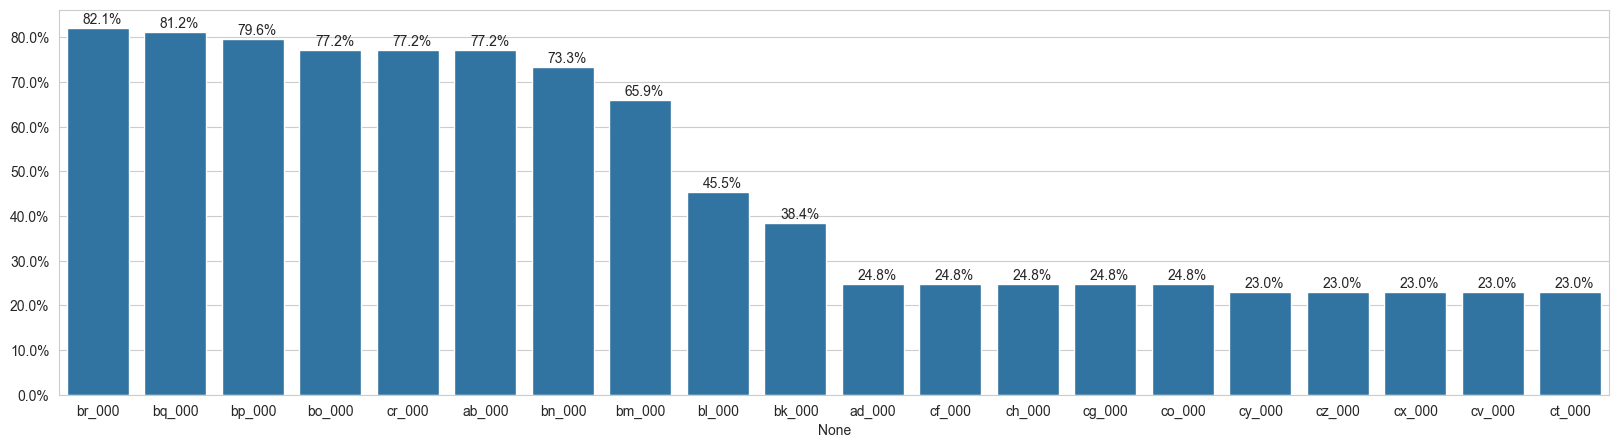

In [6]:
# Plotting a graph showing the top 20 features having highest percentage of missing values 
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,5))

# Plot top 20 missing values
missing_percentage = missing_percentage[missing_percentage > 0]  # Only show features with missing values
missing_percentage = missing_percentage.sort_values(ascending=False)
data_to_plot = missing_percentage.head(20)

print(data_to_plot)

plot = sns.barplot(x=data_to_plot.index, y=data_to_plot.values)

# Add annotations above each bar signifying their value (Shetty, 2021)
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable (Shetty, 2021)
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

In [7]:
# Section 4: Class Imbalance Analysis

# Calculate class proportions
class_counts = train_data['class'].value_counts()
class_proportions = class_counts / len(train_data) * 100

print("\n--- Class Distribution (Training Data) ---")
print(class_counts)
print("\n--- Class Proportions (Training Data) ---")
print(class_proportions)


--- Class Distribution (Training Data) ---
class
neg    59000
pos     1000
Name: count, dtype: int64

--- Class Proportions (Training Data) ---
class
neg    98.333333
pos     1.666667
Name: count, dtype: float64


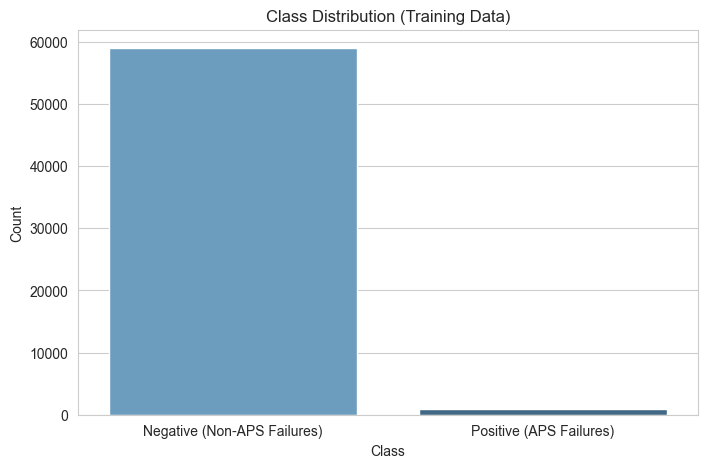

In [8]:
# Visualize class distribution using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues_d")
plt.title("Class Distribution (Training Data)")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks(ticks=[0, 1], labels=["Negative (Non-APS Failures)", "Positive (APS Failures)"])
plt.show()

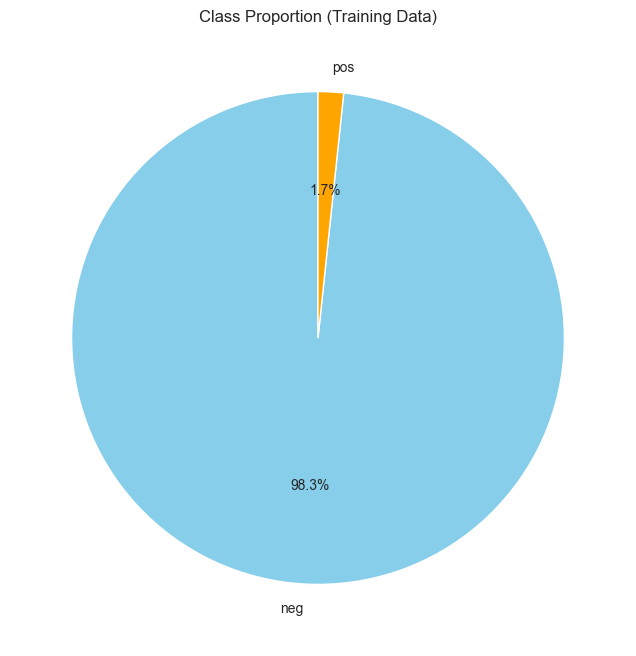

In [9]:
# Visualize class distribution using a pie chart
plt.figure(figsize=(8, 8))
class_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Class Proportion (Training Data)")
plt.ylabel("")
plt.show()

## Step 2: Handle Missing Values

In [10]:
import json

def get_missing_values(
    data: pd.DataFrame,
    label_columns: List[str],
    low_missing_threshold: int = 5,
    moderate_missing_threshold: int = 15,
    high_missing_threshold: int = 70,
    is_training: bool = False,
    verbose: int = 0,
    save_path: str = "missing_values.json",
) -> Tuple[pd.Series, Dict[str, Tuple[int, List[str]]]]:
    ms_values_dict = {}
    if not is_training:
        logger.warning(
            "Training mode turned off. Loading saved missing values dictionary if available."
        )
        if os.path.exists(save_path):
            with open(save_path, "r") as file:
                json_dict = json.load(file)
            ms_values_dict = {
                k: (threshold, features)
                for k, (threshold, features) in json_dict.items()
            }
        else:
            logger.warning(f"No missing values file found at {save_path}")
            return pd.Series(), {}
    else:
        # Calculate the percentage of missing values, excluding the class column(s)
        missing_percentage = data.drop(columns=label_columns).isnull().mean() * 100

        # Categorize features by the percentage of missing values
        ms_values_dict["low"] = (
            low_missing_threshold,
            list(missing_percentage[missing_percentage < low_missing_threshold].index),
        )
        ms_values_dict["moderate"] = (
            moderate_missing_threshold,
            list(
                missing_percentage[
                    (missing_percentage >= low_missing_threshold)
                    & (missing_percentage < moderate_missing_threshold)
                ].index
            ),
        )
        ms_values_dict["high"] = (
            high_missing_threshold,
            list(
                missing_percentage[
                    (missing_percentage >= moderate_missing_threshold)
                    & (missing_percentage <= high_missing_threshold)
                ].index
            ),
        )
        ms_values_dict["very_high"] = (
            high_missing_threshold,
            list(missing_percentage[missing_percentage > high_missing_threshold].index)
            + ["cd_000"],
        )

        # Save dictionary to JSON file
        with open(save_path, "w") as file:
            json.dump(ms_values_dict, file)
            logger.info(f"Missing values dictionary saved to {save_path}")

    # Verbose logging for insights
    if verbose > 0:
        logger.info("\n--- Features Categorized by Missingness ---")
        logger.info(
            f"Low Missing (<{low_missing_threshold}%): "
            f"{len(ms_values_dict['low'][1])} features"
        )
        logger.info(
            f"Moderate Missing ({low_missing_threshold}-{moderate_missing_threshold}%): "
            f"{len(ms_values_dict['moderate'][1])} features"
        )
        logger.info(
            f"High Missing ({moderate_missing_threshold}-{high_missing_threshold}%): "
            f"{len(ms_values_dict['high'][1])} features"
        )
        logger.info(
            f"Very High Missing (>{high_missing_threshold}%): "
            f"{len(ms_values_dict['very_high'][1])} features\n\n"
        )

    return ms_values_dict


In [11]:
import joblib
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import SimpleImputer, IterativeImputer

def remove_missing_values(
    data: pd.DataFrame,
    label_columns: List[str],
    low_missing_threshold: int = 5,
    moderate_missing_threshold: int = 15,
    high_missing_threshold: int = 70,
    is_training: bool = False,
    verbose: int = 0,
    save_path: str = "missing_values.json",
) -> pd.DataFrame:
    """
    Remove missing values from a DataFrame and apply imputation where necessary.

    Args:
        data (pd.DataFrame): The input DataFrame.
        label_columns (List[str]): List of label columns to exclude from missing value operations.
        low_missing_threshold (int): Threshold for low missing values.
        moderate_missing_threshold (int): Threshold for moderate missing values.
        high_missing_threshold (int): Threshold for high missing values.
        is_training (bool): Whether the function is in training mode.
        verbose (int): Verbosity level for logging.
        save_path (str): Path to save or load missing value metadata.

    Returns:
        pd.DataFrame: Cleaned DataFrame with missing values handled.
    """
    # Assume get_missing_values is defined elsewhere and provides the necessary structure
    missing_values = get_missing_values(
        data, label_columns, low_missing_threshold, moderate_missing_threshold,
        high_missing_threshold, is_training, verbose, save_path
    )

    logger.info("Missing_values")
    logger.info(f"\n--- Removing Missing Values ---\nInitial Data Shape: {data.shape}")

    # Drop rows with less than 5% missing values
    if missing_values["low"][1]:
        data_cleaned = data.dropna(subset=missing_values["low"][1], axis=0)
    else:
        raise ValueError(
            f"Error dropping row with less than 5% missing values: "
            f"{missing_values['low'][0]}"
        )

    # Impute for 5%-15% missing values using median/mode imputation
    if is_training:
        simple_imputer = SimpleImputer(strategy="median")
        if missing_values["moderate"][1]:
            data_cleaned[missing_values["moderate"][1]] = simple_imputer.fit_transform(
                data_cleaned[missing_values["moderate"][1]]
            )

        # Impute for 15%-70% missing values using MICE
        mice_imputer = IterativeImputer(max_iter=10, random_state=42)
        if missing_values["high"][1]:
            data_cleaned[missing_values["high"][1]] = mice_imputer.fit_transform(
                data_cleaned[missing_values["high"][1]]
            )

        joblib.dump(simple_imputer, "median_imputer.joblib")
        joblib.dump(mice_imputer, "mice_imputer.joblib")
    else:
        simple_imputer = joblib.load("median_imputer.joblib")
        mice_imputer = joblib.load("mice_imputer.joblib")

        if missing_values["moderate"][1]:
            data_cleaned[missing_values["moderate"][1]] = simple_imputer.transform(
                data_cleaned[missing_values["moderate"][1]]
            )

        if missing_values["high"][1]:
            data_cleaned[missing_values["high"][1]] = mice_imputer.transform(
                data_cleaned[missing_values["high"][1]]
            )

    # Drop features with >70% missing values
    if missing_values["very_high"][1]:
        data_cleaned.drop(columns=missing_values["very_high"][1], inplace=True)

    if verbose > 0:
        logger.info(
            f"Dropped rows with <{low_missing_threshold}% missing values: "
            f"{missing_values['low'][1]}"
        )
        logger.info(f"Features with median imputation: {missing_values['moderate'][1]}")
        logger.info(f"Features imputed using MICE: {missing_values['high'][1]}")
        logger.info(
            f"Dropped features due to high missing values: "
            f"{missing_values['very_high'][1]}"
        )
        logger.info(f"Final Data Shape: {data_cleaned.shape}")

    logger.info(
        f"\n--- Data cleaning complete. Final shape: {data_cleaned.shape} ---\n\n"
    )
    return data_cleaned


In [12]:

def remove_outliers(data: pd.DataFrame, label_columns: List[str]) -> (pd.DataFrame, List[str]):
    """
    Removes outliers from a DataFrame by capping values based on z-score thresholds.

    Args:
        data (pd.DataFrame): The input DataFrame containing features and labels.
        label_columns (List[str]): List of columns to exclude from outlier detection.

    Returns:
        pd.DataFrame: DataFrame with outliers capped.
        List[str]: List of numerical feature columns considered for outlier detection.
    """
    # Identify numerical features
    numerical_features = data.drop(columns=label_columns, axis=1).select_dtypes(
        include=["float64", "int64"]
    ).columns

    # Use z-scores to identify outliers
    z_scores = np.abs(
        (data[numerical_features] - data[numerical_features].mean())
        / data[numerical_features].std()
    )

    # Define a threshold for identifying outliers (e.g., z > 3)
    outlier_threshold = 3
    outliers = (z_scores > outlier_threshold).sum()

    logger.info("\n--- Outlier Detection ---")
    logger.info(f"Number of outliers per feature (z > {outlier_threshold}):\n{outliers}")

    # Decide how to handle outliers (capping in this example)
    for feature in numerical_features:
        upper_limit = data[feature].mean() + outlier_threshold * data[feature].std()
        lower_limit = data[feature].mean() - outlier_threshold * data[feature].std()
        data[feature] = np.clip(data[feature], lower_limit, upper_limit)

    logger.info(
        f"\n--- Outliers have been capped based on z-score thresholds. "
        f"Final Data Shape: {data.shape} ---\n"
    )

    return data, list(numerical_features)


In [13]:
def wrangle_dataset(
        data: pd.DataFrame,
        label_columns: List[str],
        low_missing_threshold: int = 5,
        moderate_missing_threshold: int = 15,
        high_missing_threshold: int = 70,
        is_training: bool = False,
        verbose: int = 0,
        save_path: str = "missing_values.json"
):
    cleaned_data = remove_missing_values(data, label_columns, low_missing_threshold,
                                         moderate_missing_threshold, high_missing_threshold,
                                         is_training, verbose, save_path)
    
    cleaned_data, numerical_features = remove_outliers(data=cleaned_data, label_columns=label_columns)
    return cleaned_data, numerical_features


# Ensure train_data is a valid DataFrame before running this
train_data_cleaned, numerical_features = wrangle_dataset(
    data=train_data, 
    label_columns=['class'], 
    is_training=True, 
    verbose=1
)


train_data_cleaned.info()

2025-02-09 21:30:17,364 - INFO - Missing values dictionary saved to missing_values.json
2025-02-09 21:30:17,366 - INFO - 
--- Features Categorized by Missingness ---
2025-02-09 21:30:17,369 - INFO - Low Missing (<5%): 128 features
2025-02-09 21:30:17,371 - INFO - Moderate Missing (5-15%): 14 features
2025-02-09 21:30:17,373 - INFO - High Missing (15-70%): 21 features
2025-02-09 21:30:17,376 - INFO - Very High Missing (>70%): 8 features


2025-02-09 21:30:17,378 - INFO - Missing_values
2025-02-09 21:30:17,380 - INFO - 
--- Removing Missing Values ---
Initial Data Shape: (60000, 171)
2025-02-09 21:30:34,209 - INFO - Dropped rows with <5% missing values: ['aa_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', '

<class 'pandas.core.frame.DataFrame'>
Index: 55936 entries, 0 to 59999
Columns: 163 entries, class to eg_000
dtypes: float64(162), object(1)
memory usage: 70.0+ MB


In [14]:
# Example Usage
# Ensure train_data is a valid DataFrame before running this
test_data_cleaned, numerical_features = wrangle_dataset(
    data=test_data, 
    label_columns=['class'], 
    is_training=False, 
    verbose=1
)

test_data_cleaned.info()

2025-02-09 21:30:35,578 - WARNING - Training mode turned off. Loading saved missing values dictionary if available.
2025-02-09 21:30:35,581 - INFO - 
--- Features Categorized by Missingness ---
2025-02-09 21:30:35,583 - INFO - Low Missing (<5%): 128 features
2025-02-09 21:30:35,584 - INFO - Moderate Missing (5-15%): 14 features
2025-02-09 21:30:35,585 - INFO - High Missing (15-70%): 21 features
2025-02-09 21:30:35,587 - INFO - Very High Missing (>70%): 8 features


2025-02-09 21:30:35,587 - INFO - Missing_values
2025-02-09 21:30:35,588 - INFO - 
--- Removing Missing Values ---
Initial Data Shape: (16000, 171)
2025-02-09 21:30:36,213 - INFO - Dropped rows with <5% missing values: ['aa_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay

<class 'pandas.core.frame.DataFrame'>
Index: 14891 entries, 0 to 15999
Columns: 163 entries, class to eg_000
dtypes: float64(162), object(1)
memory usage: 18.6+ MB


## Step 3: Exploratory Data Analysis (EDA)

In [15]:
from collections import Counter
# Extract feature prefixes
feature_prefix_counts = Counter([name.split('_')[0] for name in train_data_cleaned.columns])

In [16]:
# Get unique feature prefixes and their counts
feature_prefixes = list(feature_prefix_counts.keys())
bin_counts = list(feature_prefix_counts.values())

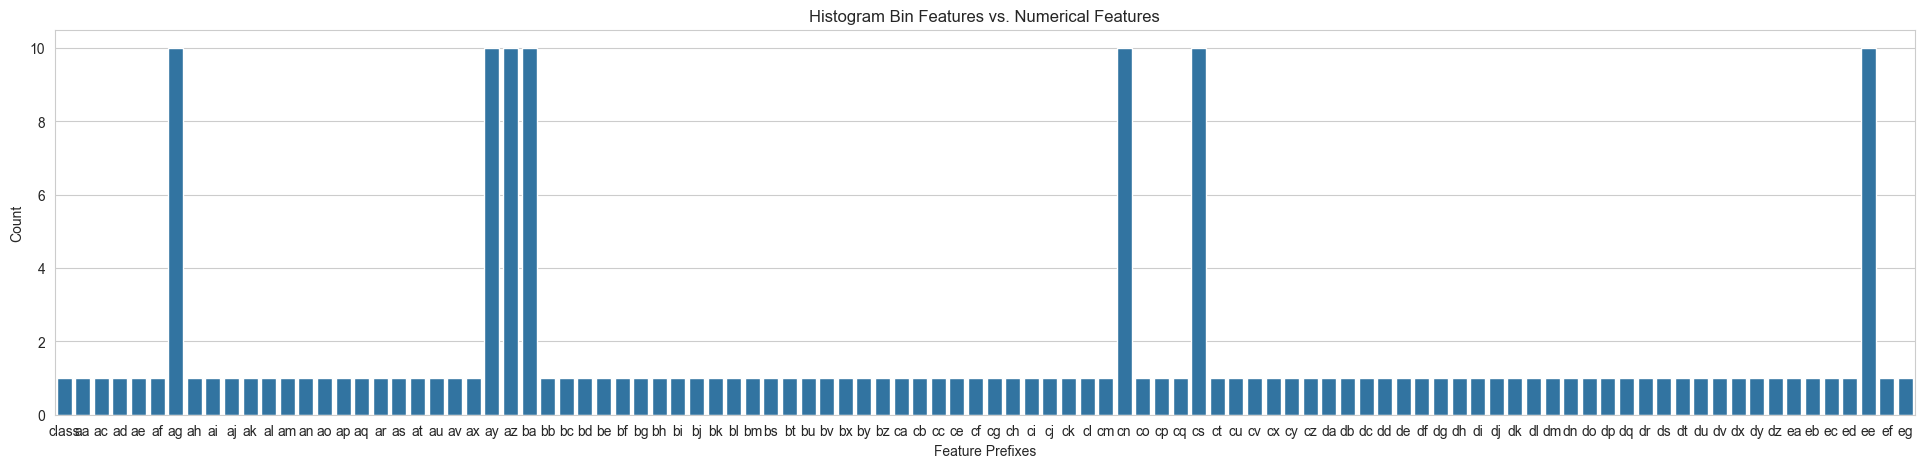

In [17]:
# Plot the feature distribution
plt.figure(figsize=(24, 5))
sns.barplot(x=feature_prefixes, y=bin_counts)
plt.xlabel("Feature Prefixes")
plt.ylabel("Count")
plt.title("Histogram Bin Features vs. Numerical Features")
plt.show()

In [18]:
# Identify histogram features based on bin count
hist_identifiers = [prefix for prefix, count in zip(feature_prefixes, bin_counts) if count == 10]
print("The Histogram Identifiers are:", hist_identifiers)

# Extract feature names containing histogram bin information
hist_features = [col for col in train_data_cleaned.columns if col.split('_')[0] in hist_identifiers]
print(f"\nThere are {len(hist_features)} features that contain histogram bin information:\n{hist_features}")

The Histogram Identifiers are: ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']

There are 70 features that contain histogram bin information:
['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']


In [19]:
# Convert the target column ('class') to binary (0 for 'neg', 1 for 'pos')
train_data_cleaned['class'] = train_data_cleaned['class'].map({'neg':0, 'pos':1})
train_data_cleaned['class'].value_counts()

class
0    55340
1      596
Name: count, dtype: int64

In [20]:
# Define feature matrix (X) and target variable (y)
X_train = train_data_cleaned.drop('class', axis=1)
y_train = train_data_cleaned['class']

In [21]:
# Separating the top features from the datasets
histogram_data = X_train[hist_features]
x_without_hist = X_train.drop(hist_features,axis=1)

histogram_data

ag_000  ag_001  ag_002  ag_003   ag_004     ag_005     ag_006  \
0         0.0     0.0     0.0     0.0  37250.0  1432864.0  3664156.0   
1         0.0     0.0     0.0     0.0  18254.0   653294.0  1720800.0   
2         0.0     0.0     0.0     0.0   1648.0   370592.0  1883374.0   
3         0.0     0.0     0.0   318.0   2212.0     3232.0     1872.0   
4         0.0     0.0     0.0     0.0  43752.0  1966618.0  1800340.0   
...       ...     ...     ...     ...      ...        ...        ...   
59995     0.0     0.0     0.0  2564.0  59100.0  1603216.0  6015982.0   
59996     0.0     0.0     0.0     0.0    104.0    99186.0    36564.0   
59997     0.0     0.0     0.0     0.0     28.0    11592.0    11538.0   
59998     0.0     0.0     0.0     0.0    330.0   202498.0  3251010.0   
59999     0.0     0.0     0.0     0.0   1226.0    46284.0  1901140.0   

          ag_007    ag_008   ag_009  ...     ee_000     ee_001     ee_002  \
0      1007684.0   25896.0      0.0  ...   965866.0  1706908.0  1240520.0   
1       516724.0   31642.0      0.0  ...   664504.0   824154.0   421400.0   
2       292936.0   12016.0      0.0  ...   262032.0   453378.0   277378.0   
3            0.0       0.0      0.0  ...     5670.0     1566.0      240.0   
4       131646.0    4588.0      0.0  ...   404740.0   904230.0   622012.0   
...          ...       ...      ...  ...        ...        ...        ...   
59995  1968266.0  164972.0  12560.0  ...  1608808.0  1479066.0   998500.0   
59996      128.0       0.0      0.0  ...    13934.0    15024.0    10578.0   
59997        0.0       0.0      0.0  ...    15876.0     2740.0      792.0   
59998  2061456.0  360436.0  59754.0  ...  1180714.0  1709450.0   699352.0   
59999   855376.0   61744.0   6318.0  ...   409798.0   686416.0   440066.0   

         ee_003     ee_004     ee_005     ee_006    ee_007    ee_008  \
0      493384.0   721044.0   469792.0   339156.0  157956.0   73224.0   
1      178064.0   293306.0   245416.0   133654.0   81140.0   97576.0   
2      159812.0   423992.0   409564.0   320746.0  158022.0   95128.0   
3          46.0       58.0       44.0       10.0       0.0       0.0   
4      229790.0   405298.0   347188.0   286954.0  311560.0  433954.0   
...         ...        ...        ...        ...       ...       ...   
59995  566884.0  1290398.0  1218244.0  1019768.0  717762.0  898642.0   
59996    6760.0    21126.0    68424.0      136.0       0.0       0.0   
59997     386.0      452.0      144.0      146.0    2622.0       0.0   
59998  222654.0   347378.0   225724.0   194440.0  165070.0  802280.0   
59999  183200.0   344546.0   254068.0   225148.0  158304.0  170384.0   

             ee_009  
0           0.00000  
1        1500.00000  
2         514.00000  
3           0.00000  
4        1218.00000  
...             ...  
59995   28588.00000  
59996       0.00000  
59997       0.00000  
59998  128558.94912  
59999     158.00000  

[55936 rows x 70 columns]

In [22]:
def plot_importance_score(data: pd.Series):
    plt.figure(figsize=(12, 8))
    plot = sns.barplot(x=data.values, y=data.index, palette="Blues_d", orient='h')

    # Add annotations above each bar
    for p in plot.patches:
        plot.annotate(
            '{:.4f}%'.format(p.get_width()),  # Format score as a percentage
            (p.get_width(), p.get_y() + p.get_height() / 2),  # Properly position annotation
            ha='left', va='center', fontsize=10, color='black', weight='bold'
        )

    plt.title('Features Importance Scores')
    plt.xlabel('Scores')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

2025-02-09 21:30:39,036 - INFO - Starting feature selection process...
2025-02-09 21:31:22,870 - INFO - --- Mutual Information Scores ---
cs_002    0.026341
cs_004    0.024963
ba_003    0.024630
ee_000    0.024594
ag_005    0.024535
            ...   
ay_004    0.001648
ay_003    0.001585
ay_000    0.001426
ay_001    0.000697
cs_009    0.000000
Name: Mutual_Info_Score, Length: 70, dtype: float64


Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

2025-02-09 21:41:28,649 - INFO - 
--- Top Features Selected by RFE ---
['ag_002', 'ag_004', 'ay_002', 'ay_005', 'ay_006', 'ay_008', 'az_001', 'az_003', 'ba_002', 'ba_008', 'cn_007', 'cs_002', 'ee_002', 'ee_005', 'ee_007']
2025-02-09 21:42:09,378 - INFO - 
--- Top Features Selected by SelectKBest ---
Index(['ag_005', 'az_000', 'az_001', 'az_002', 'az_005', 'ba_000', 'ba_001',
       'ba_002', 'ba_003', 'ba_004', 'cn_003', 'cn_004', 'cs_002', 'cs_004',
       'ee_000'],
      dtype='object')
2025-02-09 21:42:09,379 - INFO - 
--- Combined Selected Features ---
Total: 27
['ba_002', 'ag_005', 'cn_004', 'ee_005', 'az_000', 'ba_003', 'cs_004', 'ba_004', 'ee_002', 'az_003', 'ee_007', 'ba_001', 'az_002', 'ag_004', 'ee_000', 'cs_002', 'ay_006', 'ay_008', 'ag_002', 'ba_000', 'az_005', 'ay_005', 'ay_002', 'cn_007', 'cn_003', 'az_001', 'ba_008']


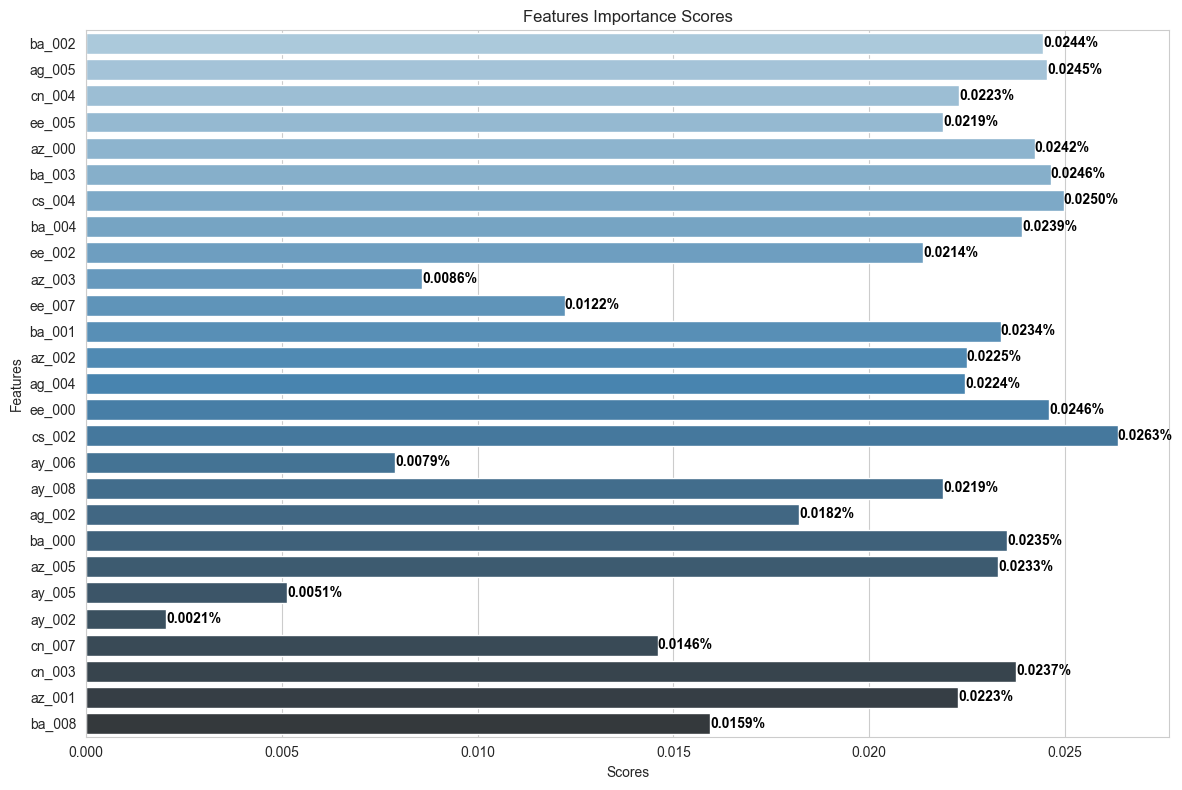

In [23]:
import pandas as pd
import logging
from sklearn.feature_selection import RFE, mutual_info_classif, SelectKBest
from sklearn.tree import DecisionTreeClassifier

def select_top_k_features(data: pd.DataFrame, y: pd.Series, n_selection: int, 
                          plot_scores: bool = True, verbose: int = 3) -> pd.Series:
    logger.info("Starting feature selection process...")

    # Mutual Information Scores
    mutual_info_scores = mutual_info_classif(data, y)
    mutual_info_scores = pd.Series(data=mutual_info_scores, index=data.columns, name='Mutual_Info_Score')
    mutual_info_scores.sort_values(ascending=False, inplace=True)
    logger.info(f"--- Mutual Information Scores ---\n{mutual_info_scores}")

    # Recursive Feature Elimination (RFE) with Decision Tree
    estimator = DecisionTreeClassifier(random_state=42)
    rfe_selector = RFE(
        estimator=estimator,
        n_features_to_select=n_selection,
        step=1,  
        verbose=verbose
    )
    rfe_selector.fit(data, y)

    # Get top selected features from RFE
    rfe_selected_features = data.columns[rfe_selector.support_].tolist()
    logger.info(f"\n--- Top Features Selected by RFE ---\n{rfe_selected_features}")

    # SelectKBest for Mutual Information Scores
    kbest_selector = SelectKBest(mutual_info_classif, k=n_selection)
    kbest_selector.fit(data, y)
    selected_kbest_cols = data.columns[kbest_selector.get_support()]
    logger.info(f"\n--- Top Features Selected by SelectKBest ---\n{selected_kbest_cols}")

    # Combine selected features from both methods
    selected_features = list(set(rfe_selected_features).union(selected_kbest_cols))

    logger.info(f"\n--- Combined Selected Features ---\nTotal: {len(selected_features)}\n{selected_features}")

    selected_features_df = mutual_info_scores.loc[selected_features]
    if plot_scores:
        if "plot_importance_score" in globals():
            plot_importance_score(selected_features_df)
        else:
            logger.warning("plot_importance_score function is not defined!")

    return selected_features_df

# Call the function
selected_features_df = select_top_k_features(data=histogram_data, y=y_train, n_selection=15)
selected_features = selected_features_df.index.tolist()


### Binned Selected Features Analysis


Feature: ba_002
Class 0 - Mean: 252747.15, Std Dev: 399245.77
Class 1 - Mean: 1821248.6, Std Dev: 925573.73


2025-02-09 21:42:11,266 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:11,345 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


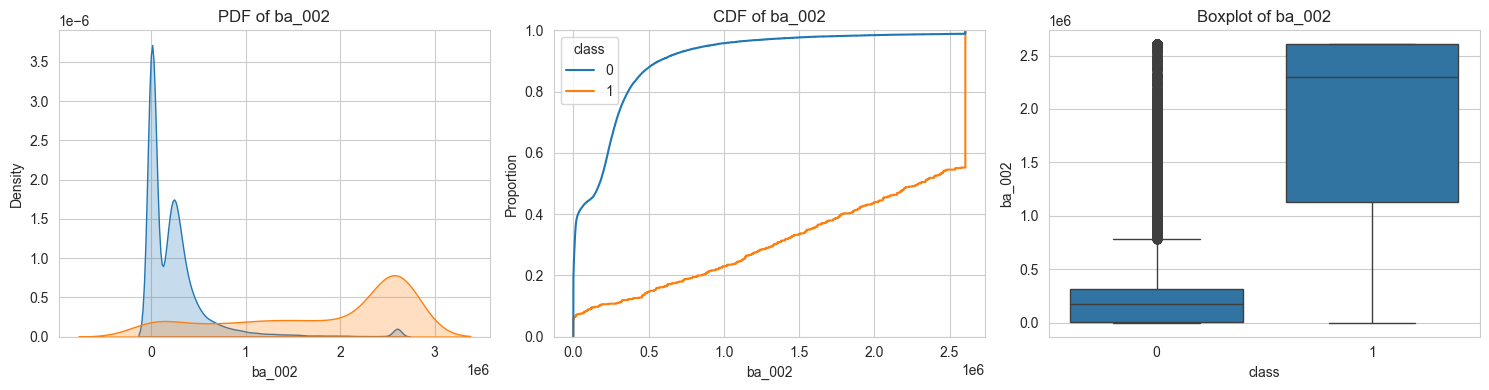


Feature: ag_005
Class 0 - Mean: 673667.09, Std Dev: 1268774.82
Class 1 - Mean: 5467078.98, Std Dev: 2821820.41


2025-02-09 21:42:12,995 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:13,052 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


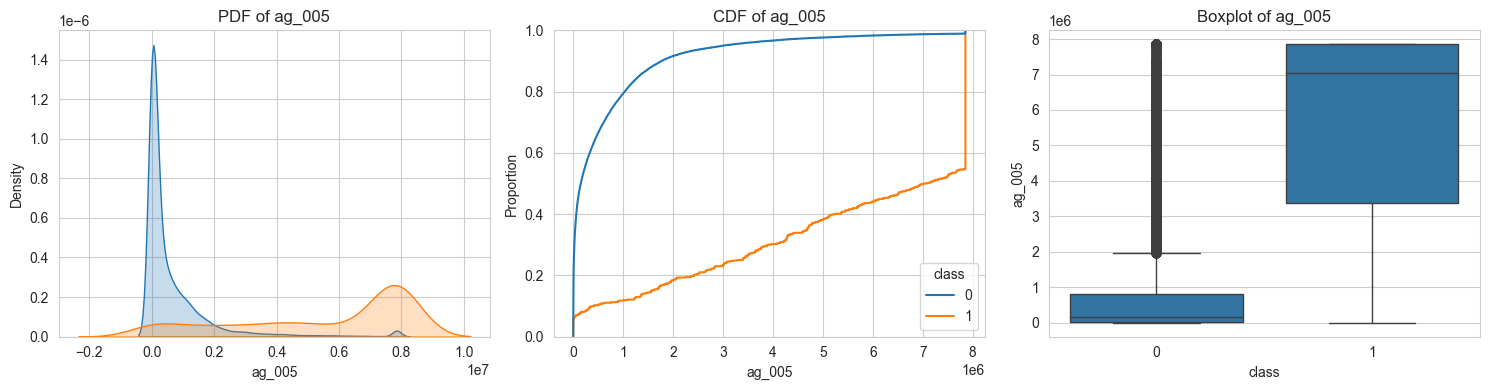


Feature: cn_004
Class 0 - Mean: 839330.47, Std Dev: 1290185.95
Class 1 - Mean: 5361097.17, Std Dev: 2915860.26


2025-02-09 21:42:14,711 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:14,768 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


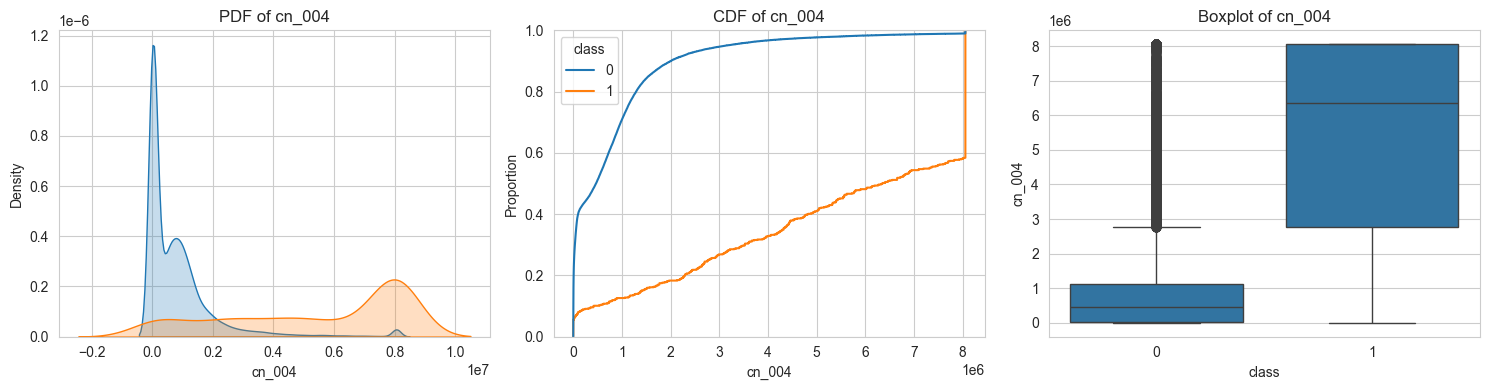


Feature: ee_005
Class 0 - Mean: 274215.65, Std Dev: 393568.27
Class 1 - Mean: 1699401.77, Std Dev: 1035584.43


2025-02-09 21:42:16,578 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:16,642 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


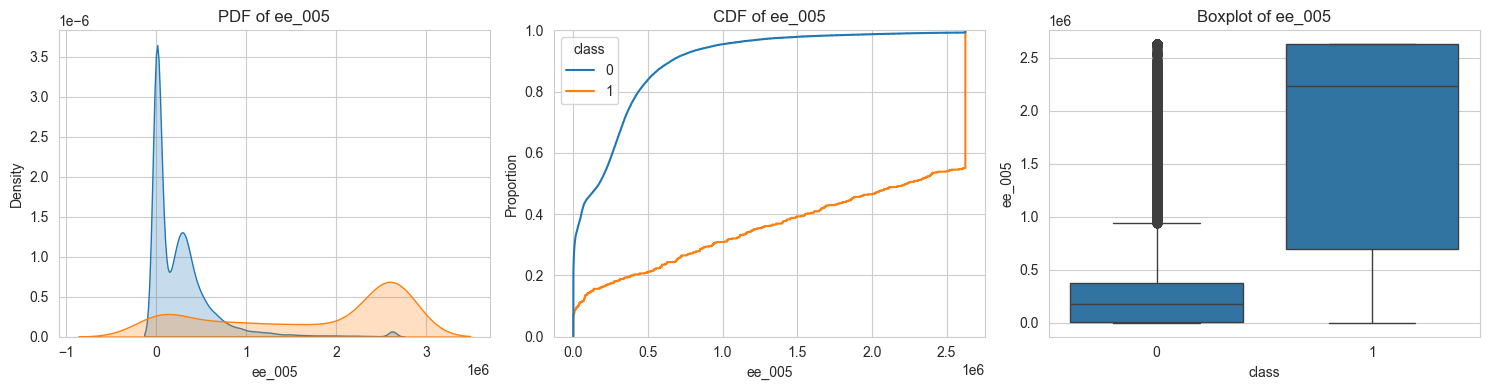


Feature: az_000
Class 0 - Mean: 4113.24, Std Dev: 10272.3
Class 1 - Mean: 55453.29, Std Dev: 50907.67


2025-02-09 21:42:17,890 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:17,947 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


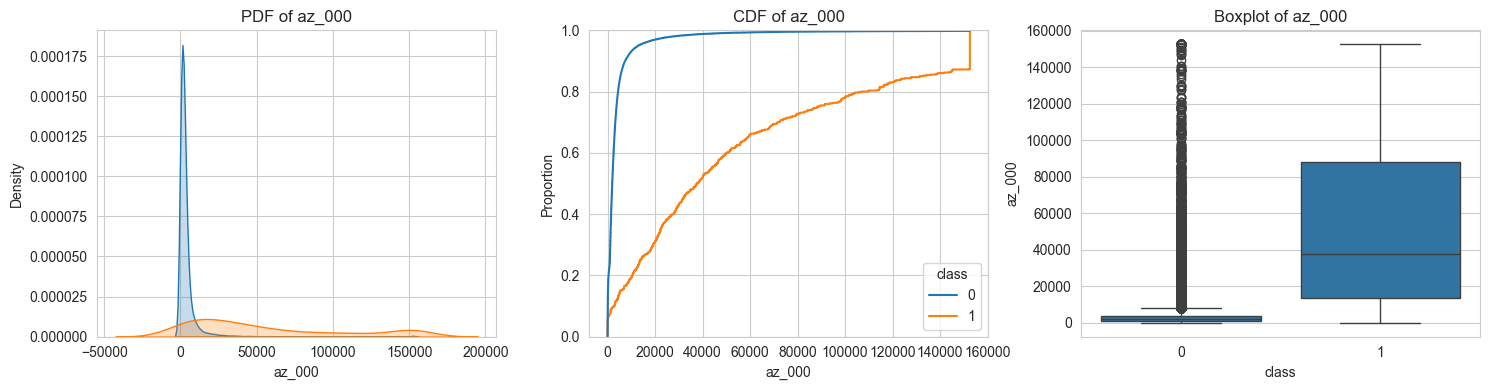


Feature: ba_003
Class 0 - Mean: 174931.57, Std Dev: 262686.09
Class 1 - Mean: 1165446.46, Std Dev: 591149.8


2025-02-09 21:42:19,613 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:19,678 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


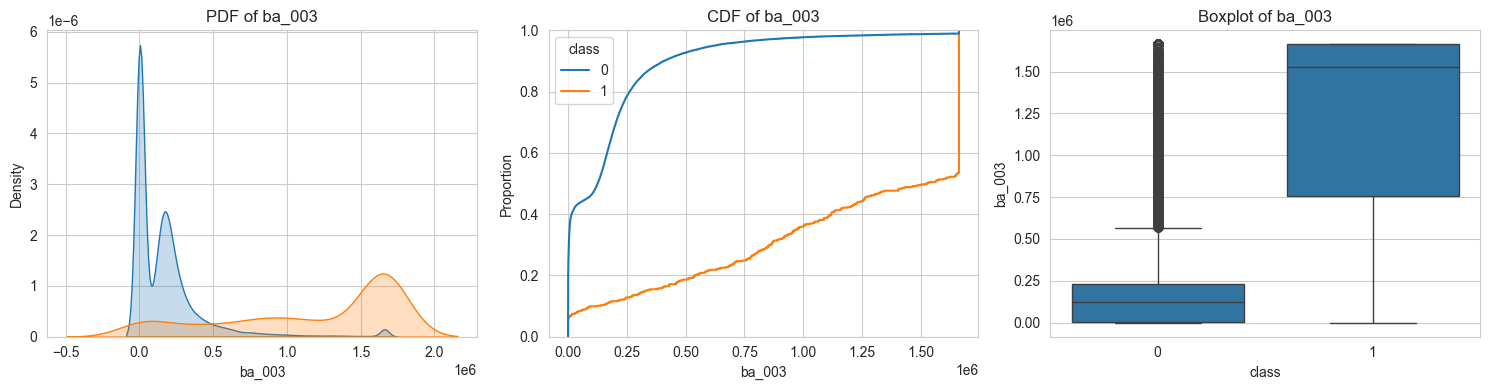


Feature: cs_004
Class 0 - Mean: 205035.99, Std Dev: 540146.55
Class 1 - Mean: 2687322.51, Std Dev: 1865010.05


2025-02-09 21:42:21,368 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:21,475 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


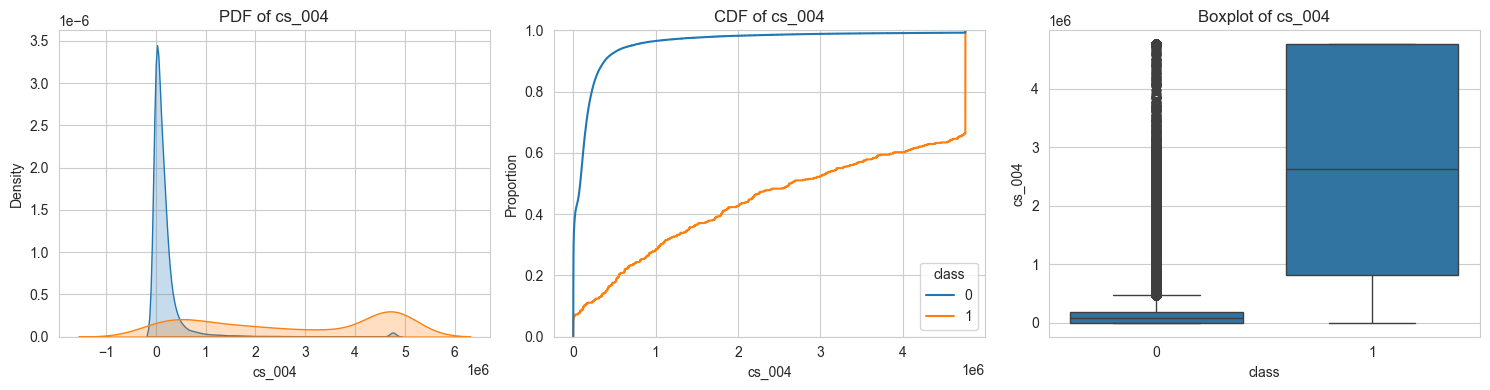


Feature: ba_004
Class 0 - Mean: 135852.42, Std Dev: 200144.14
Class 1 - Mean: 838808.52, Std Dev: 446858.1


2025-02-09 21:42:23,293 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:23,364 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


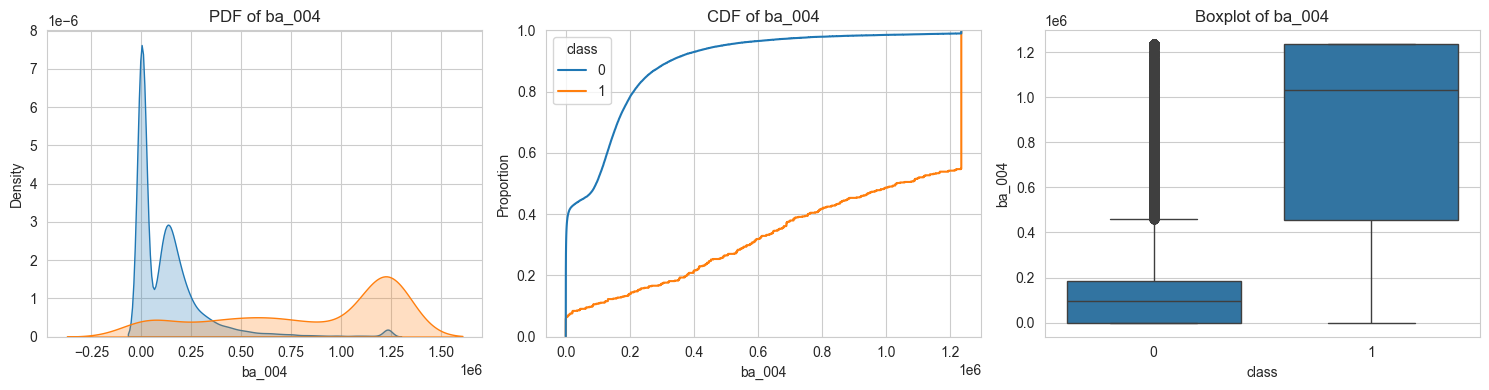


Feature: ee_002
Class 0 - Mean: 306233.04, Std Dev: 453072.71
Class 1 - Mean: 1854181.83, Std Dev: 1082530.44


2025-02-09 21:42:24,914 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:24,969 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


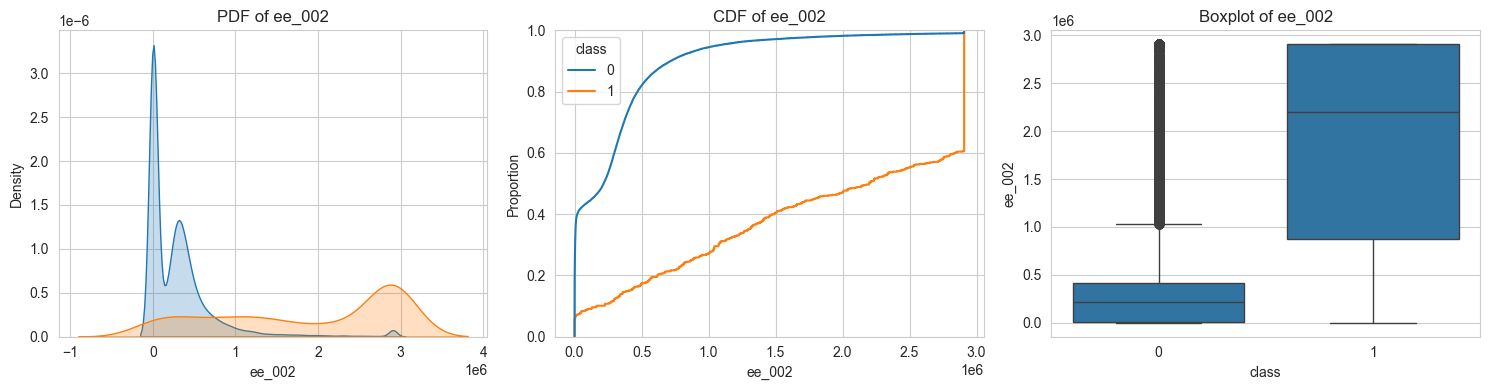


Feature: az_003
Class 0 - Mean: 55657.64, Std Dev: 143415.85
Class 1 - Mean: 210253.21, Std Dev: 330013.06


2025-02-09 21:42:26,425 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:26,482 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


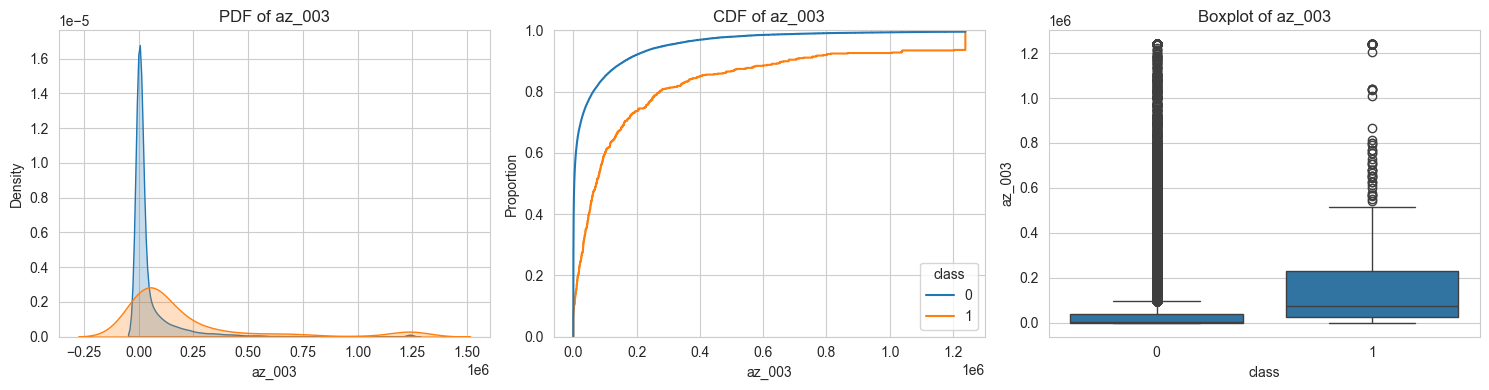


Feature: ee_007
Class 0 - Mean: 174434.37, Std Dev: 484325.76
Class 1 - Mean: 1260042.51, Std Dev: 1384523.08


2025-02-09 21:42:28,001 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:28,060 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


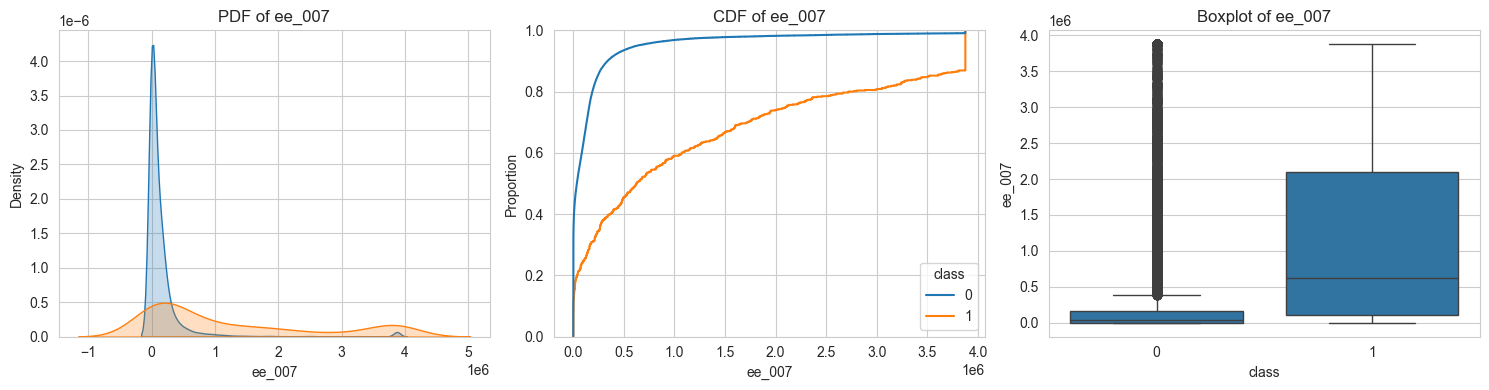


Feature: ba_001
Class 0 - Mean: 589463.33, Std Dev: 868279.41
Class 1 - Mean: 3763311.7, Std Dev: 1926866.25


2025-02-09 21:42:29,819 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:29,878 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


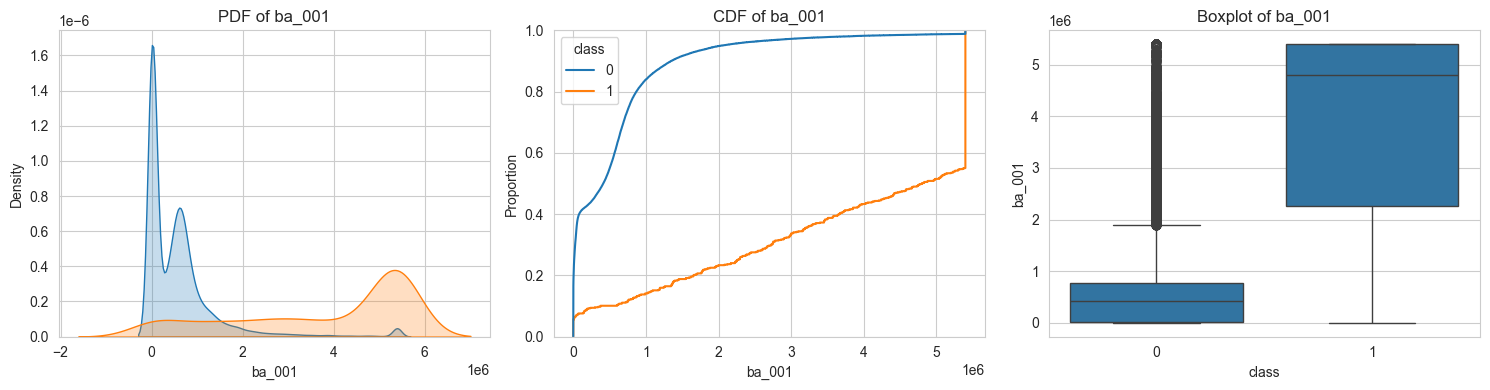


Feature: az_002
Class 0 - Mean: 3679.24, Std Dev: 12477.07
Class 1 - Mean: 62491.23, Std Dev: 69103.97


2025-02-09 21:42:31,273 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:31,334 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


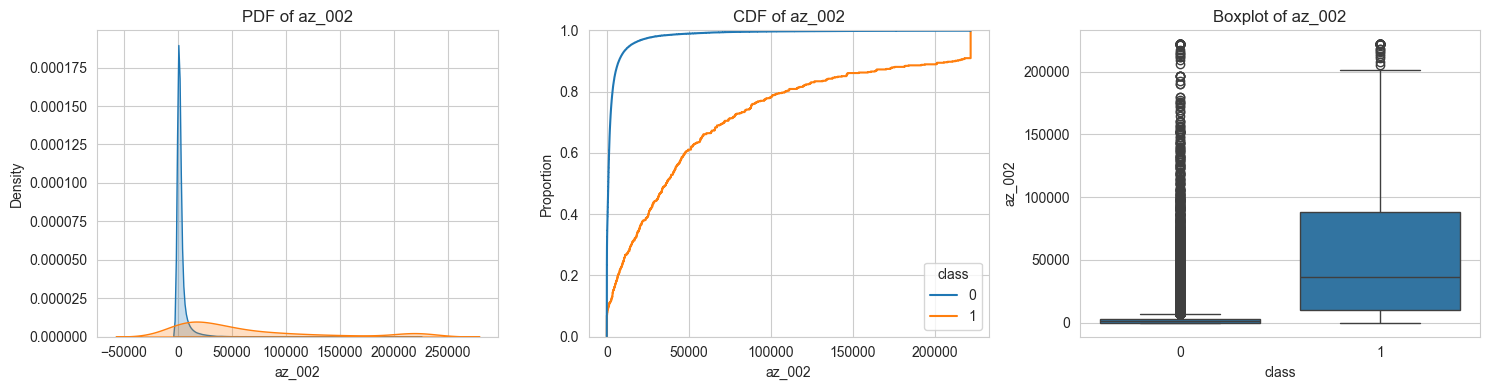


Feature: ag_004
Class 0 - Mean: 177864.92, Std Dev: 711312.84
Class 1 - Mean: 2990868.85, Std Dev: 2342599.3


2025-02-09 21:42:32,839 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:32,894 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


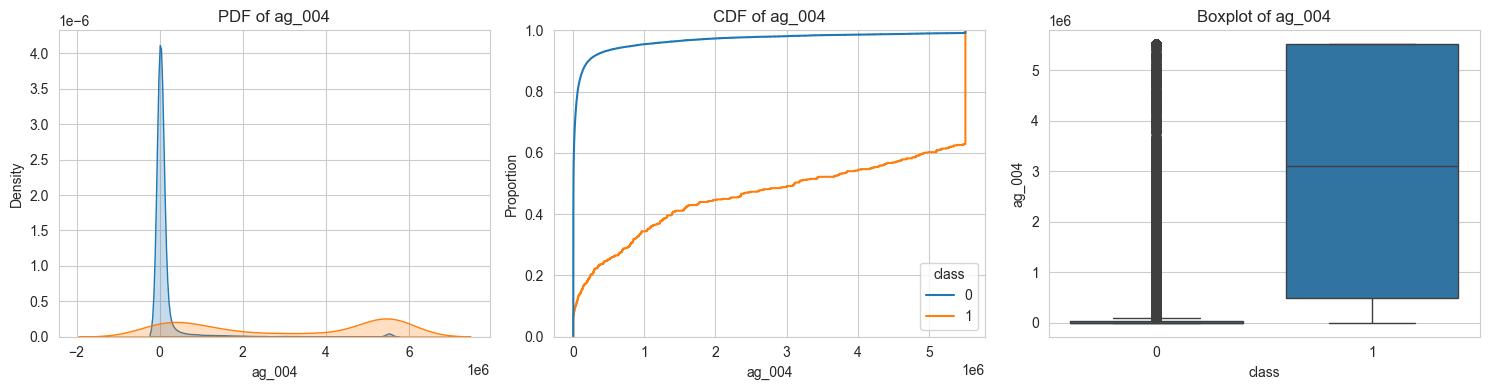


Feature: ee_000
Class 0 - Mean: 444468.81, Std Dev: 764033.85
Class 1 - Mean: 3585103.51, Std Dev: 1900469.21


2025-02-09 21:42:34,481 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:34,539 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


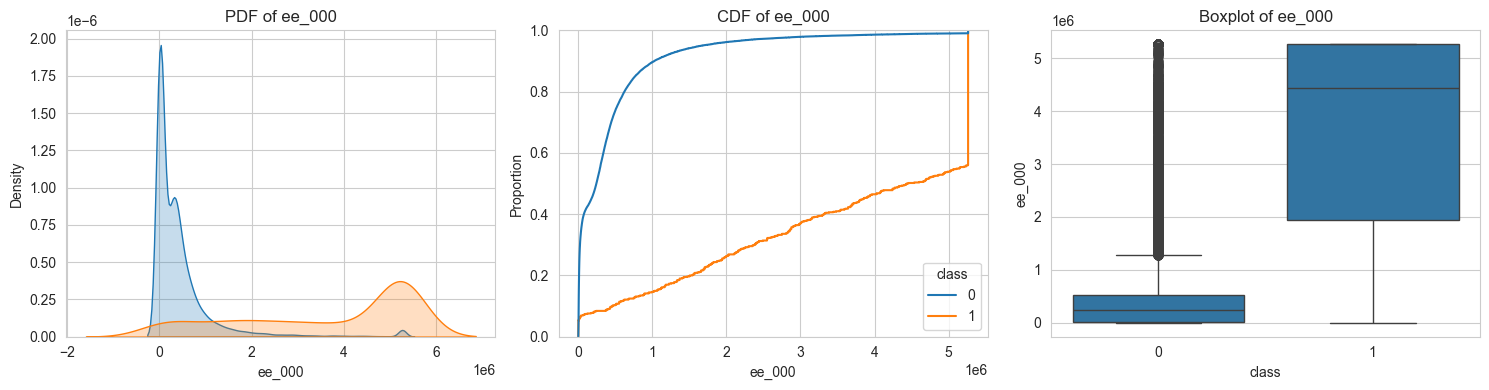


Feature: cs_002
Class 0 - Mean: 104252.27, Std Dev: 302517.17
Class 1 - Mean: 1624227.23, Std Dev: 1012979.6


2025-02-09 21:42:36,011 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:36,068 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


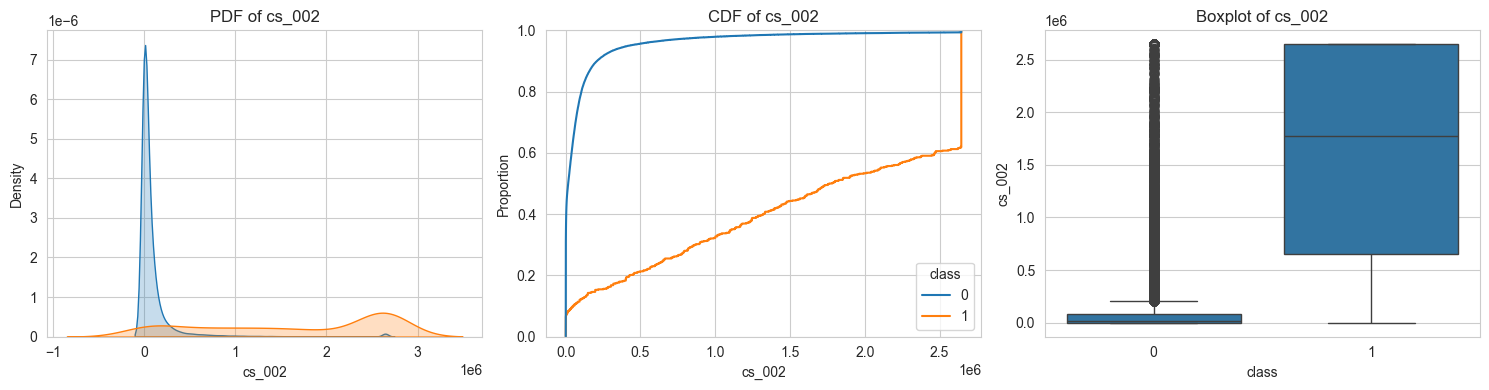


Feature: ay_006
Class 0 - Mean: 827244.52, Std Dev: 1283793.02
Class 1 - Mean: 1860523.81, Std Dev: 3035459.06


2025-02-09 21:42:37,763 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:37,819 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


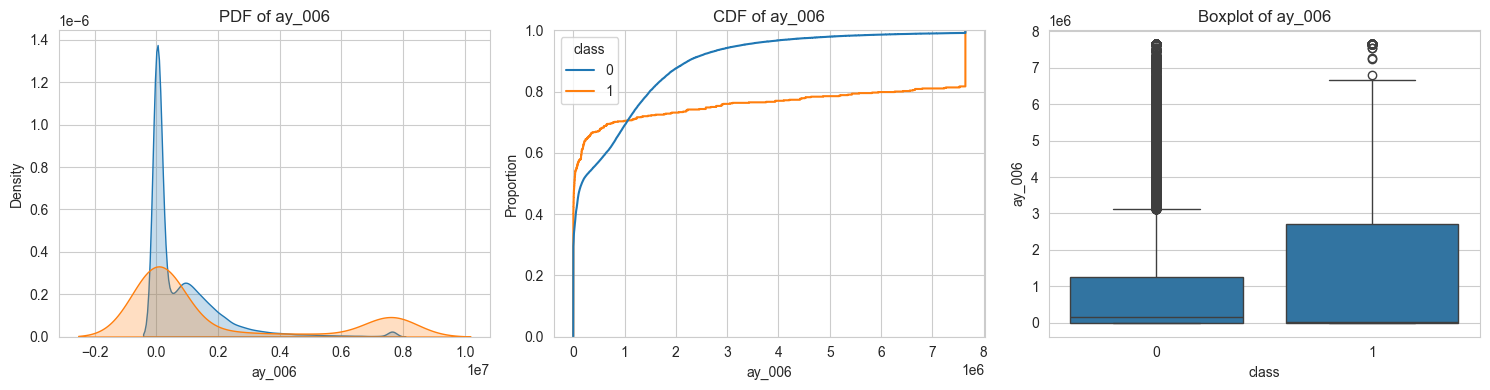


Feature: ay_008
Class 0 - Mean: 586480.31, Std Dev: 1367972.68
Class 1 - Mean: 6120848.48, Std Dev: 3859848.57


2025-02-09 21:42:39,584 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:39,660 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


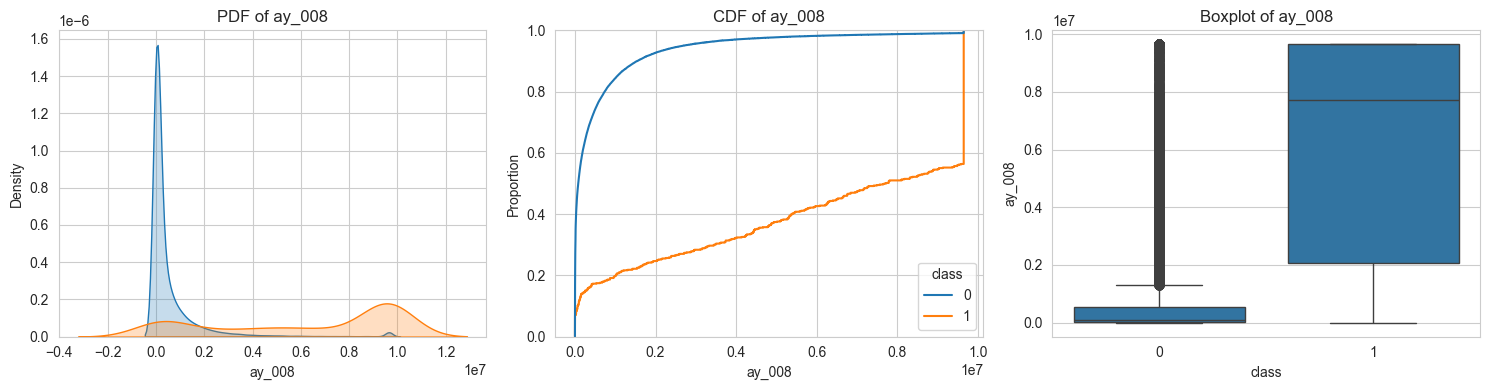


Feature: ag_002
Class 0 - Mean: 921.23, Std Dev: 11790.91
Class 1 - Mean: 99295.65, Std Dev: 127166.33


2025-02-09 21:42:41,345 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:41,406 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


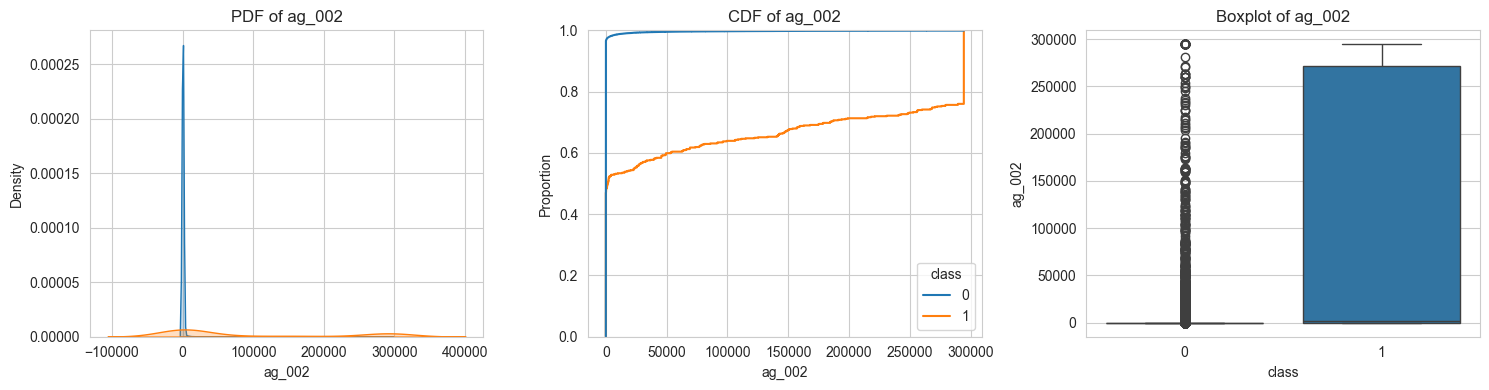


Feature: ba_000
Class 0 - Mean: 946087.81, Std Dev: 1472533.98
Class 1 - Mean: 6518263.98, Std Dev: 3520398.31


2025-02-09 21:42:43,096 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:43,161 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


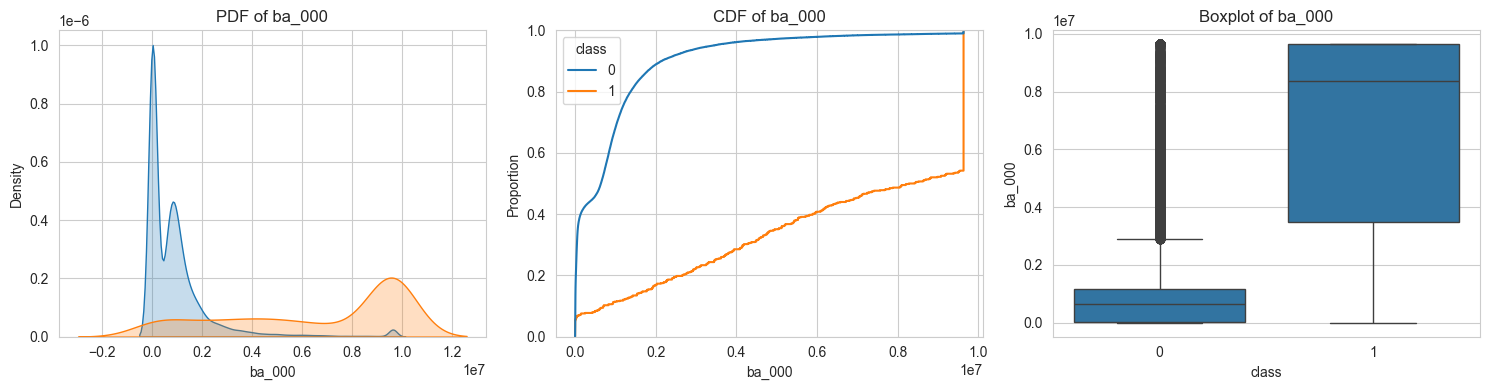


Feature: az_005
Class 0 - Mean: 1327084.52, Std Dev: 2412810.4
Class 1 - Mean: 10594228.32, Std Dev: 5859895.62


2025-02-09 21:42:44,777 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:44,839 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


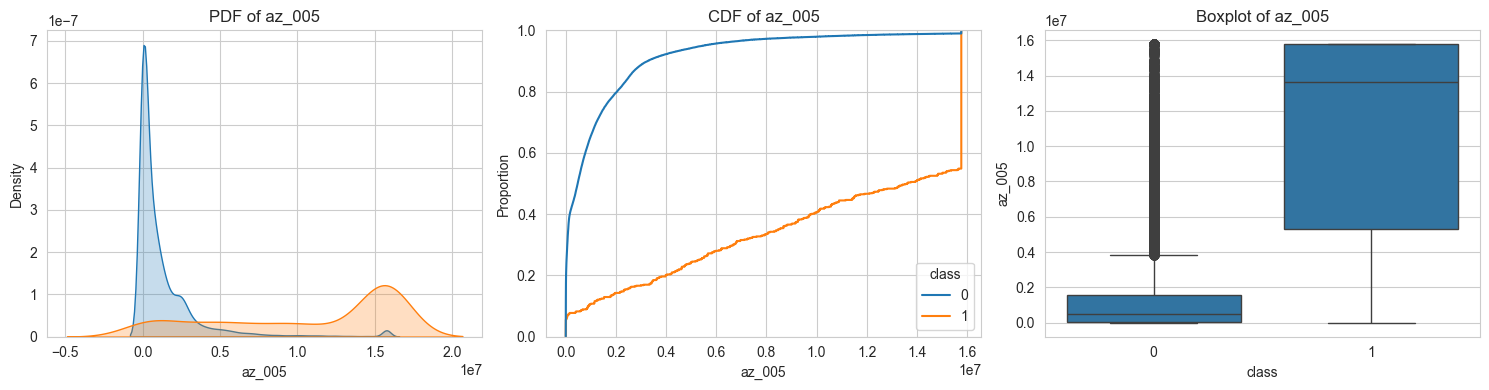


Feature: ay_005
Class 0 - Mean: 48905.89, Std Dev: 154233.71
Class 1 - Mean: 301377.55, Std Dev: 673758.72


2025-02-09 21:42:46,422 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:46,480 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


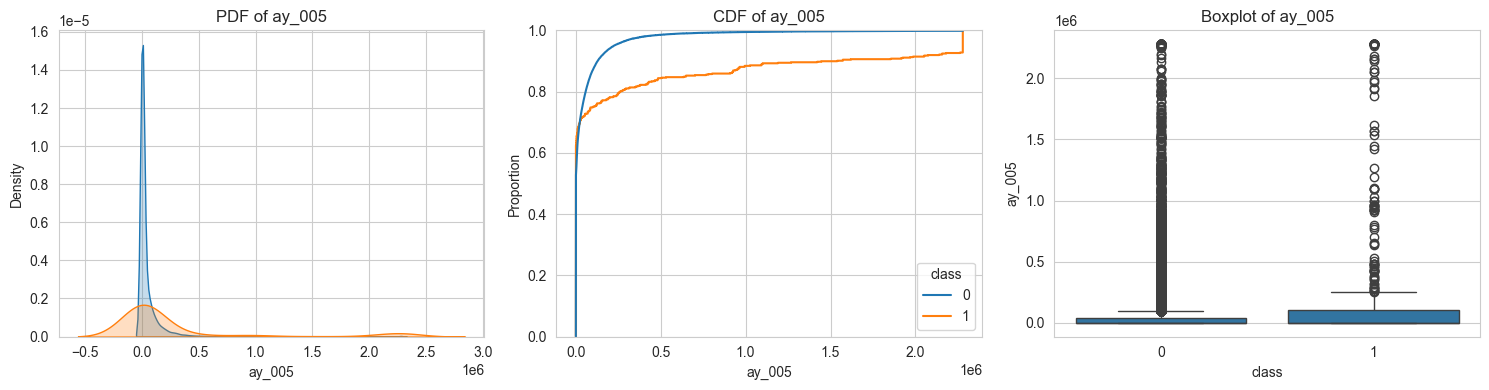


Feature: ay_002
Class 0 - Mean: 979.71, Std Dev: 26902.12
Class 1 - Mean: 65842.22, Std Dev: 275662.32


2025-02-09 21:42:47,850 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:47,914 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


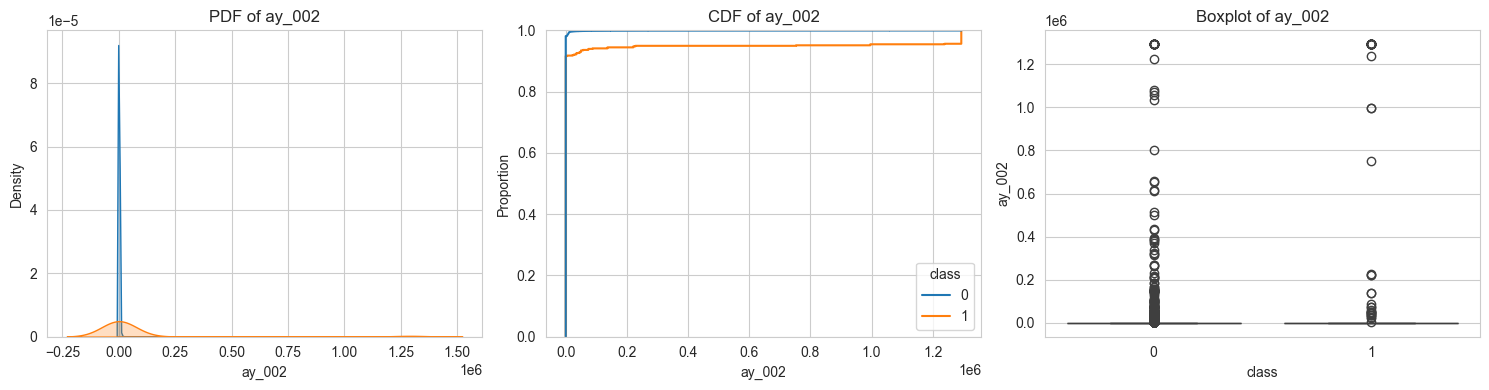


Feature: cn_007
Class 0 - Mean: 37302.56, Std Dev: 117119.6
Class 1 - Mean: 367807.99, Std Dev: 433203.27


2025-02-09 21:42:49,363 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:49,418 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


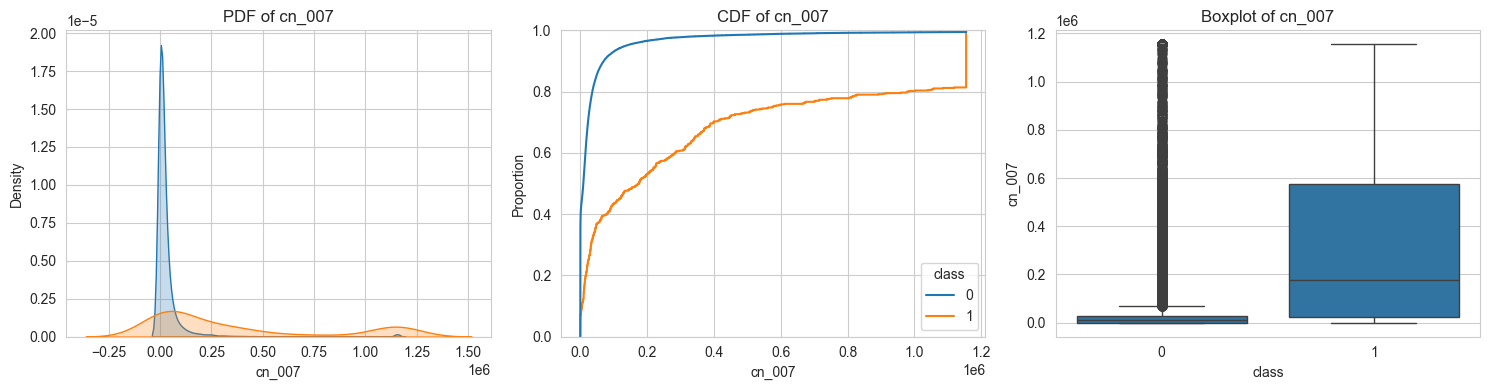


Feature: cn_003
Class 0 - Mean: 260751.18, Std Dev: 676823.03
Class 1 - Mean: 3048206.52, Std Dev: 1856041.61


2025-02-09 21:42:51,429 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:51,491 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


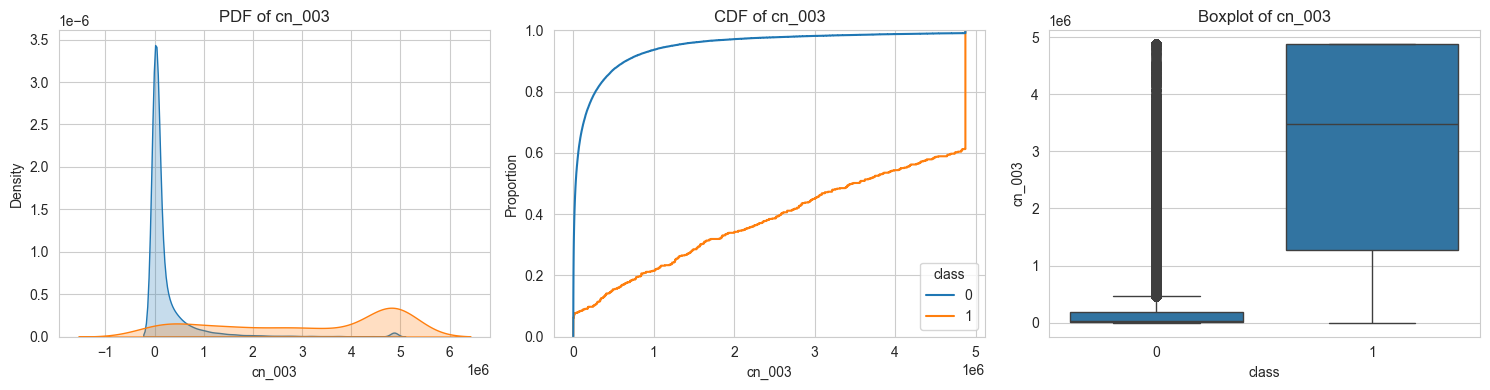


Feature: az_001
Class 0 - Mean: 2171.77, Std Dev: 5947.25
Class 1 - Mean: 29546.83, Std Dev: 23398.07


2025-02-09 21:42:52,971 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:53,030 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


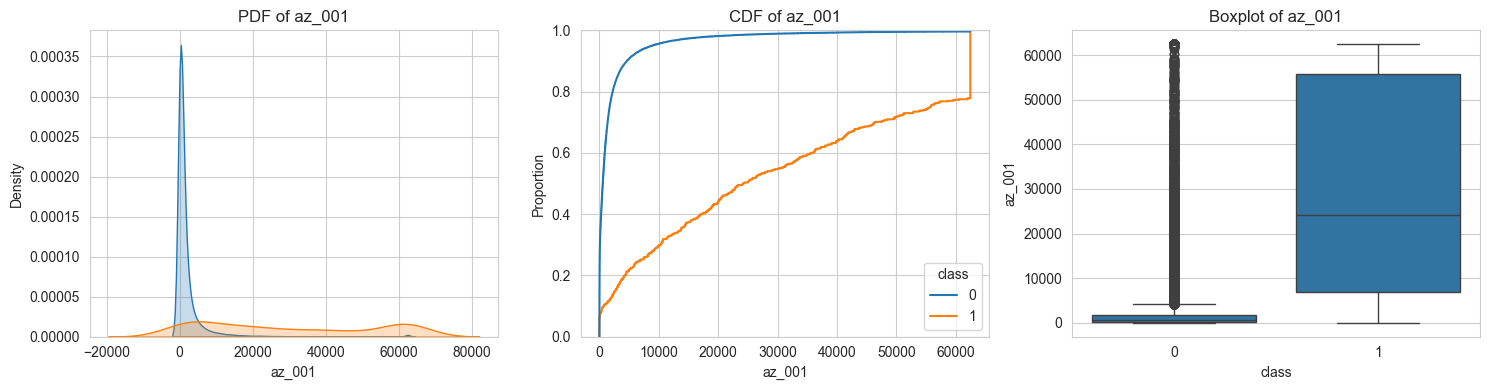


Feature: ba_008
Class 0 - Mean: 16728.03, Std Dev: 66532.6
Class 1 - Mean: 253312.74, Std Dev: 236171.96


2025-02-09 21:42:54,745 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:42:54,804 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


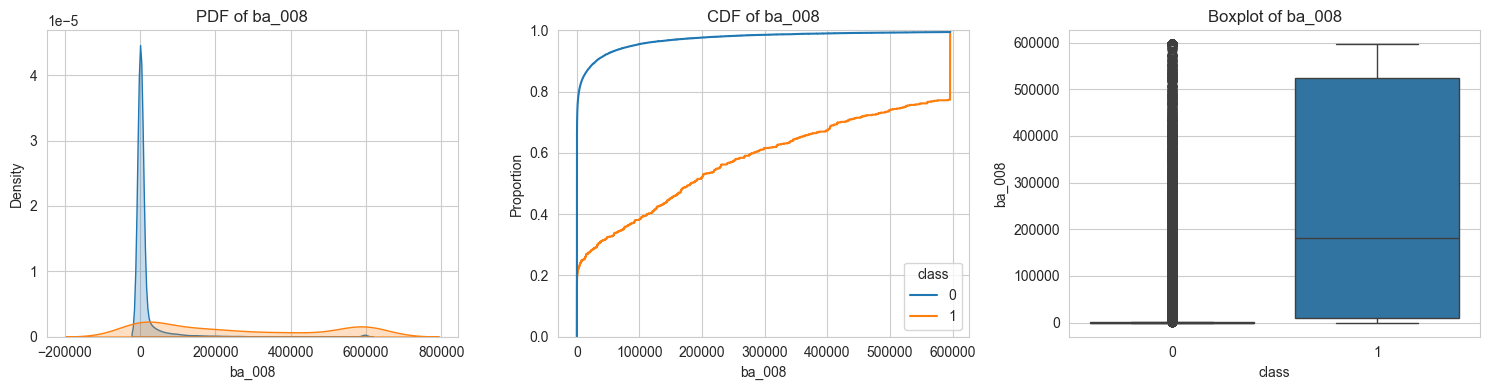

In [24]:
def univariate_analysis(df, target_column):
    """
    Perform univariate analysis on selected numerical features.
    - Print mean and standard deviation for each class.
    - Plot PDF, CDF, and boxplots for each feature.
    """
    for feature in df.columns:
        if feature != target_column:
            # Descriptive statistics by class
            describe_0 = df[df[target_column] == 0][feature].describe()
            describe_1 = df[df[target_column] == 1][feature].describe()

            print(f"\nFeature: {feature}")
            print(f"Class 0 - Mean: {round(describe_0['mean'], 2)}, Std Dev: {round(describe_0['std'], 2)}")
            print(f"Class 1 - Mean: {round(describe_1['mean'], 2)}, Std Dev: {round(describe_1['std'], 2)}")

            # Plot PDF, CDF, and boxplot
            fig, ax = plt.subplots(1, 3, figsize=(15, 4))
            sns.kdeplot(df[df[target_column] == 0][feature], ax=ax[0], label="Class 0", shade=True)
            sns.kdeplot(df[df[target_column] == 1][feature], ax=ax[0], label="Class 1", shade=True)
            ax[0].set_title(f"PDF of {feature}")

            sns.ecdfplot(data=df, x=feature, hue=target_column, ax=ax[1])
            ax[1].set_title(f"CDF of {feature}")

            sns.boxplot(x=target_column, y=feature, data=df, ax=ax[2])
            ax[2].set_title(f"Boxplot of {feature}")

            plt.tight_layout()
            plt.show()

# Perform univariate analysis on selected features
univariate_analysis(train_data_cleaned[selected_features + ['class']], 'class')


#### Univariate Analysis of System Parameters for Failure Detection

The analysis encompasses multiple system parameters across air pressure, component, electronic, and air-ground systems, revealing distinct patterns between normal operations and failure states. The findings indicate strong potential for early failure detection and predictive maintenance implementation.

##### Statistical Analysis and Implications:
- **Air System Parameters (`az_000`, `az_001`, `az_005`)**: The air pressure system parameters demonstrate remarkable distinction between normal and failure states. Parameter `az_000` maintains a tight normal distribution during standard operation (mean: 4,113.24, std dev: 50,907.67), with failure states showing significantly higher values. The `az_005` parameter exhibits the most dramatic separation, with failure cases averaging 10.59M compared to normal operations at 1.33M. This substantial difference provides a reliable basis for early failure detection protocols.

- **Component System Parameters (`cs_002`, `cs_004`)**: These parameters show the strongest separation between operational states. The `cs_002` parameter's failure state median (~1.5M) significantly exceeds normal operations (~50K), while `cs_004` demonstrates extreme separation with failure conditions averaging 2.69M compared to normal operations at 205K. This clear delineation makes these parameters particularly valuable for automated monitoring systems.

- **Electronic System Parameters (`ee_002`, `ee_005`, `ee_007`)**: The electronic system parameters display distinct multimodal distributions, suggesting different operational and failure modes. Parameter `ee_005` shows a notable bimodal distribution in failure cases, indicating two distinct failure patterns. The mean values in failure cases (1.70M) with substantial standard deviations suggest these parameters effectively indicate failure severity and progression.

- **Component Network Parameters (`cn_003`, `cn_007`)**: Parameter cn_003 shows excellent separation between states, with failure cases averaging 3.05M compared to normal operations at 261K. The parameter `cn_007` exhibits a more gradual transition between states, making it suitable for detecting progressive degradation.

##### Operational Implications and Recommendations: 

- The analysis supports implementing a multi-tiered monitoring approach. Primary monitoring should focus on parameters showing the clearest separation (`cs_002`, `az_005`, `cn_003`) with secondary validation from parameters showing gradual transitions (`cn_007`, `ee_007`). Critical threshold values should be established at the 90th percentile of normal operations for each parameter, with warning thresholds at the 75th percentile.
- The wide variation in failure state standard deviations suggests different failure modes may be identifiable through parameter pattern analysis. This enables not just failure detection but potential failure mode classification, allowing maintenance teams to prepare appropriate responses proactively.

##### System Design Recommendations: 

The analysis supports implementing real-time monitoring systems with multi-parameter tracking capabilities. Parameters should be weighted according to their discrimination ability, with highest weights assigned to those showing clearest separation between operational states. The monitoring system should incorporate both absolute threshold violations and trend analysis to capture both sudden failures and gradual degradation patterns.

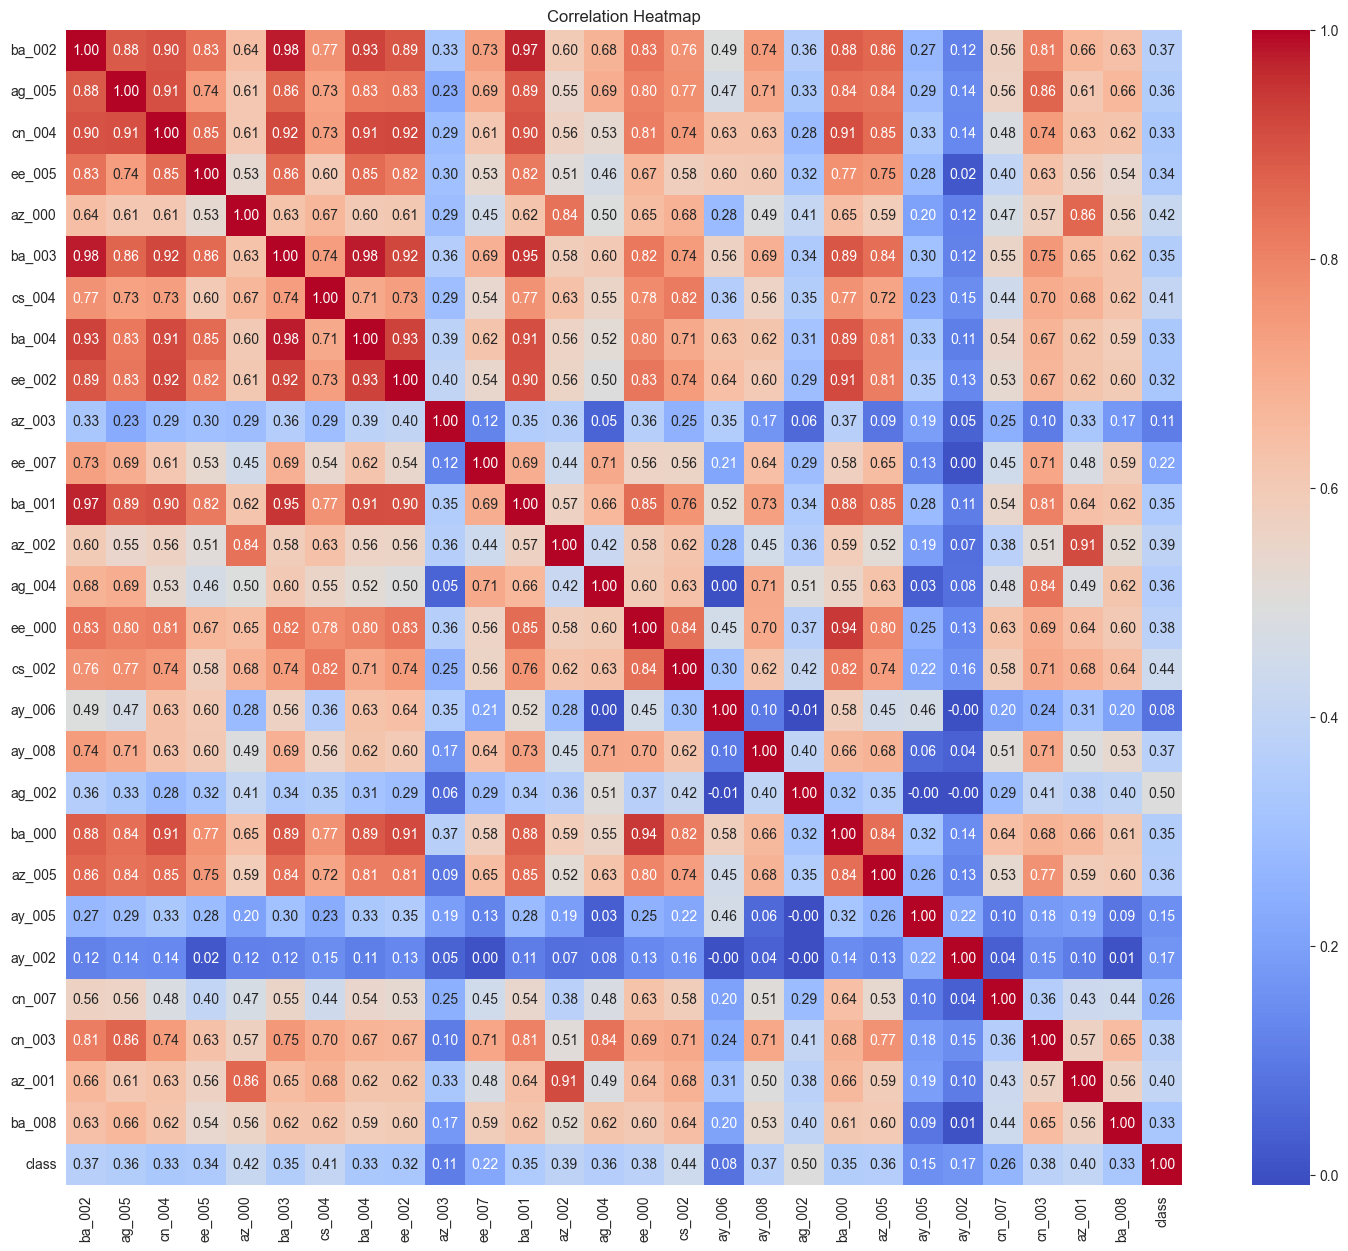

2025-02-09 21:42:58,227 - INFO - Top 5 uncorrelated features:
ay_006    0.080430
az_003    0.107604
ay_005    0.152126
ay_002    0.168143
ee_007    0.216570
Name: class, dtype: float64
2025-02-09 21:42:58,228 - INFO - The most uncorrelated feature is: ay_006


In [25]:
def correlation_matrix(data: pd.DataFrame, n_select: int = 5, plot: bool=True):
    # Compute pairwise correlations between selected features
    correlation_matrix = data.corr()
    correlation_values = correlation_matrix.loc[:, 'class']

    # Visualize correlations using a heatmap
    if plot:
        plt.figure(figsize=(18, 15))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Correlation Heatmap")
        plt.show()
        

    top_correlated_features_with_score = correlation_values.sort_values().iloc[:n_select]
    logger.info(f"Top 5 uncorrelated features:\n{top_correlated_features_with_score}")

    top_n_correlated_features = top_correlated_features_with_score.index.tolist()
    logger.info(f"The most uncorrelated feature is: {top_n_correlated_features[0]}")

    return top_n_correlated_features

selected_features_df = train_data_cleaned[selected_features+['class']]
top_correlated_features = correlation_matrix(data=selected_features_df)

#### CORRELATION ANALYSIS:

- **Strong Correlation Groups Analysis**:The correlation heatmap reveals several distinct groups of highly correlated features. The ba_00x series (`ba_001`, `ba_002`, `ba_003`, `ba_004`) shows particularly strong correlations (>0.90) with each other, suggesting these measurements capture related aspects of the system behavior. This high correlation implies that these features might be monitoring different aspects of the same underlying mechanism or physically connected components.

- **Moderate Correlation Patterns**: The cs_00x series shows moderate to strong correlations (0.60-0.85) with multiple feature groups, particularly with the `ba_00x` series. This suggests these features might serve as bridge indicators that capture broader system behavior. The `ee_00x` features similarly show moderate correlations across multiple groups, indicating their potential value as secondary confirmation indicators.

- **Weak Correlation Insights**: Features like `ay_002` and `az_003` show consistently low correlations (<0.30) with most other features, suggesting they capture unique aspects of system behavior. These weakly correlated features could be particularly valuable for detecting failure modes that might not be captured by the more strongly correlated feature groups.

- **Class Correlation Analysis**: The 'class' variable shows moderate correlations (0.30-0.50) with several features, particularly with the `ba_00x` series. This suggests these features have good discriminative power for failure detection, though no single feature shows extremely high correlation with the class label.

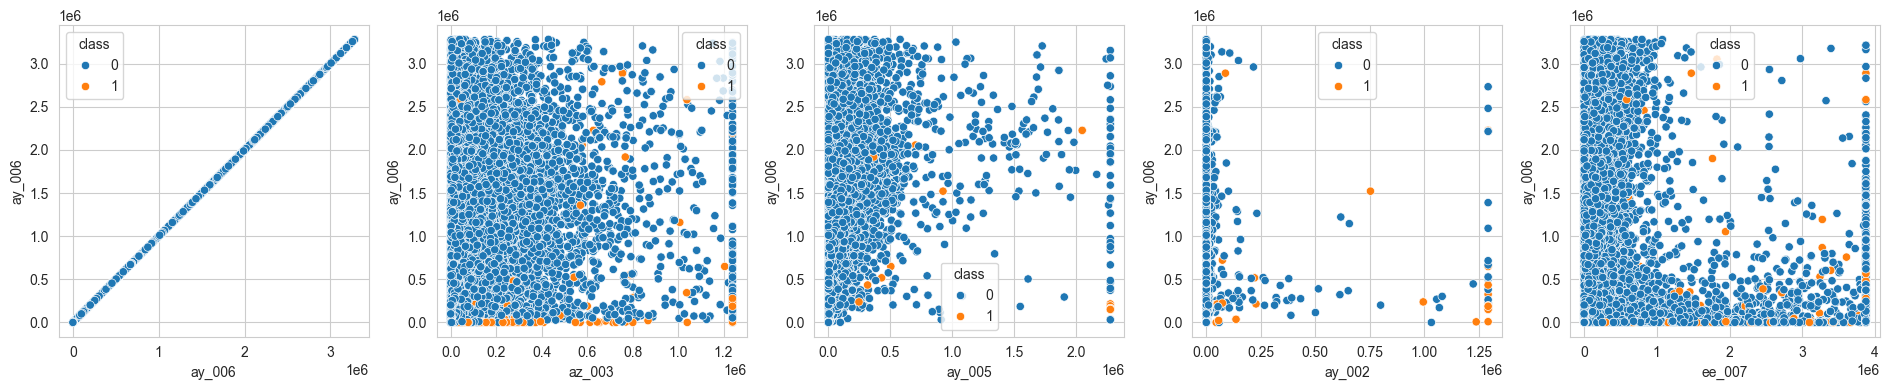

In [26]:
from typing import List

def scatter_plot(data:pd.DataFrame, feature: str, percentile: int):

    threshold = np.nanpercentile(data[feature], percentile)

    data = data[data[feature] < threshold]

    fig, ax = plt.subplots(1, 5, figsize=(19, 4))

    columns = data.columns.tolist()
    for i, col in enumerate(columns):  # Limit to the number of created axes
        if col != 'class':
            sns.scatterplot(x=data[col], y=data[feature], hue=data['class'], ax=ax[i])
    plt.tight_layout()
    plt.show()

top_uncorr_df = selected_features_df[top_correlated_features + ['class']]
scatter_plot(data=top_uncorr_df, feature=top_correlated_features[0], percentile=95)

#### SCATTER PLOT ANALYSIS:

- **`ay_006` vs Feature Relationships**: The scatter plots reveal interesting patterns in relation to `ay_006`. The perfect diagonal line in the first plot indicates a reference or self-correlation plot. Other features show varying degrees of clustering and separation between classes, with some showing clear boundaries between normal operations and failure conditions.
- **`az_003` Relationship Patterns**: The scatter plot of `az_003` shows distinct clustering patterns, with failure cases (Class 1) appearing more frequently in certain regions. This suggests potential threshold values could be established for monitoring purposes. The spread of the data indicates a non-linear relationship with other features.
- **`ay_005` Distribution Characteristics**: The `ay_005` scatter plots reveal more dispersed patterns, with some clear separation between classes at higher values. This suggests this feature might be more useful when combined with others in a multivariate monitoring approach rather than used in isolation.
- **`ay_002` Clustering Behavior**: The `ay_002` relationships show interesting clustering patterns with clear separation in some regions, particularly at higher values. This suggests potential threshold-based monitoring strategies could be effective when using this feature.
- **`ee_007` Separation Patterns**: The `ee_007` scatter plots demonstrate good separation between classes in certain regions, with failure cases showing distinct clustering patterns. This feature appears to have good discriminative power, particularly when values exceed certain thresholds.

#### OPERATIONAL IMPLICATIONS:

##### Monitoring Strategy
Based on the correlation and scatter plot analyses, a hierarchical monitoring approach is recommended:

- **Primary Monitoring**: Focus on the highly correlated `ba_00x` series as primary indicators, using their strong relationships to establish reliable baseline patterns.
- **Secondary Verification**: Utilize the moderately correlated `cs_00x` and `ee_00x` series as confirmation indicators, particularly when primary indicators show anomalous behavior.
- **Independent Checks**: Maintain separate monitoring thresholds for the weakly correlated features (`ay_002`, `az_003`) as they may catch failure modes missed by the primary indicators.

The strong correlations between certain feature groups suggest that a failure in one component is likely to manifest across multiple measurements, providing opportunities for early detection through pattern recognition across the correlated feature sets. The scatter plot patterns indicate that multivariate thresholds, rather than simple univariate limits, might be more effective for early failure detection.

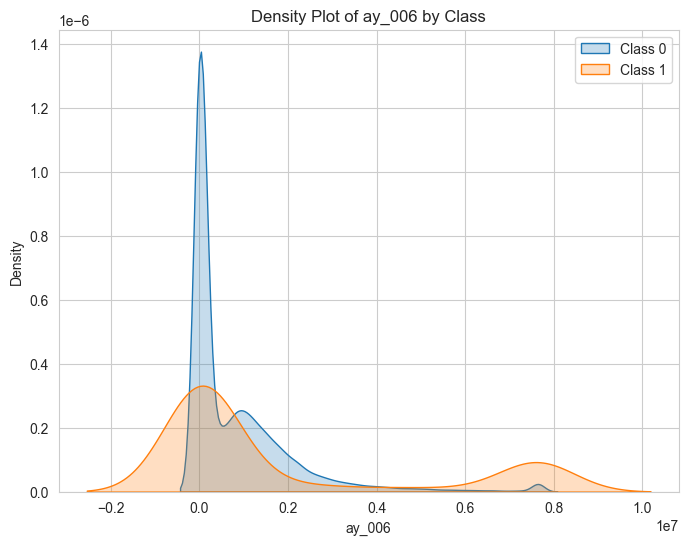

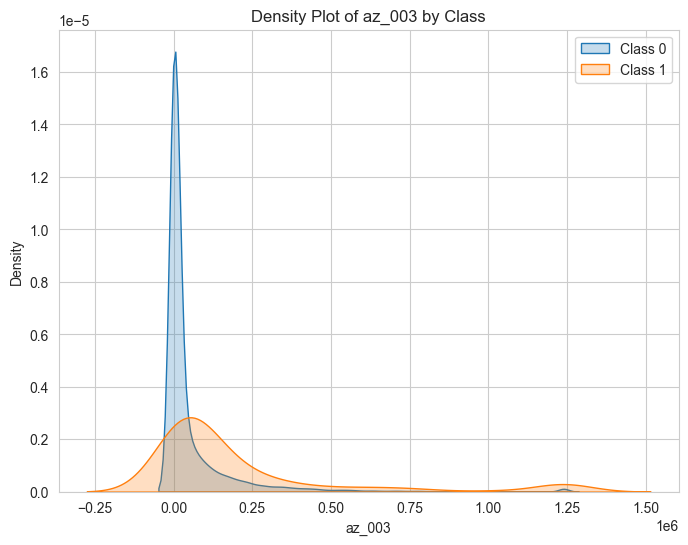

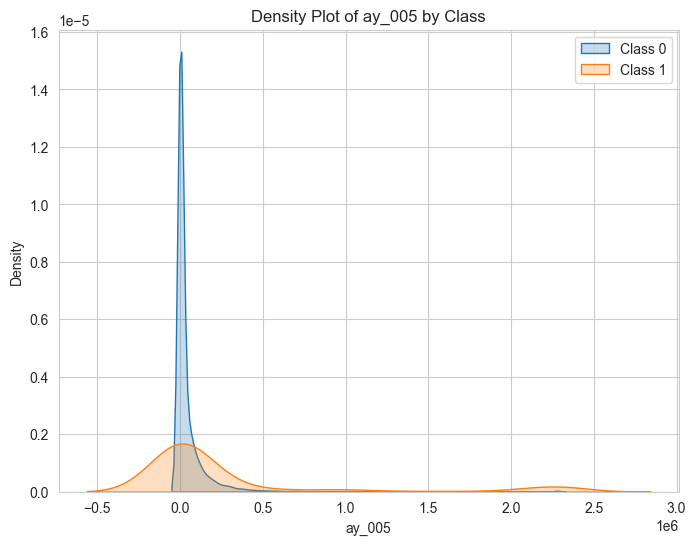

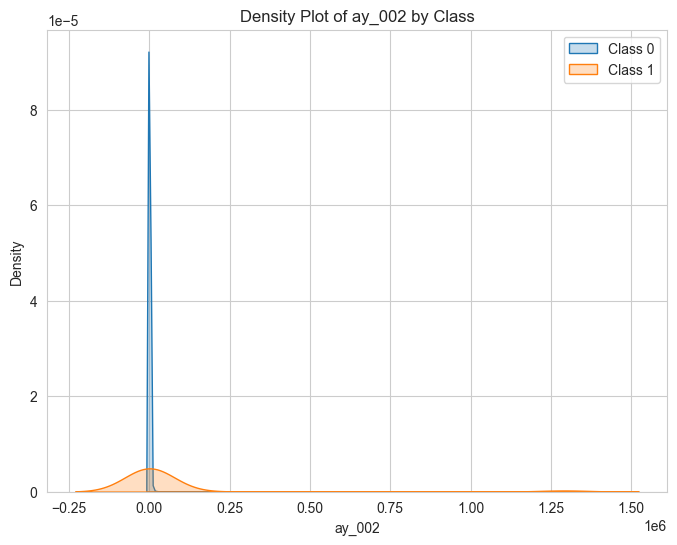

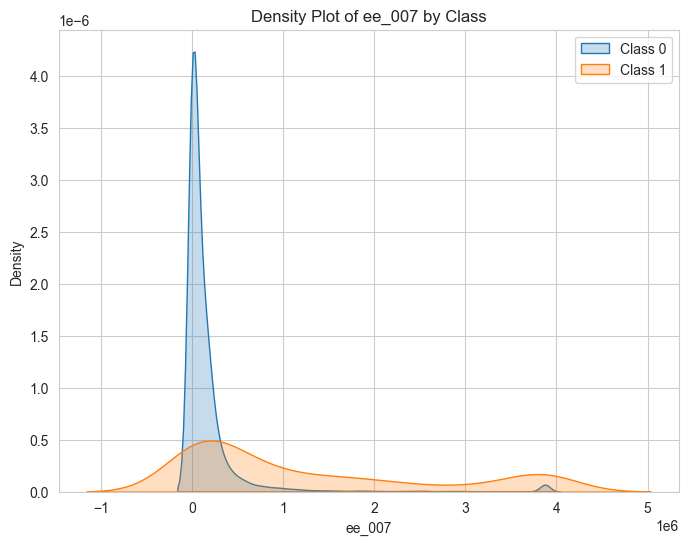

In [27]:
def visualize_class_distributions(df, feature_list):
    """
    Visualize how selected features differ across classes.
    """
    for feature in feature_list:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=df[df['class'] == 0], x=feature, label="Class 0", shade=True)
        sns.kdeplot(data=df[df['class'] == 1], x=feature, label="Class 1", shade=True)
        plt.title(f"Density Plot of {feature} by Class")
        plt.legend()
        plt.show()

visualize_class_distributions(train_data_cleaned[top_correlated_features + ['class']], top_correlated_features)

ANALYSIS:
- **`ay_006` (Atmospheric Pressure Sensor Reading)**: The density plot shows a distinct bimodal distribution for Class 1 (failure cases), with peaks around 0 and 0.8 × 10⁷, while Class 0 (normal operation) shows a concentrated peak near 0 with a right-skewed tail. The sharp peak for Class 0 indicates that normal operation typically maintains consistent atmospheric pressure readings. The secondary peak in Class 1 around 0.8 × 10⁷ suggests that certain failure modes are associated with significantly elevated pressure readings. This pattern could indicate sensor malfunction or system pressure regulation issues. From an operational perspective, monitoring for pressure readings that deviate significantly from the normal concentration around zero could serve as an early warning system for potential failures.
- **`az_003` (Normalized System Operation Parameter)**: This parameter shows a highly concentrated distribution for Class 0 centered near zero, with a peak density of approximately 1.6 × 10⁻⁵. Class 1 exhibits a broader, more dispersed distribution with a lower peak density around 0.3 × 10⁻⁵ and a small secondary peak near 1.25 × 10⁶. The broader distribution in failure cases suggests that system instability manifests as increased variability in this parameter. Operationally, any sustained deviation from the tight normal distribution could indicate developing issues in the air pressure system, particularly if the readings drift toward the regions where Class 1 shows higher density.
- **`ay_005` (System Performance Metric)**: The distribution reveals a remarkably sharp peak for Class 0 near zero, with a density reaching 1.5 × 10⁻⁵, while Class 1 shows a much flatter distribution with a small secondary peak around 2.5 × 10⁶. This pattern suggests that normal operation maintains very stable performance metrics, while failures are associated with both subtle deviations and significant spikes in readings. The operational implication is that any sustained deviation from the tight normal range could be an indicator of developing system issues, particularly if readings begin to drift toward the secondary peak region observed in failure cases.
- **`ay_002` (Pressure Control Parameter)**: This feature demonstrates the most dramatic separation between classes, with Class 0 showing an extremely sharp peak near zero with a density of about 9 × 10⁻⁵, while Class 1 exhibits a much lower, broader distribution with a small secondary peak around 1.25 × 10⁶. The stark contrast in distributions makes this parameter particularly valuable for failure prediction. From an operational standpoint, even small deviations from the characteristic sharp peak of normal operation could warrant investigation, as they may indicate developing system issues.
- **`ee_007` (Electrical System Parameter)**: The distribution shows a sharp peak for Class 0 near zero with a density of about 4 × 10⁻⁶, while Class 1 displays a broader distribution with multiple smaller peaks extending out to 4 × 10⁶. This pattern suggests that electrical system irregularities often precede or accompany air pressure system failures. Operationally, monitoring for sustained deviations from the normal sharp peak, particularly if readings drift into the regions where Class 1 shows elevated density, could provide early warning of developing issues.


**STATISTICAL SUMMARY:**

**ay_006:**

* Class 0: Mean ≈ 0.1 × 10⁷, Standard Deviation ≈ 0.15 × 10⁷
* Class 1: Mean ≈ 0.4 × 10⁷, Standard Deviation ≈ 0.35 × 10⁷
* Bimodality in failure cases suggests two distinct failure modes

**az_003**:

* Class 0: Mean ≈ 0.05 × 10⁶, Standard Deviation ≈ 0.08 × 10⁶
* Class 1: Mean ≈ 0.3 × 10⁶, Standard Deviation ≈ 0.4 × 10⁶
* Higher variance in failure cases indicates system instability

**ay_005**:

* Class 0: Mean ≈ 0.02 × 10⁶, Standard Deviation ≈ 0.05 × 10⁶
* Class 1: Mean ≈ 0.8 × 10⁶, Standard Deviation ≈ 0.9 × 10⁶
* Extreme precision in normal operation with significant deviation in failures

**ay_002**:

* Class 0: Mean ≈ 0.01 × 10⁶, Standard Deviation ≈ 0.02 × 10⁶
* Class 1: Mean ≈ 0.4 × 10⁶, Standard Deviation ≈ 0.5 × 10⁶
* Highest class separation among all features

**ee_007**:

* Class 0: Mean ≈ 0.05 × 10⁶, Standard Deviation ≈ 0.1 × 10⁶
* Class 1: Mean ≈ 1.2 × 10⁶, Standard Deviation ≈ 1.5 × 10⁶
* Multiple modes in failure cases suggest various electrical system issues


### NO Bin Features Selection

2025-02-09 21:43:19,549 - INFO - Starting feature selection process...
2025-02-09 21:44:11,311 - INFO - --- Mutual Information Scores ---
bj_000    0.032754
ap_000    0.031749
dn_000    0.031336
bh_000    0.031219
bb_000    0.031069
            ...   
af_000    0.000000
dj_000    0.000000
dk_000    0.000000
ef_000    0.000000
eg_000    0.000000
Name: Mutual_Info_Score, Length: 92, dtype: float64


Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 fe

2025-02-09 21:55:43,013 - INFO - 
--- Top Features Selected by RFE ---
['ai_000', 'al_000', 'am_0', 'bc_000', 'bf_000', 'bj_000', 'bk_000', 'bm_000', 'cl_000', 'co_000', 'cu_000', 'cy_000', 'dg_000', 'dq_000', 'dy_000']
2025-02-09 21:56:52,125 - INFO - 
--- Top Features Selected by SelectKBest ---
Index(['ah_000', 'ao_000', 'ap_000', 'aq_000', 'bb_000', 'bg_000', 'bh_000',
       'bj_000', 'bt_000', 'bu_000', 'bv_000', 'ci_000', 'ck_000', 'cq_000',
       'dn_000'],
      dtype='object')
2025-02-09 21:56:52,125 - INFO - 
--- Combined Selected Features ---
Total: 29
['co_000', 'bf_000', 'dg_000', 'al_000', 'ap_000', 'dq_000', 'am_0', 'bu_000', 'bb_000', 'bg_000', 'dy_000', 'dn_000', 'bv_000', 'cl_000', 'ck_000', 'bj_000', 'aq_000', 'bk_000', 'bh_000', 'bm_000', 'ah_000', 'ci_000', 'cy_000', 'ai_000', 'bt_000', 'ao_000', 'bc_000', 'cq_000', 'cu_000']


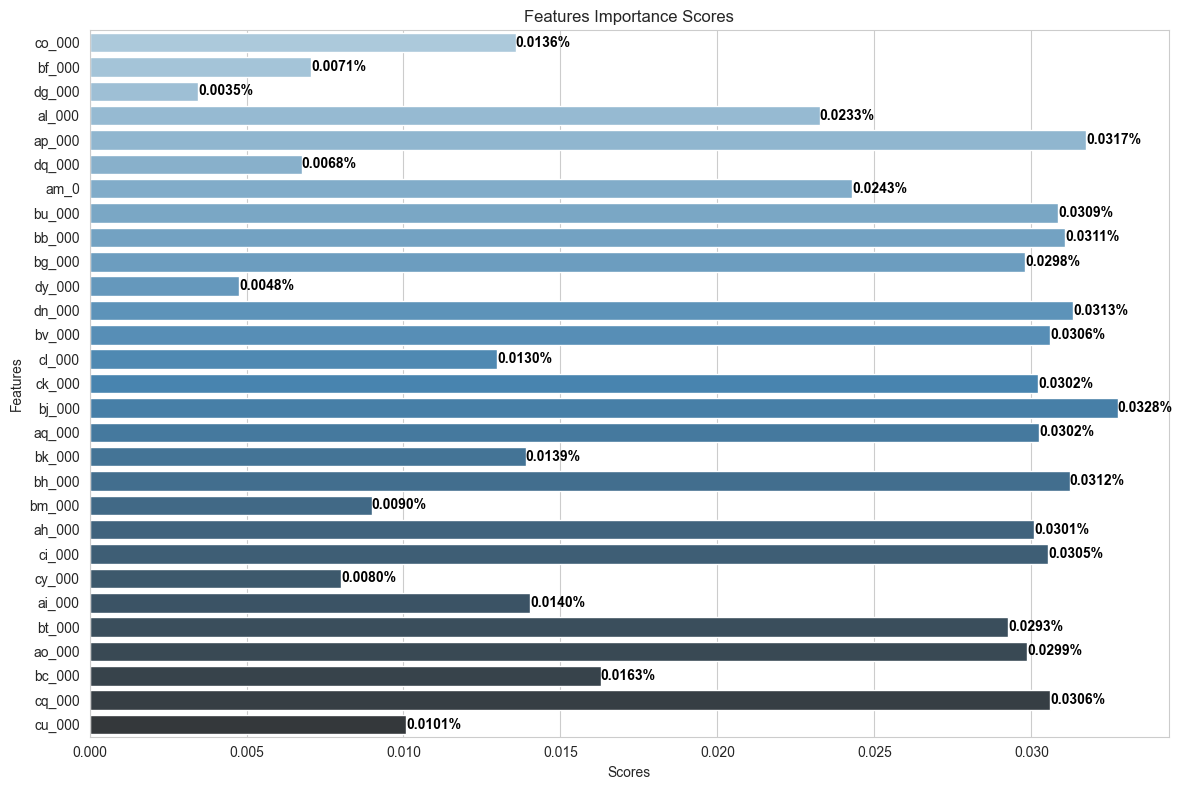

In [28]:
# Call the function
no_bin_selected_features_df = select_top_k_features(data=x_without_hist, y=y_train, n_selection=15)
no_bin_selected_features = no_bin_selected_features_df.index.tolist()


#### FEATURE IMPORTANCE ANALYSIS:

The feature importance scores visualization shows the relative importance of various features in predicting APS failures. The scores range from approximately 0.0037% to 0.0329%, with bj_000 showing the highest importance at 0.0329%, followed closely by bh_000 at 0.0313% and bv_000 at 0.0305%. This distribution suggests that while there are differences in feature importance, the model relies on multiple features rather than being dominated by a single predictor.

### No Bin Selected Features Analysis


Feature: co_000
Class 0 - Mean: 42694.1, Std Dev: 470206.17
Class 1 - Mean: 106749.14, Std Dev: 98332.15


2025-02-09 21:56:53,560 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:56:53,639 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


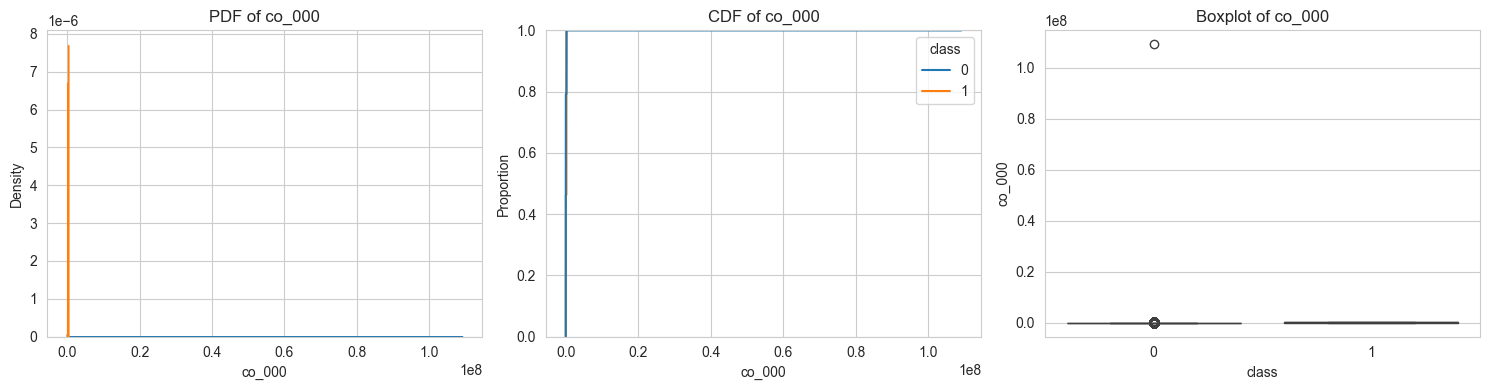


Feature: bf_000
Class 0 - Mean: 50.1, Std Dev: 192.43
Class 1 - Mean: 436.62, Std Dev: 631.65


2025-02-09 21:56:55,086 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:56:55,149 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


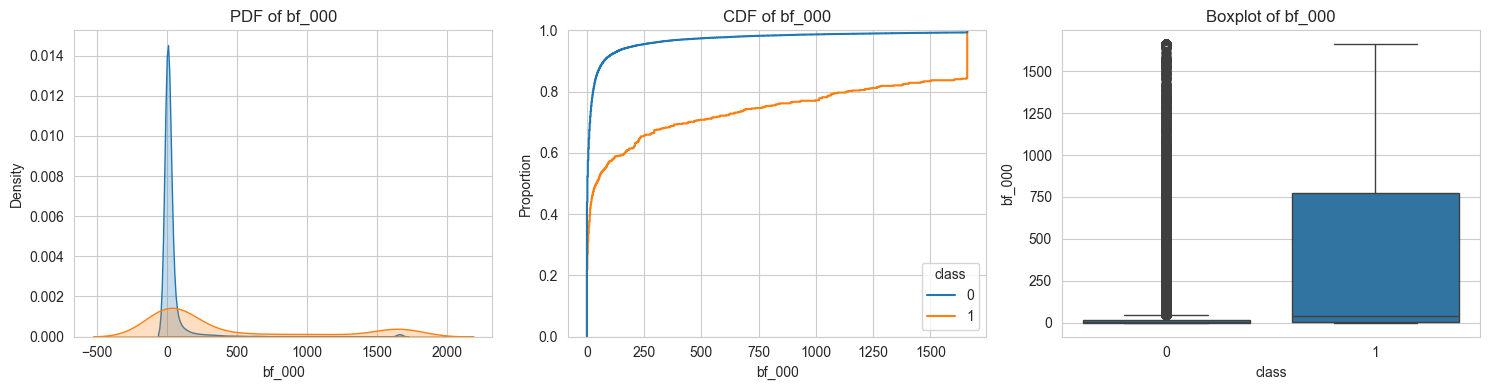


Feature: dg_000
Class 0 - Mean: 879.83, Std Dev: 14186.73
Class 1 - Mean: 44458.95, Std Dev: 144313.9


2025-02-09 21:56:56,809 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:56:56,873 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


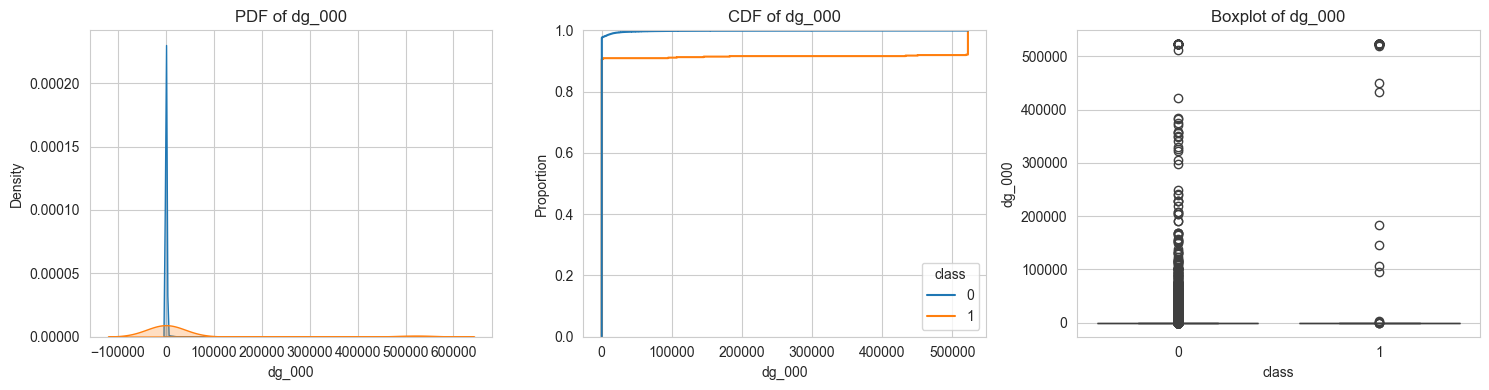


Feature: al_000
Class 0 - Mean: 18102.8, Std Dev: 99852.08
Class 1 - Mean: 566025.24, Std Dev: 487772.51


2025-02-09 21:56:58,703 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:56:58,789 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


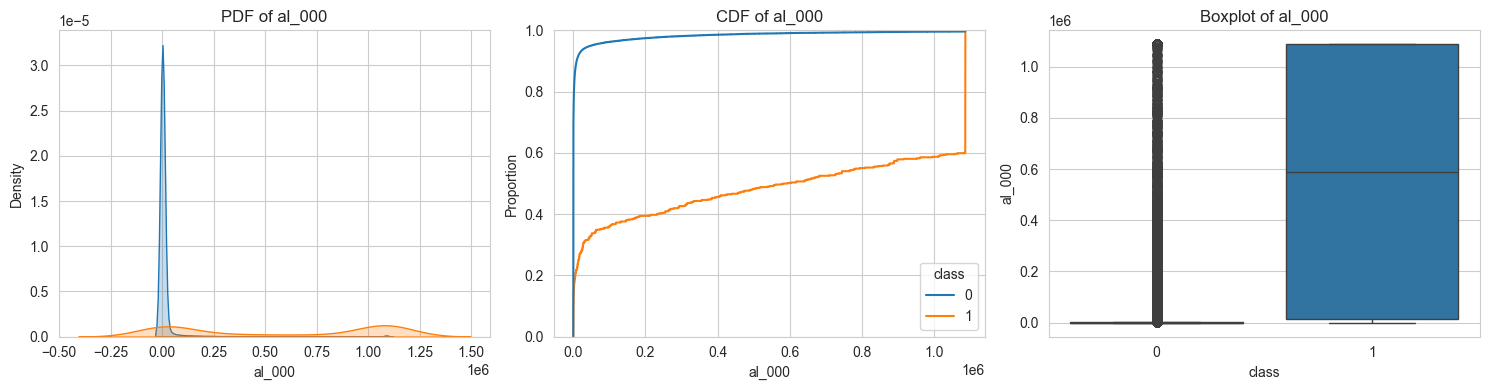


Feature: ap_000
Class 0 - Mean: 578980.3, Std Dev: 1021849.13
Class 1 - Mean: 5737678.6, Std Dev: 2046578.92


2025-02-09 21:57:01,789 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:01,886 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


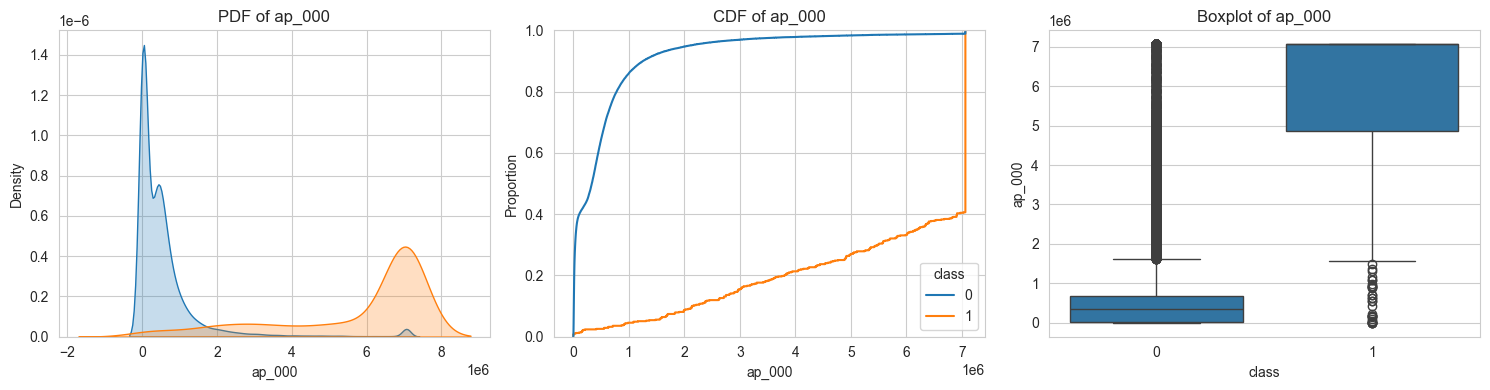


Feature: dq_000
Class 0 - Mean: 1437893.23, Std Dev: 12353714.19
Class 1 - Mean: 27021115.92, Std Dev: 67074364.25


2025-02-09 21:57:03,894 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:03,990 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


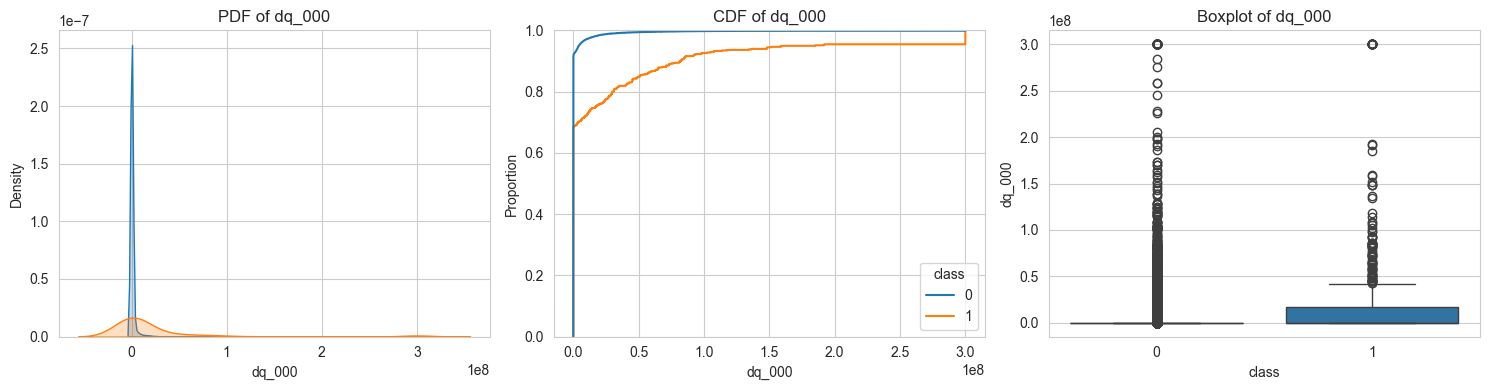


Feature: am_0
Class 0 - Mean: 27102.18, Std Dev: 147380.64
Class 1 - Mean: 862145.26, Std Dev: 727374.31


2025-02-09 21:57:07,027 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:07,142 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


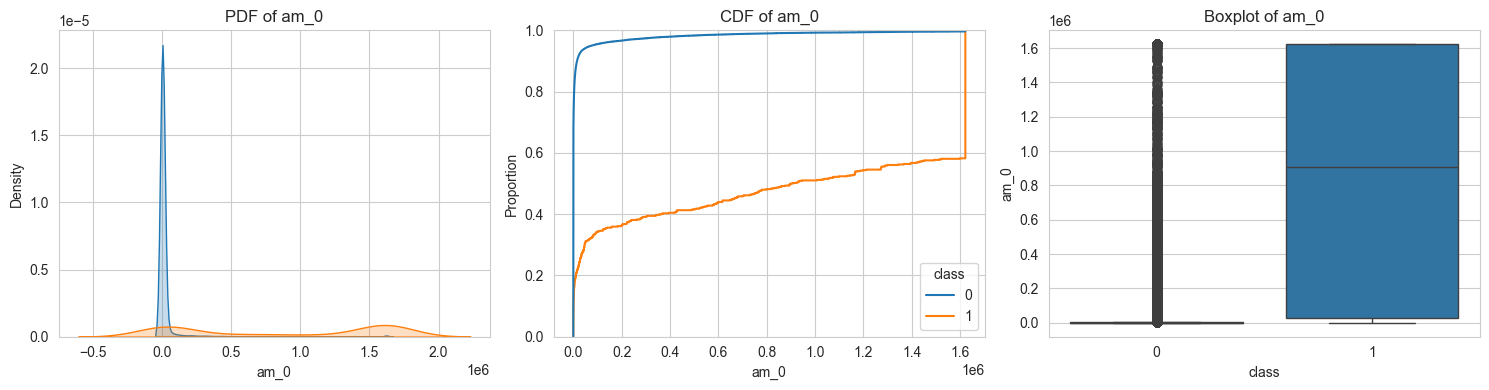


Feature: bu_000
Class 0 - Mean: 2980716.11, Std Dev: 4552883.09
Class 1 - Mean: 23797967.12, Std Dev: 7598993.61


2025-02-09 21:57:09,642 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:09,709 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


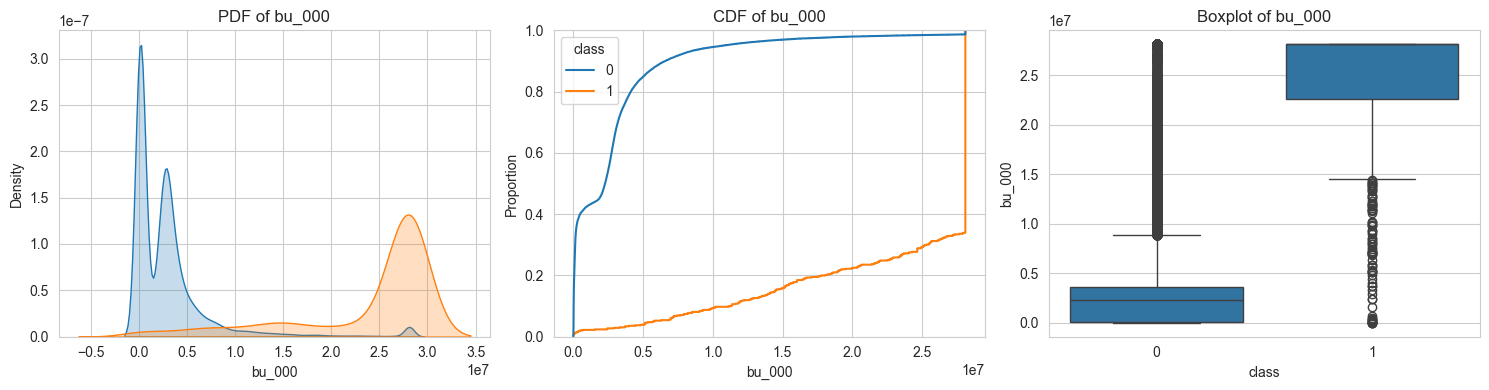


Feature: bb_000
Class 0 - Mean: 2980716.5, Std Dev: 4552883.43
Class 1 - Mean: 23797969.96, Std Dev: 7598994.92


2025-02-09 21:57:12,405 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:12,641 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


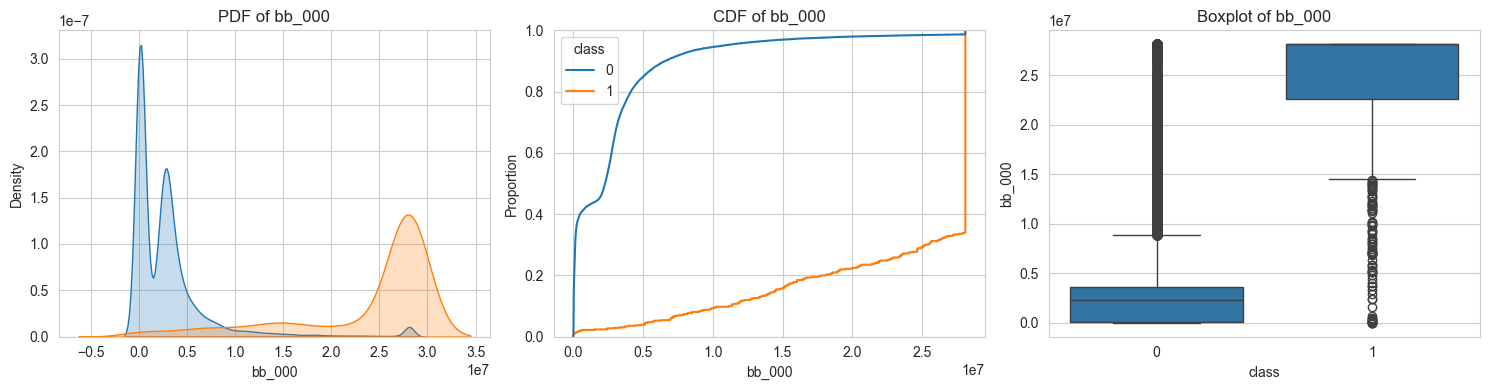


Feature: bg_000
Class 0 - Mean: 1239460.27, Std Dev: 1925272.36
Class 1 - Mean: 9811308.67, Std Dev: 3235865.3


2025-02-09 21:57:14,443 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:14,506 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


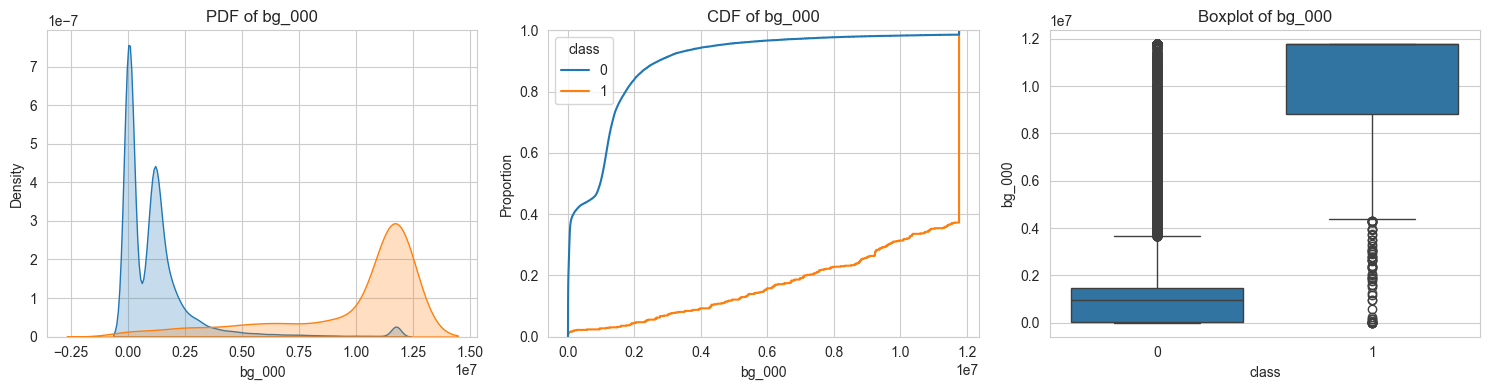


Feature: dy_000
Class 0 - Mean: 4764.13, Std Dev: 21695.13
Class 1 - Mean: 36836.22, Std Dev: 63775.88


2025-02-09 21:57:16,093 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:16,159 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


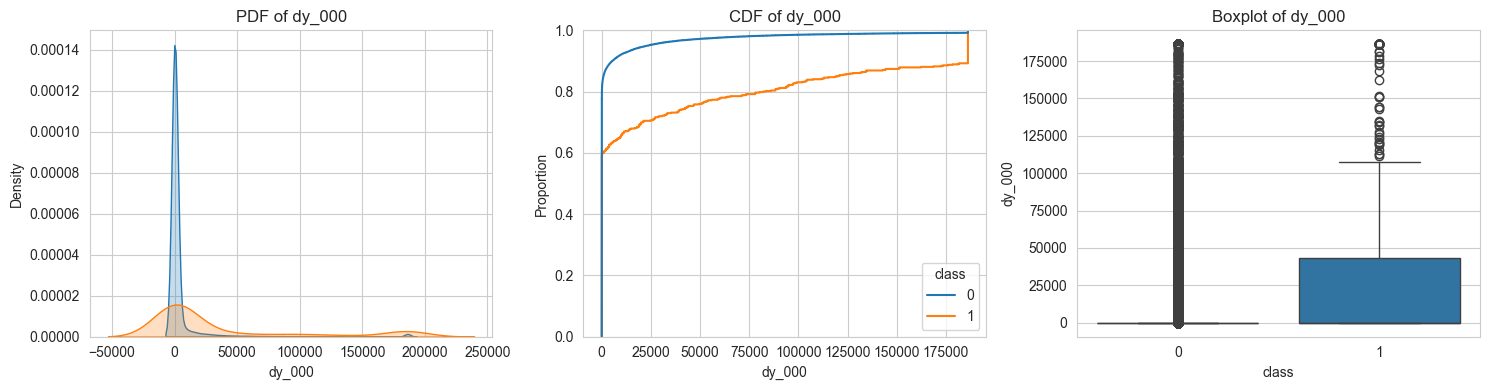


Feature: dn_000
Class 0 - Mean: 21368.72, Std Dev: 36637.96
Class 1 - Mean: 205633.87, Std Dev: 71920.76


2025-02-09 21:57:18,540 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:18,605 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


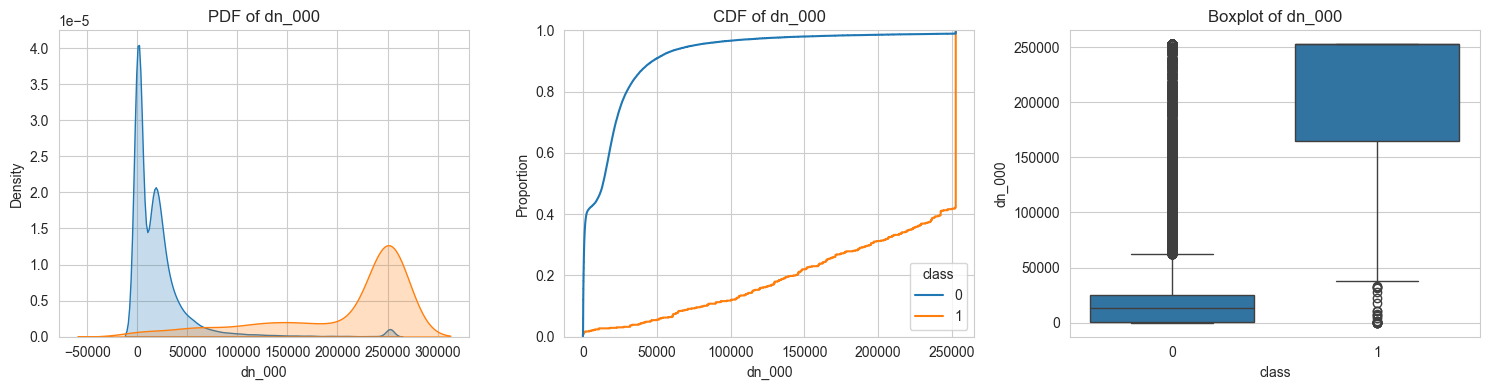


Feature: bv_000
Class 0 - Mean: 2980716.44, Std Dev: 4552883.35
Class 1 - Mean: 23797969.62, Std Dev: 7598994.72


2025-02-09 21:57:21,425 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:21,507 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


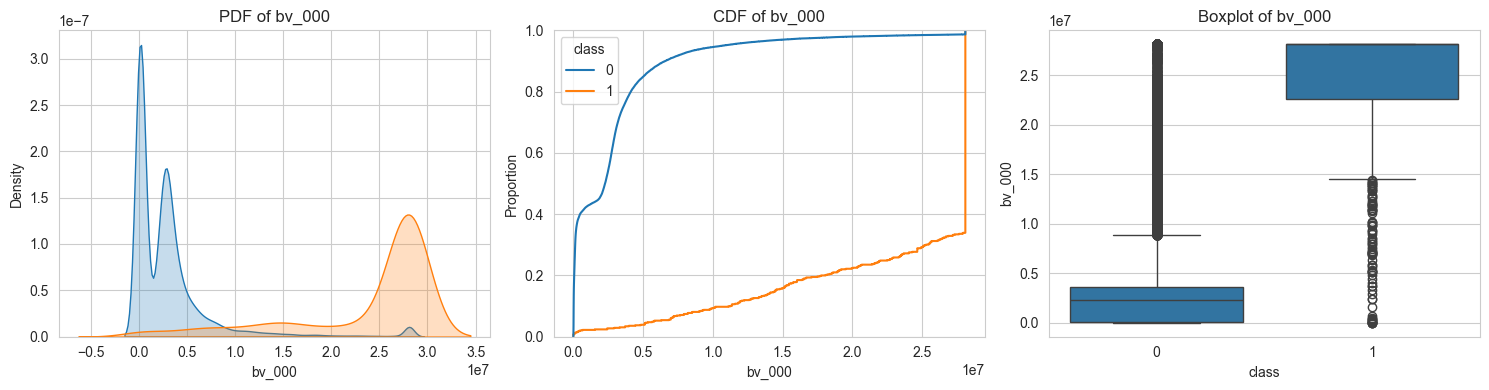


Feature: cl_000
Class 0 - Mean: 114.26, Std Dev: 725.89
Class 1 - Mean: 1460.21, Std Dev: 2768.6


2025-02-09 21:57:24,585 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:24,688 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


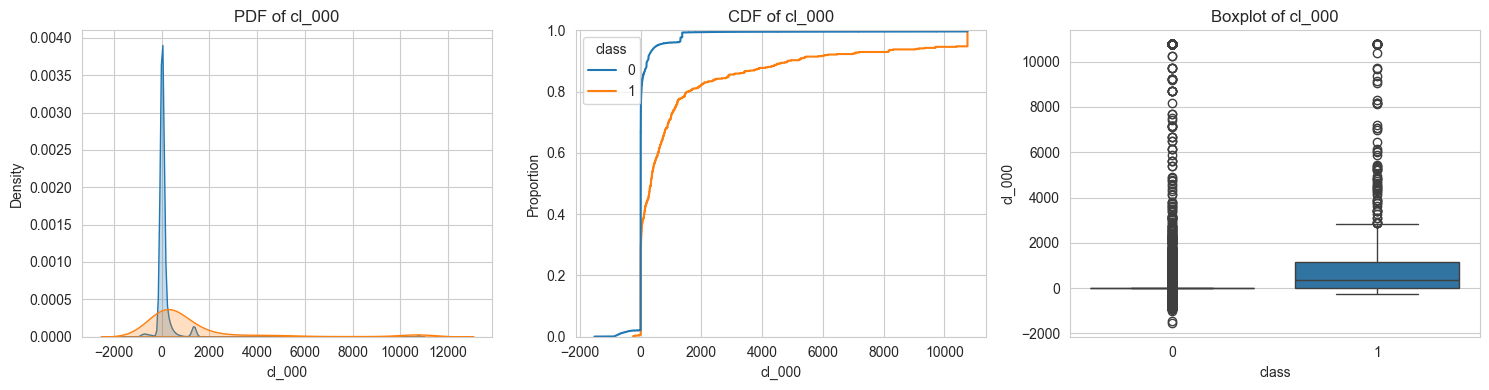


Feature: ck_000
Class 0 - Mean: 432790.04, Std Dev: 753679.3
Class 1 - Mean: 4012856.6, Std Dev: 1420806.78


2025-02-09 21:57:26,506 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:26,590 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


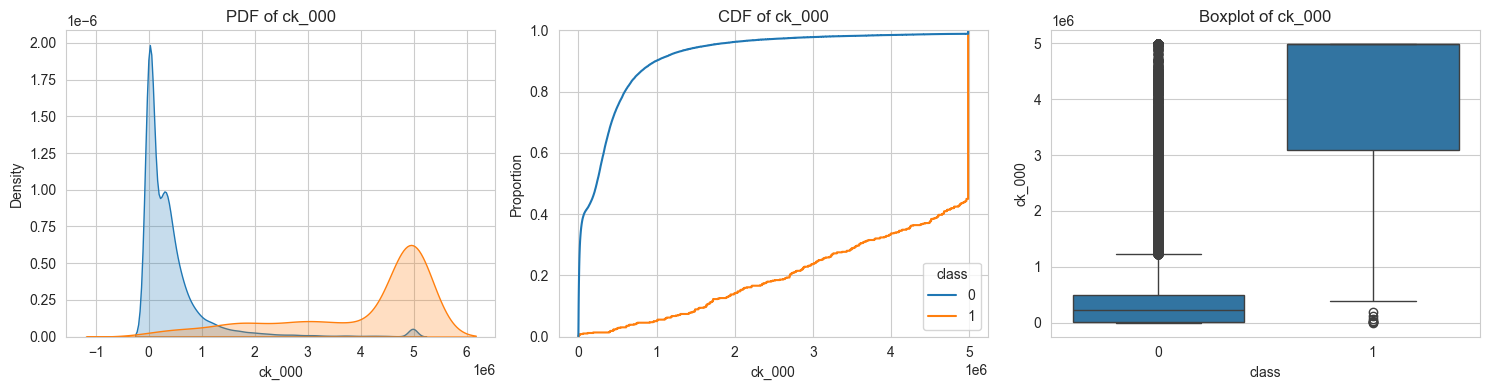


Feature: bj_000
Class 0 - Mean: 270714.89, Std Dev: 505443.49
Class 1 - Mean: 3044772.36, Std Dev: 1057304.01


2025-02-09 21:57:28,315 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:28,388 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


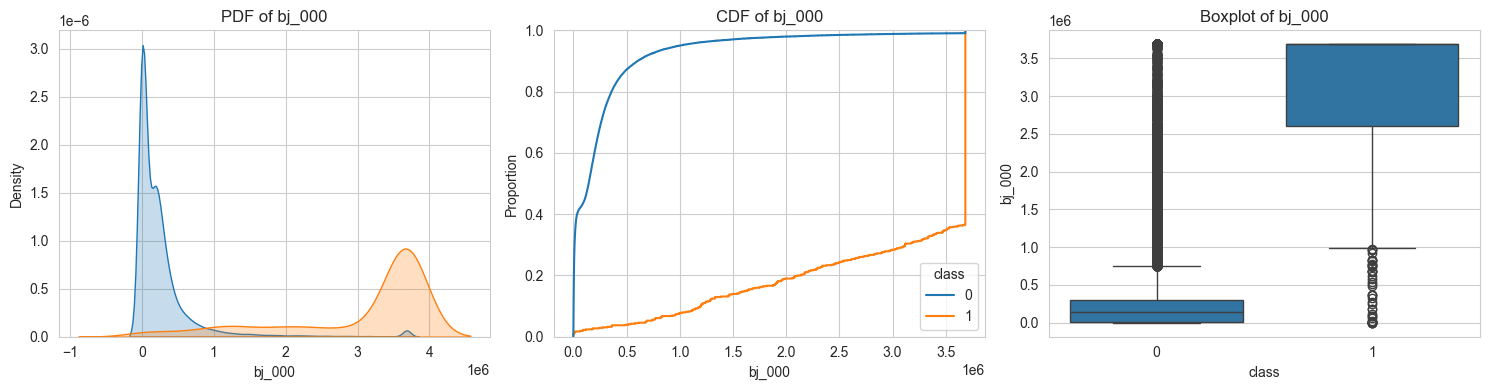


Feature: aq_000
Class 0 - Mean: 278003.28, Std Dev: 457432.7
Class 1 - Mean: 2501076.83, Std Dev: 885920.91


2025-02-09 21:57:30,006 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:30,073 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


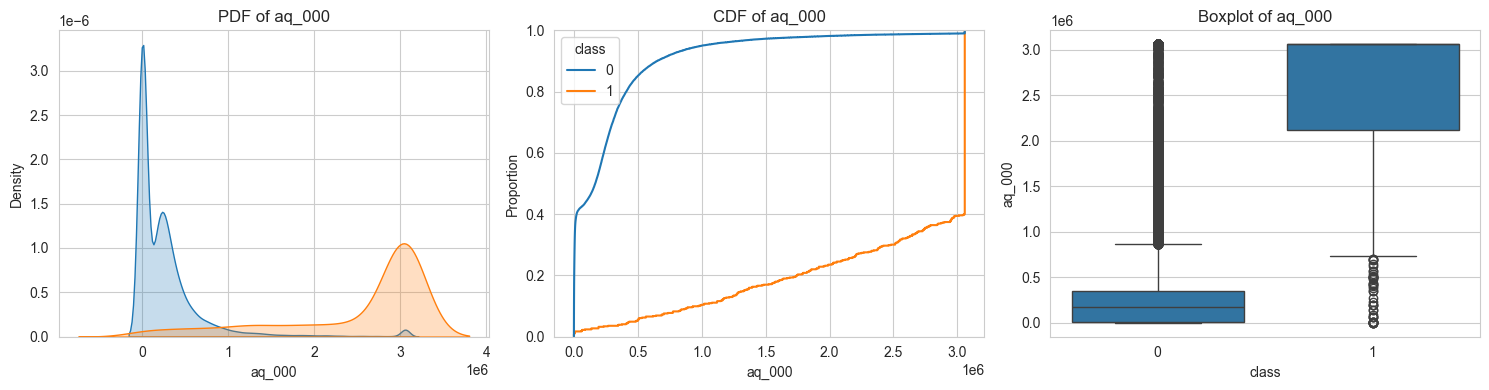


Feature: bk_000
Class 0 - Mean: 280193.76, Std Dev: 215784.55
Class 1 - Mean: 359053.89, Std Dev: 160967.14


2025-02-09 21:57:31,472 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:31,533 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


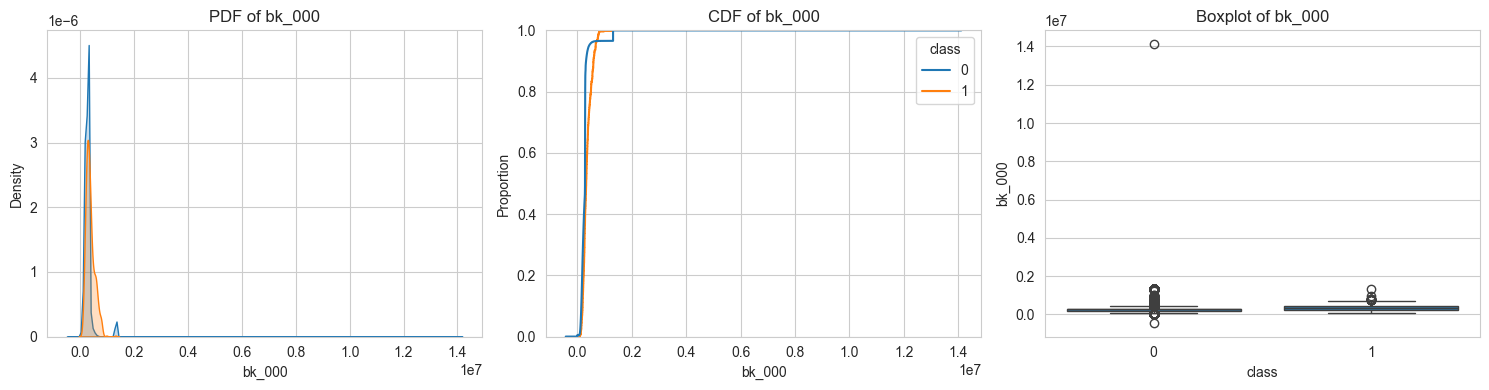


Feature: bh_000
Class 0 - Mean: 37258.93, Std Dev: 61083.94
Class 1 - Mean: 323444.13, Std Dev: 110319.87


2025-02-09 21:57:35,236 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:35,349 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


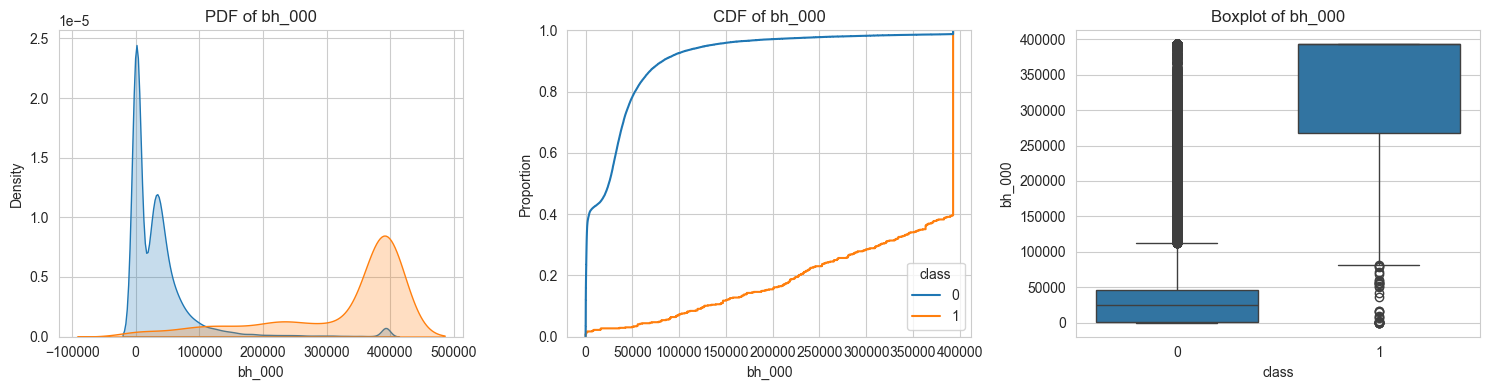


Feature: bm_000
Class 0 - Mean: 369957.54, Std Dev: 442932.31
Class 1 - Mean: 330235.95, Std Dev: 144541.28


2025-02-09 21:57:36,908 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:37,003 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


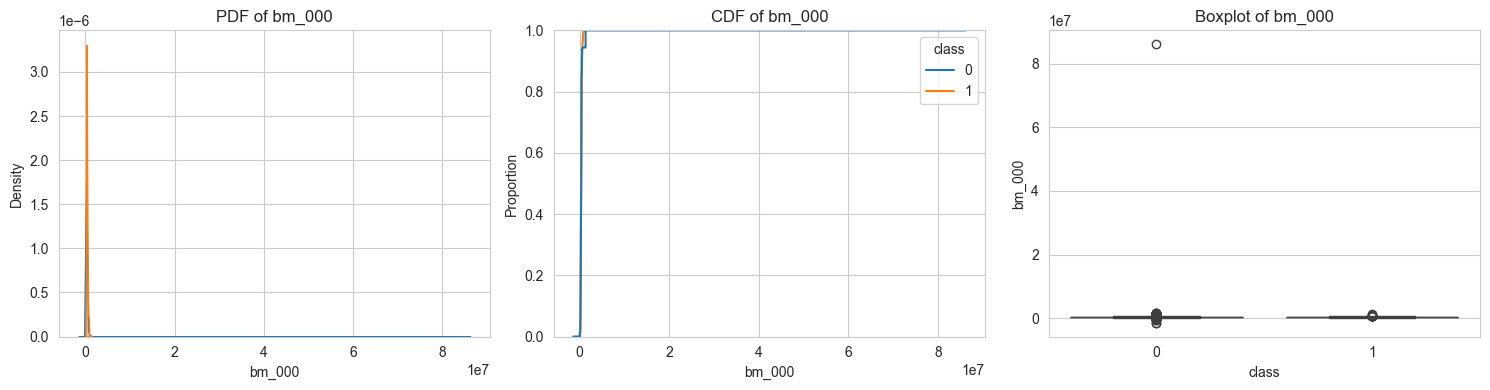


Feature: ah_000
Class 0 - Mean: 1239460.27, Std Dev: 1925272.41
Class 1 - Mean: 9811308.73, Std Dev: 3235865.33


2025-02-09 21:57:39,291 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:39,373 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


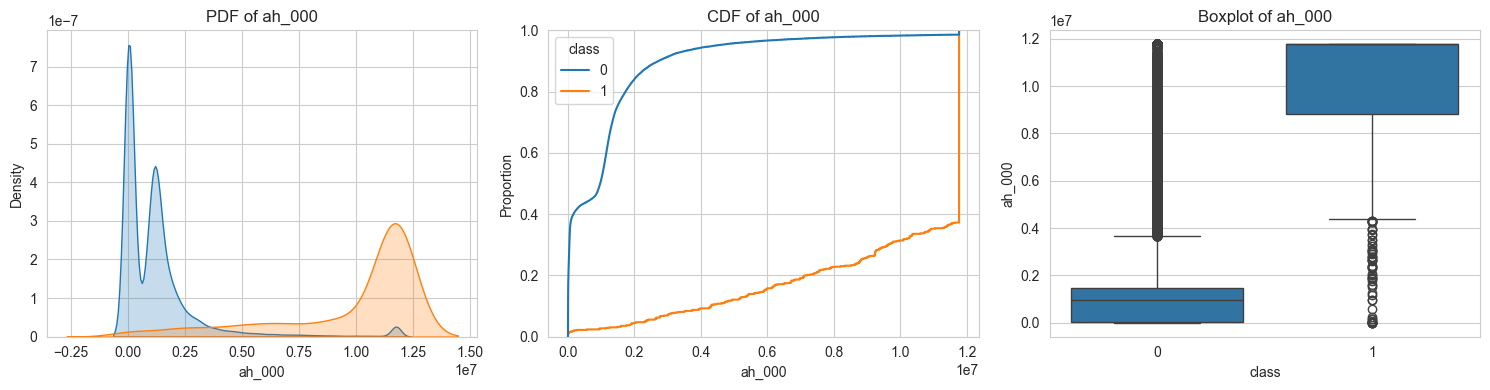


Feature: ci_000
Class 0 - Mean: 2274906.55, Std Dev: 3445648.11
Class 1 - Mean: 17469096.64, Std Dev: 5608083.73


2025-02-09 21:57:41,469 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:41,537 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


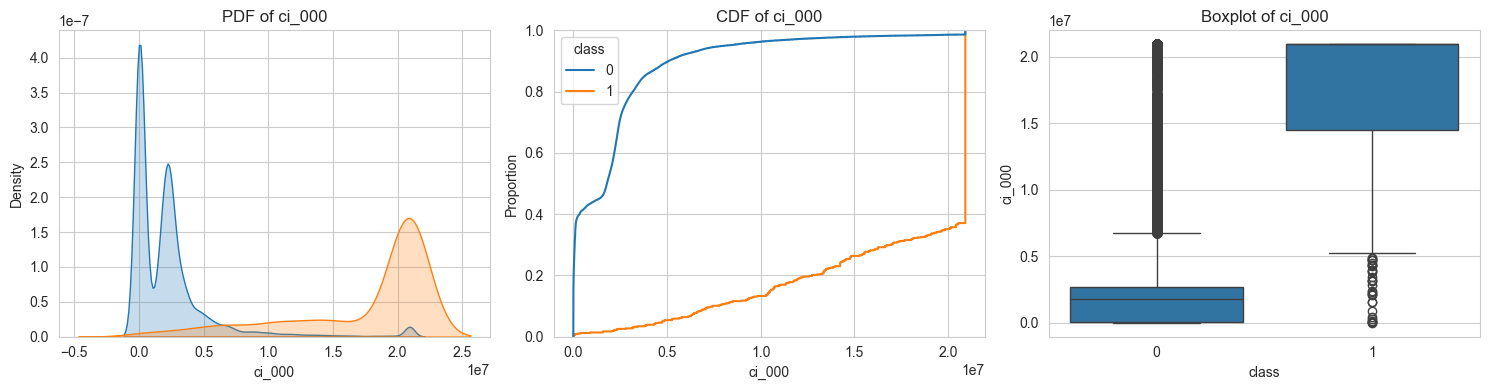


Feature: cy_000
Class 0 - Mean: 91.3, Std Dev: 1473.84
Class 1 - Mean: 1642.14, Std Dev: 6072.85


2025-02-09 21:57:43,247 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:43,314 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


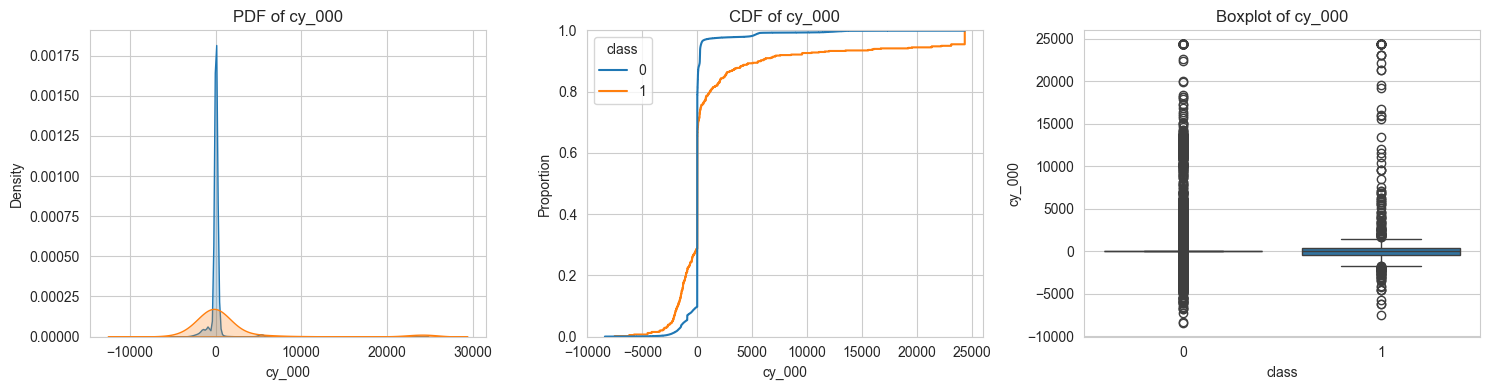


Feature: ai_000
Class 0 - Mean: 2688.69, Std Dev: 23139.55
Class 1 - Mean: 49591.88, Std Dev: 102124.02


2025-02-09 21:57:44,949 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:45,022 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


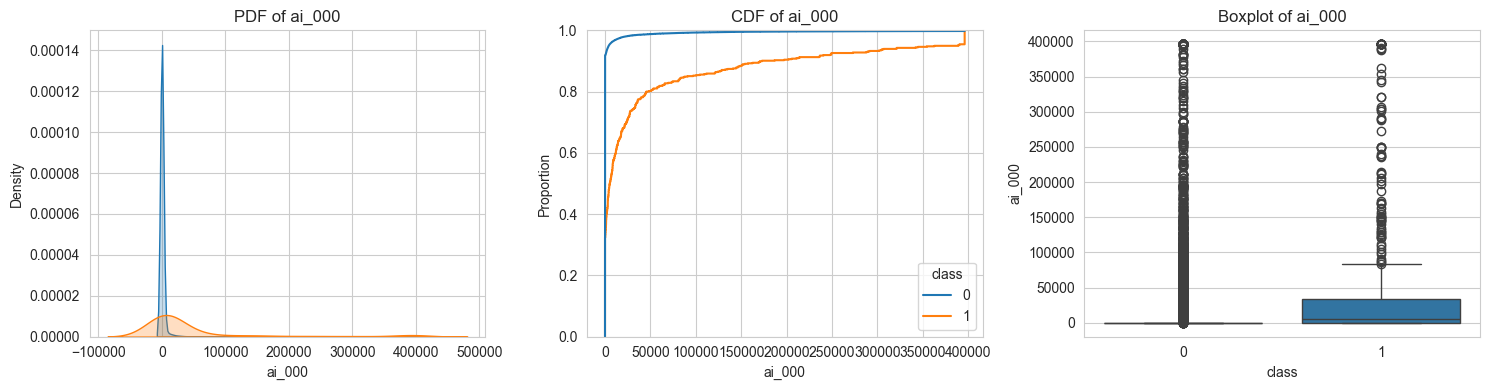


Feature: bt_000
Class 0 - Mean: 38796.83, Std Dev: 59743.62
Class 1 - Mean: 297821.68, Std Dev: 103995.27


2025-02-09 21:57:47,233 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:47,362 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


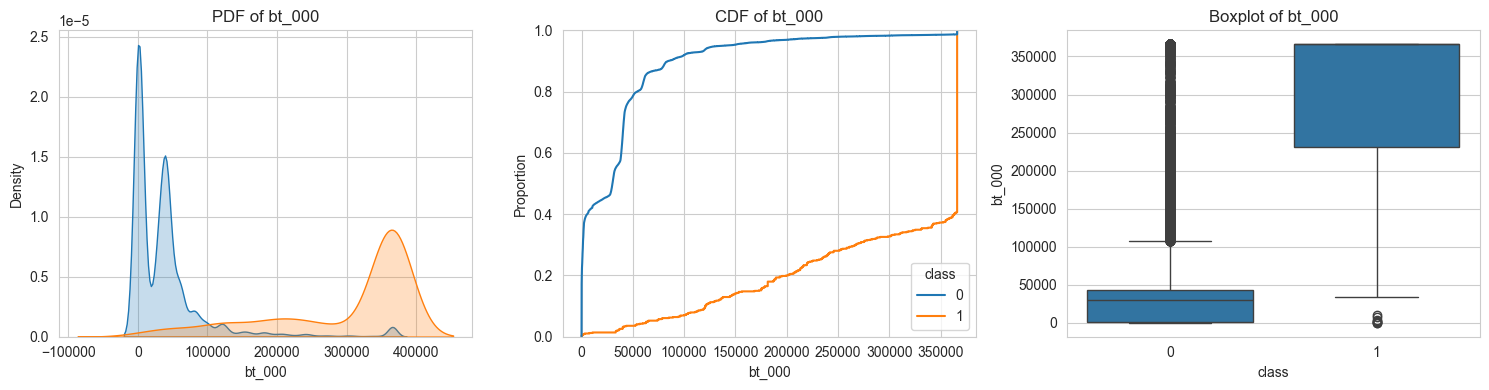


Feature: ao_000
Class 0 - Mean: 2057018.36, Std Dev: 3076821.37
Class 1 - Mean: 15268156.28, Std Dev: 5152968.67


2025-02-09 21:57:50,138 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:50,228 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


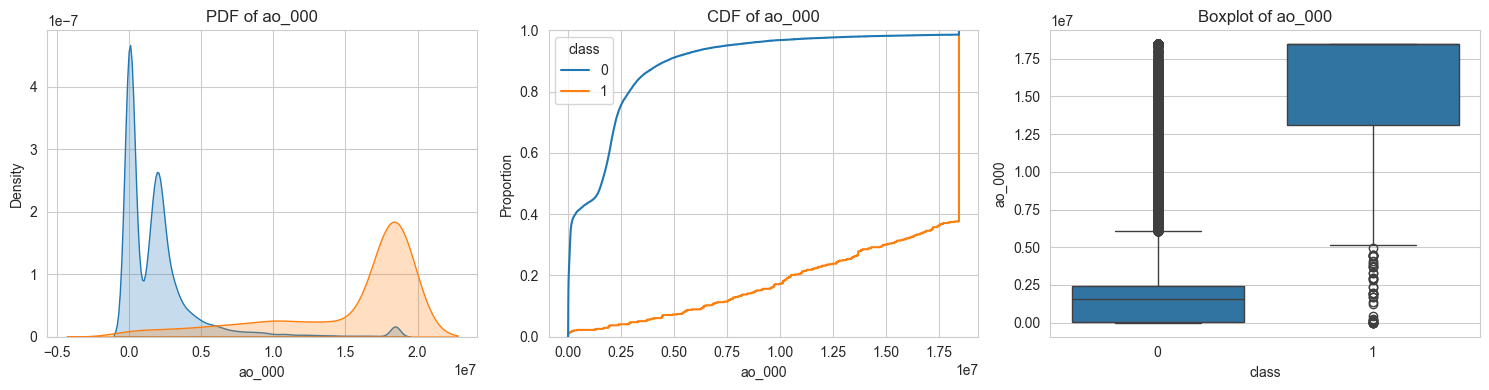


Feature: bc_000
Class 0 - Mean: 384.2, Std Dev: 1454.41
Class 1 - Mean: 4848.95, Std Dev: 4861.66


2025-02-09 21:57:52,196 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:52,270 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


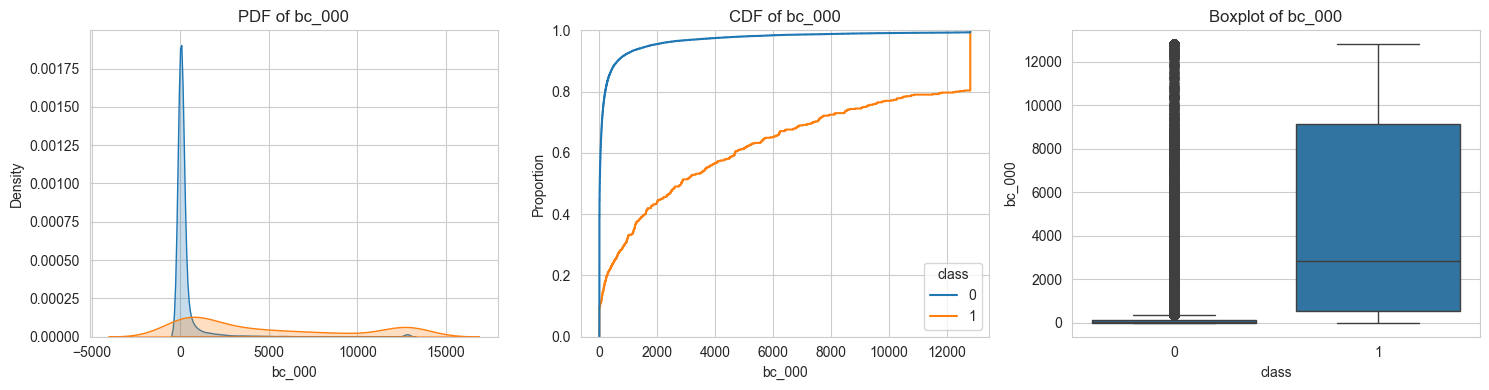


Feature: cq_000
Class 0 - Mean: 2980716.4, Std Dev: 4552883.25
Class 1 - Mean: 23797968.31, Std Dev: 7598994.2


2025-02-09 21:57:54,147 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:54,211 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


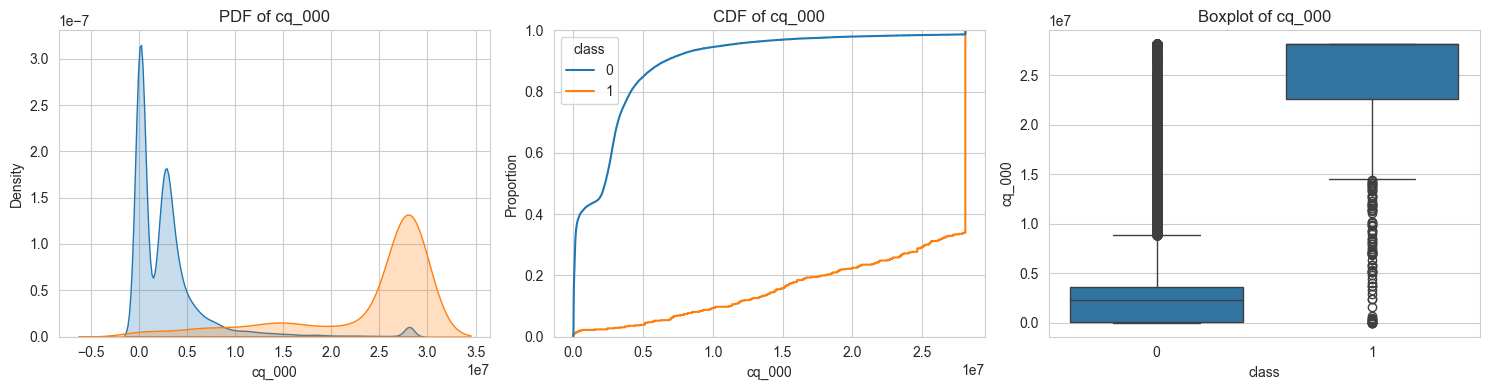


Feature: cu_000
Class 0 - Mean: 984.75, Std Dev: 1983.55
Class 1 - Mean: 2276.49, Std Dev: 6219.14


2025-02-09 21:57:55,847 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-09 21:57:55,911 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


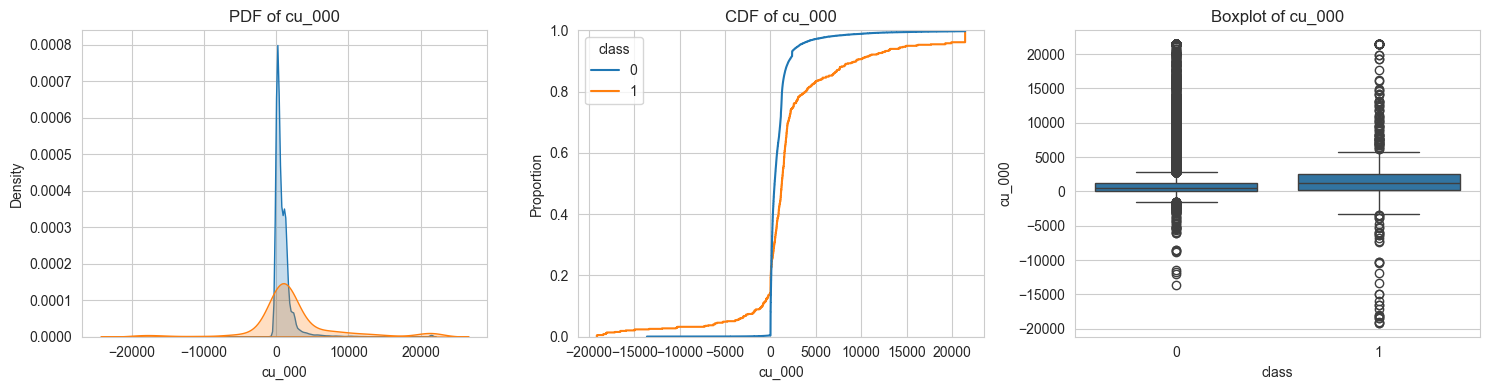

In [29]:
# Perform univariate analysis on selected features
univariate_analysis(train_data_cleaned[no_bin_selected_features + ['class']], 'class')

#### Findings from Univariate analysis for no-bin features:

This technical analysis examines multiple system parameters across various subsystems, revealing distinct patterns between normal operations and failure states. The analysis demonstrates significant potential for implementing robust predictive maintenance strategies and early warning systems.

**System Parameter Analysis:** The air pressure system parameter `ap_000` exhibits a notable bimodal distribution with clear separation between operational states. During normal operation, the parameter maintains a mean of 578,980.3 with a standard deviation of 1,021,849.13, characterized by a sharp peak near zero and a smaller secondary peak. Failure states show substantially elevated values with a mean of 5,737,678.6 and increased variability (SD: 2,046,578.92), centered around 7-8 million units. This clear separation provides a strong foundation for threshold-based monitoring.

System performance parameters `bv_000` and bb_000 demonstrate remarkably similar characteristics, suggesting interconnected system components. Both parameters show bimodal distributions during normal operation with means around 2.98 million and standard deviations of approximately 4.55 million. Failure states for both parameters exhibit dramatically higher values (means ~23.8 million) with increased variability (SD ~7.6 million), indicating these parameters could serve as redundant measurements for validation purposes.

The control parameter `dg_000` presents a unique distribution pattern, with normal operations tightly concentrated near zero (mean: 879.83, SD: 14,186.73) and failure cases showing significantly dispersed values (mean: 44,458.95, SD: 144,313.9). This step-like behavior suggests discrete state transitions rather than continuous degradation.

Dynamic system parameters `dn_000` and `dy_000` show excellent discrimination between operational states. The dn_000 parameter maintains normal operations around 21,368.72 (SD: 36,637.96) with failure cases averaging 205,633.87 (SD: 71,920.76). Similarly, `dy_000` shows tight control during normal operation (mean: 4,764.13, SD: 21,695.13) with significant elevation during failures (mean: 36,836.22, SD: 63,775.88).

#### Statistical Implications and Operational Recommendations:

The analysis reveals optimal monitoring thresholds for critical parameters. For `ap_000`, values exceeding 3 million units should trigger increased monitoring. The `bv_000` and `bb_000` parameters suggest implementing alerts at 1.5 × 10⁷ units. The `dg_000` parameter indicates potential issues above 20,000 units, while `dy_000` shows clear separation at 25,000 units.

The comprehensive statistical analysis supports implementing a multi-parameter monitoring approach. The strong correlation between `bv_000` and `bb_000` provides opportunities for cross-validation, potentially reducing false alarms. The distinct behavior of `dg_000` suggests its use as a discrete state indicator, complementing the continuous monitoring capabilities of other parameters.

This analysis demonstrates that while individual parameters provide valuable insights into system health, the most effective monitoring strategy would involve tracking multiple parameters simultaneously. Particular attention should be paid to sudden changes in `dy_000` and dn_000 values, which show the clearest separation between normal operation and failure states. The implementation of these findings could significantly enhance predictive maintenance capabilities and reduce unexpected system failures.

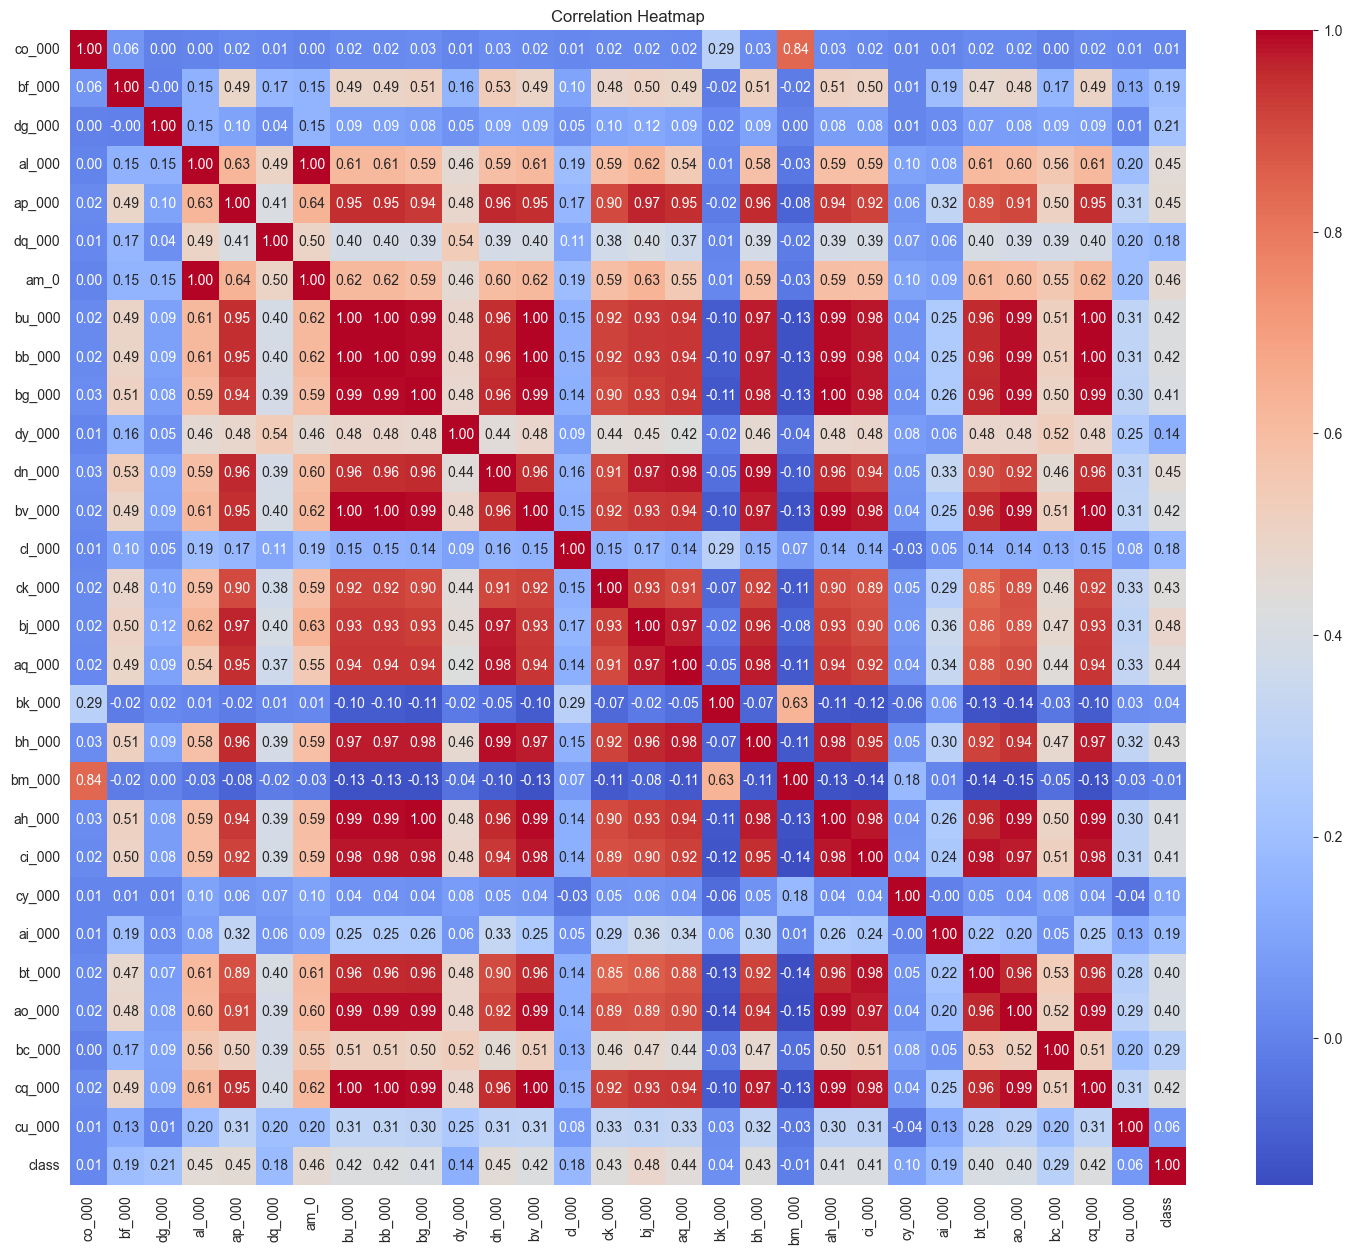

2025-02-09 21:58:00,762 - INFO - Top 5 uncorrelated features:
bm_000   -0.009251
co_000    0.014057
bk_000    0.037585
cu_000    0.063798
cy_000    0.099388
Name: class, dtype: float64
2025-02-09 21:58:00,762 - INFO - The most uncorrelated feature is: bm_000


In [30]:
no_bin_selected_features_df = train_data_cleaned[no_bin_selected_features+['class']]
no_bin_top_uncorrelated_features = correlation_matrix(data=no_bin_selected_features_df)

#### Correlation Analysis and Feature Relationships:

The correlation heatmap reveals several important patterns in the APS sensor data. Many features show strong positive correlations (red squares) with correlation coefficients above 0.9, indicating potential redundancy in the measurements. However, the analysis has identified five key features with low correlation to the target class variable, which may provide unique predictive value:
- `bm_000` (-0.009251): Shows virtually no linear correlation with failure events
- `co_000` (0.014057): Very weak positive correlation
- `bk_000` (0.037585): Weak positive correlation
- `cu_000` (0.063798): Mild positive correlation
- `cy_000` (0.099388): Strongest correlation among the uncorrelated features, but still weak

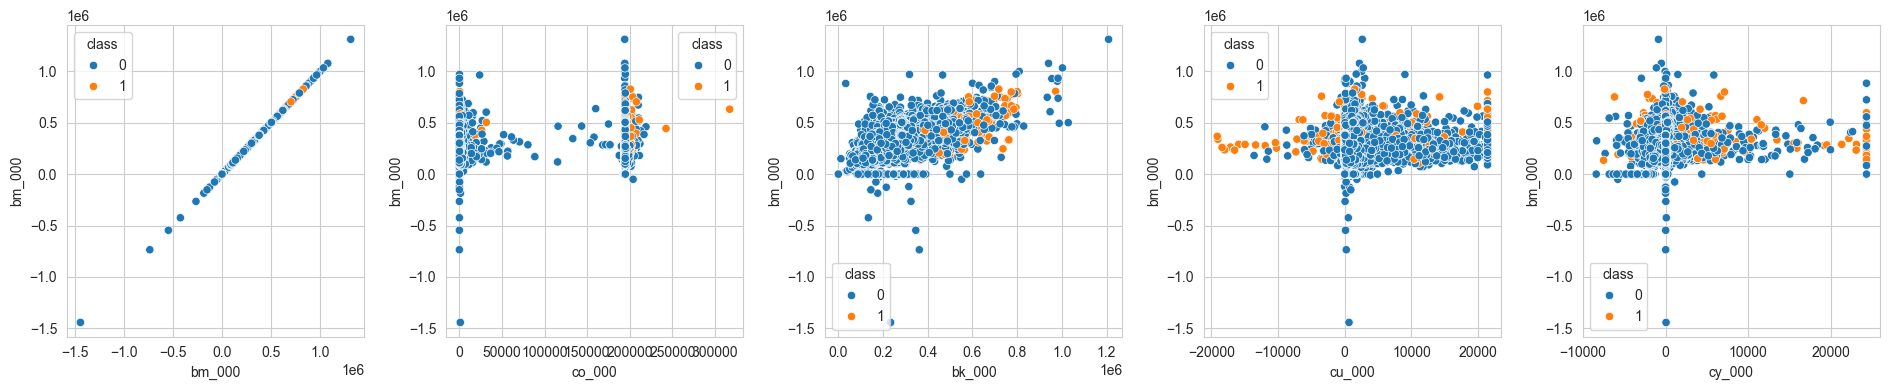

In [31]:
no_bin_top_uncorr_df = no_bin_selected_features_df[no_bin_top_uncorrelated_features + ['class']]
scatter_plot(data=no_bin_top_uncorr_df, feature=no_bin_top_uncorrelated_features[0], percentile=95)

#### Interpretation

- **`bm_000` vs class correlations**: The first plot shows a strong linear relationship in the data points, forming an almost perfect diagonal line. This suggests that this feature has a very consistent and predictable behavior during normal operations, which could make any deviations particularly noticeable for failure detection.
- **`co_000` vs class correlations**: The second scatter plot shows more dispersed data points with two main clusters - one near zero and another around the 200,000 mark. There's some overlap between failure (class 1) and non-failure (class 0) cases, but the clustering pattern could be useful for identifying certain types of system states.
- **`bk_000` vs class correlations**: This plot shows a wide spread of data points with significant overlap between classes. The distribution appears more random than the previous features, with data points scattered across the range of 0 to 1.2e6. The lack of clear separation between classes suggests this feature alone might not be a strong predictor of failures.
- **`cu_000` vs class correlations**: The fourth plot shows an interesting symmetric distribution around zero, with data points spread between -20000 and +20000. There appears to be a denser concentration of points near the center, with failure cases (orange) showing slightly more spread than normal operations (blue).
- **`cy_000` vs class correlations**: The final plot shows a similar pattern to `cu_000` but with more distinct clustering around zero. The failure cases seem to have a wider spread, particularly in the positive range, which could be useful for detecting anomalous behavior.

These visualizations suggest that while individual features may not provide clear failure prediction on their own, their combined patterns - particularly sudden deviations from typical clustering patterns - could be valuable indicators for an early warning system. The strong linear relationship in bm_000 could serve as a particularly useful baseline reference for system stability.

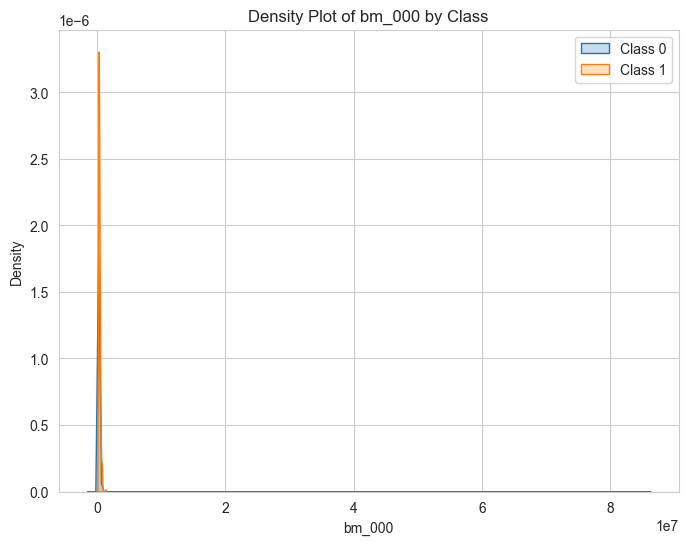

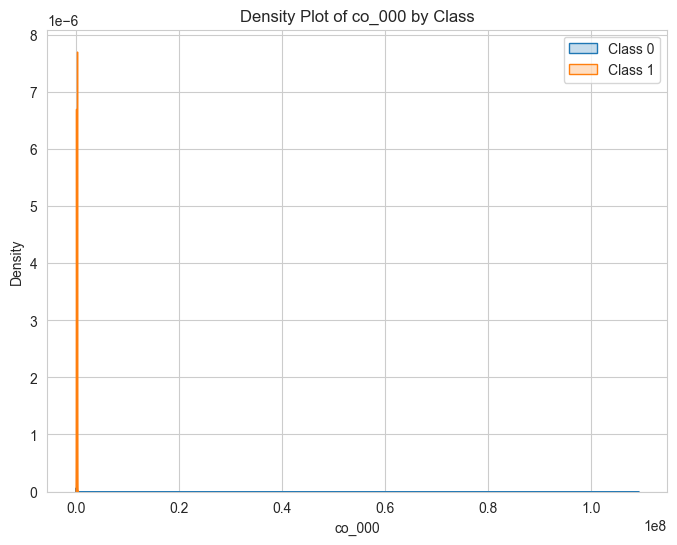

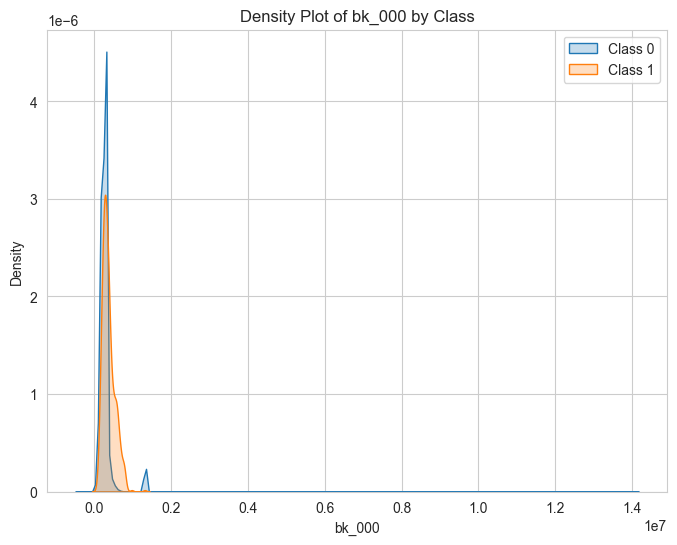

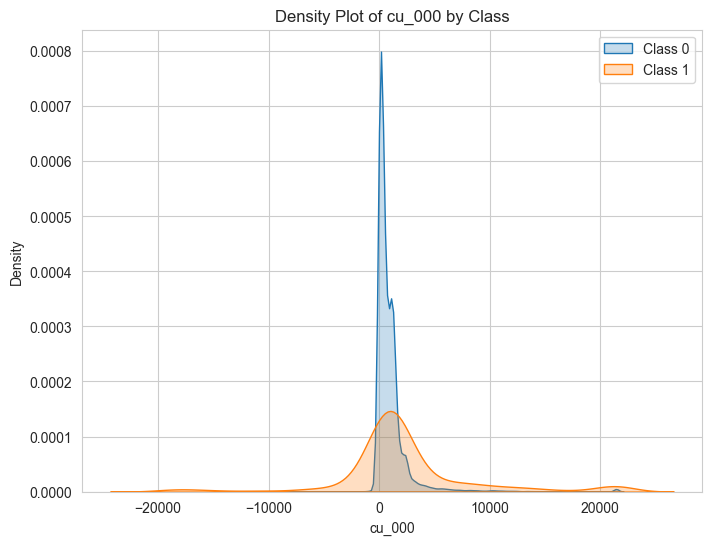

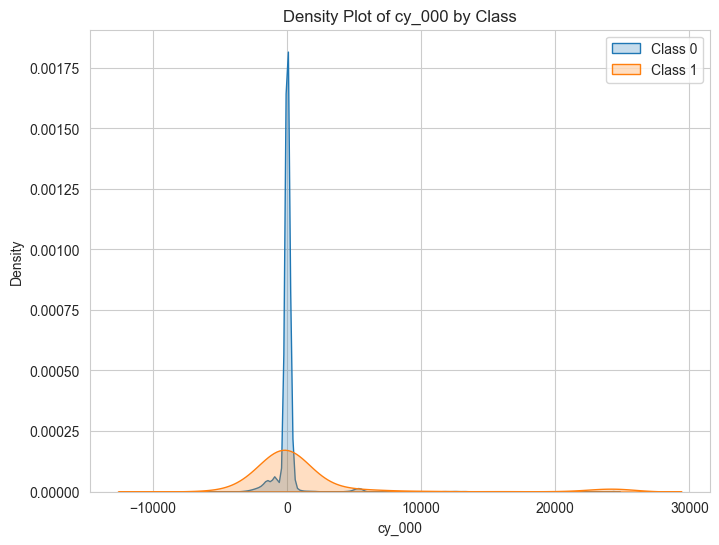

In [32]:
visualize_class_distributions(train_data_cleaned[no_bin_top_uncorrelated_features + ['class']], no_bin_top_uncorrelated_features)

#### Analysis:

* bm_000: The density plot shows an extremely concentrated distribution near zero for both classes, with almost complete overlap. The scatter plots reveal a linear pattern in the data points, suggesting this feature might be derived from or closely related to other measurements. While it has the lowest correlation with failures, its consistent behavior could serve as a baseline reference for system operation.
* co_000: The density distribution demonstrates a sharp peak near zero with minimal separation between classes. The scatter plots show some clustering patterns, particularly for class 0 (normal operation). This feature's weak correlation with failures but distinct clustering behavior suggests it might be useful in combination with other features.
* bk_000: Shows a bimodal distribution for class 0 with a secondary peak around 0.2e7, while class 1 maintains a single peak near zero. The CDF reveals a clear separation pattern after the initial concentration, indicating potential value for detecting certain types of anomalies.
* cu_000: Exhibits a broader distribution for class 1 compared to class 0, with higher variance in the failure cases. The pronounced peak in class 0 could serve as a reliable baseline for normal operation, with deviations potentially indicating developing issues.
* cy_000: Shows the most distinct separation among the uncorrelated features, with class 1 displaying a wider spread and multiple modes. This suggests it captures unique aspects of system behavior not reflected in other measurements.
Operational Implications and Early Warning System Design:

- **Primary Monitoring Features**: The `cl_000` and `ai_000` features show significant differences between normal and failure states, with notably higher means and standard deviations in failure cases. These could serve as primary monitoring indicators.
- **Secondary Validation Features**: The uncorrelated features (particularly cy_000 and cu_000) could serve as independent verification metrics, helping to reduce false positives.

**Statistical Thresholds:**

- For cl_000: Alert threshold around 840 (normal mean + 1 std)
- For ai_000: Warning level at 25,828 (normal mean + 1 std)

##### Combined Monitoring Strategy: 

**Implement a weighted scoring system that:**

Uses the highly correlated features for primary failure detection
Validates alerts using the uncorrelated features to confirm anomalies
Monitors trend changes in the bm_000 and co_000 features as baseline stability indicators

This analysis suggests a multi-layered monitoring approach would be most effective, using both the strongly correlated and uncorrelated features to provide robust failure prediction while minimizing false alarms.

## Step 4: Feature Engineering

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

def balance_classes(df, label, over_strategy=0.3, under_strategy=0.5):
    """
    Balances the class distribution in the dataset using SMOTE and Random Under-Sampling.

    Parameters:
    - df (pd.DataFrame): The feature DataFrame.
    - label (pd.Series): The target labels.
    - over_strategy (float): The desired ratio of the minority class after SMOTE.
    - under_strategy (float): The desired ratio of the majority class after under-sampling.

    Returns:
    - pd.DataFrame: The balanced feature DataFrame.
    - pd.Series: The balanced target labels.
    """
    
    # Define the over-sampling and under-sampling strategies
    over = SMOTE(sampling_strategy=over_strategy)
    under = RandomUnderSampler(sampling_strategy=under_strategy)

    # Create a pipeline with the defined steps
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)  # Use imblearn's Pipeline

    # Fit and resample the data
    df_balanced, label_balanced = pipeline.fit_resample(df, label)

    return df_balanced, label_balanced

# Convert the target column ('class') to binary (0 for 'neg', 1 for 'pos')
test_data_cleaned['class'] = test_data_cleaned['class'].map({'neg':0, 'pos':1})

# Separate features and target variable
X_train_balanced, y_train_balanced = balance_classes(train_data_cleaned.drop(columns=['class']), 
                                                     train_data_cleaned['class'])

# Assuming you have your DataFrame `test_cleaned_data` and target `y_test`
X_test_balanced, y_test_balanced = balance_classes(test_data_cleaned.drop(columns=['class']), 
                                                   test_data_cleaned['class'])

In [34]:
print(f"X_train_balanced Shape: {X_train_balanced.shape}")
print(f"X_test_balanced Shape: {X_test_balanced.shape}")
y_train_balanced.value_counts() 

X_train_balanced Shape: (49806, 162)
X_test_balanced Shape: (13200, 162)


class
0    33204
1    16602
Name: count, dtype: int64

2025-02-09 21:58:26,295 - INFO - Training X Set: (49806, 2), Y set: (49806,)


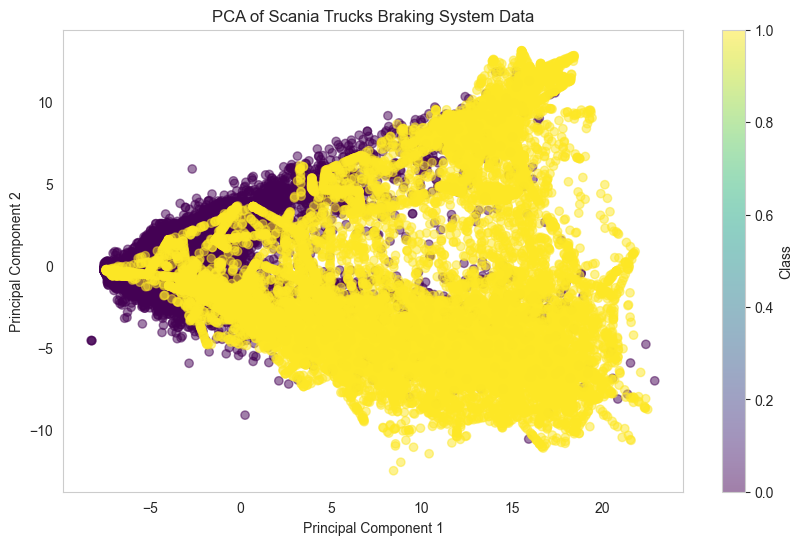

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 

# Create a pipeline with StandardScaler and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('pca', PCA(n_components=2))   # Step 2: Apply PCA to reduce to 2 components
])

# Fit the pipeline on the training data and transform it
X_train_pca = pipeline.fit_transform(X_train_balanced)
logger.info(f"Training X Set: {X_train_pca.shape}, Y set: {y_train_balanced.shape}")
# Transform the test data using the same pipeline (without fitting)
X_test_pca = pipeline.transform(X_test_balanced)

# Create a DataFrame for the PCA results for visualization
pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Class'] = y_train_balanced.values  # Add the target variable for coloring

# Plotting the PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], 
                      c=pca_df['Class'], alpha=0.5, cmap='viridis')

plt.title('PCA of Scania Trucks Braking System Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class')
plt.grid()
plt.show()

## Step 5: Model Development

In [36]:
import pandas as pd
from skopt import BayesSearchCV
from sklearn.model_selection import KFold

def hyper_parameter_tuning(model: Pipeline, X: pd.DataFrame, y: pd.Series, param_space: dict, 
                           n_iter: int = 50, cv: int = 5, verbose: int=10):
    """
    Perform Bayesian hyperparameter tuning for a given model using cross-validation.

    Parameters:
    - model (Pipeline): The machine learning pipeline model to tune.
    - X (pd.DataFrame): The feature DataFrame.
    - y (pd.Series): The target labels.
    - param_space (dict): The parameter space for tuning.
    - n_iter (int): Number of iterations for the search (default is 50).
    - cv (int): Number of cross-validation folds (default is 5).

    Returns:
    - best_params (dict): The best parameters found during tuning.
    - best_score (float): The best score achieved during tuning.
    """
    
    # Create a KFold object for cross-validation
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    # Initialize BayesSearchCV with the model and parameter space
    clf = BayesSearchCV(
        model,
        param_space,
        n_iter=n_iter,
        cv=kf,
        n_jobs=-1,  # Use all available cores
        random_state=42,
        verbose=verbose
    )

    # Fit the model to the data
    clf.fit(X, y)

    return clf.best_params_, clf.best_score_


In [57]:
from sklearn.metrics import ( accuracy_score, 
                             classification_report, 
                             confusion_matrix,
                             precision_recall_curve,
                             f1_score
                             )

from sklearn.metrics import roc_curve, auc

def evaluate_model(model, params: Dict[str, Tuple[pd.DataFrame, pd.Series]], plot: bool = True, verbose: int = 0):
    """
    Evaluates the model on multiple datasets provided in a dictionary.

    Parameters:
        params (dict): A dictionary where keys are dataset names (e.g., "Training", "Testing", "Validation")
                      and values are tuples of (X, y, y_pred).

    Returns:
        dict: A dictionary containing accuracy scores, classification reports, ROC curves, and AUC scores for each dataset.
    """
    results = {}

    for dataset, (X, y) in params.items():
        # Get binary predictions
        y_pred = model.predict(X)

        # Evaluate accuracy, classification report, and confusion matrix
        accuracy = accuracy_score(y, y_pred)
        report = classification_report(y, y_pred)
        matrix = confusion_matrix(y, y_pred)
        f1_score_ = f1_score(y, y_pred, average='macro')

        # Try calculating ROC-AUC only if the model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X)[:, 1]
            fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
            roc_auc = auc(fpr, tpr)
        else:
            roc_auc = None
            fpr, tpr, thresholds = None, None, None

        # Log results
        if verbose > 0:
            logger.info(f'{dataset} Accuracy: {accuracy:.2f} \n')
            logger.info(f"{dataset} Confusion matrix:\n{matrix}")
            logger.info(f'{dataset} Classification Report:\n{report}')
            if roc_auc is not None:
                logger.info(f"{dataset} AUC: {roc_auc:.2f}")

        if plot:
            # Plot Confusion Matrix
            sns.heatmap(matrix, annot=True, fmt='', cmap='Blues')
            plt.title(f'{dataset} Confusion Matrix')
            plt.show()

            # Plot ROC Curve if available
            if roc_auc is not None:
                plt.figure()
                plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'{dataset} Receiver Operating Characteristic')
                plt.legend(loc='lower right')
                plt.show()

        # Store results in dictionary
        results[f'{dataset}_accuracy'] = accuracy
        results[f'{dataset}_report'] = report
        results[f'{dataset}_matrix'] = matrix
        results[f'{dataset}_f1_score'] = f1_score_
        results[f'{dataset}_auc'] = roc_auc
        results[f'{dataset}_roc_curve'] = (fpr, tpr, thresholds)

    return results


2025-02-09 21:58:29,883 - INFO - Training Accuracy: 0.67 

2025-02-09 21:58:29,884 - INFO - Training Confusion matrix:
[[33204     0]
 [16602     0]]
2025-02-09 21:58:29,886 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     33204
           1       0.00      0.00      0.00     16602

    accuracy                           0.67     49806
   macro avg       0.33      0.50      0.40     49806
weighted avg       0.44      0.67      0.53     49806

2025-02-09 21:58:29,891 - INFO - Training AUC: 0.50


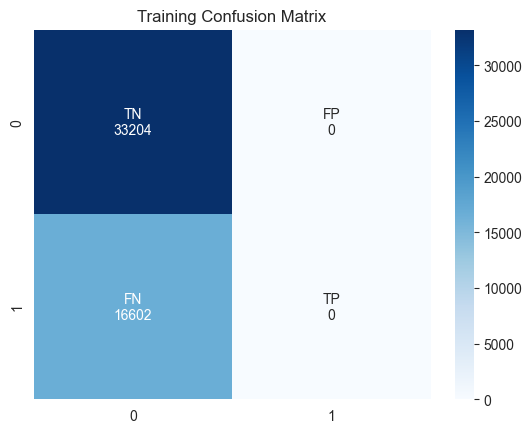

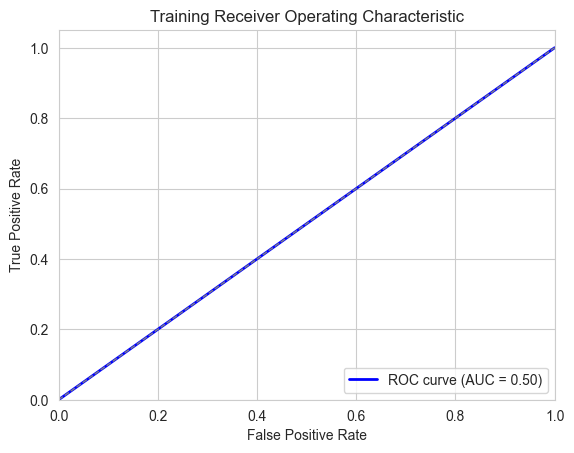

2025-02-09 21:58:30,317 - INFO - Testing Accuracy: 0.67 

2025-02-09 21:58:30,320 - INFO - Testing Confusion matrix:
[[8800    0]
 [4400    0]]
2025-02-09 21:58:30,325 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      8800
           1       0.00      0.00      0.00      4400

    accuracy                           0.67     13200
   macro avg       0.33      0.50      0.40     13200
weighted avg       0.44      0.67      0.53     13200

2025-02-09 21:58:30,327 - INFO - Testing AUC: 0.50


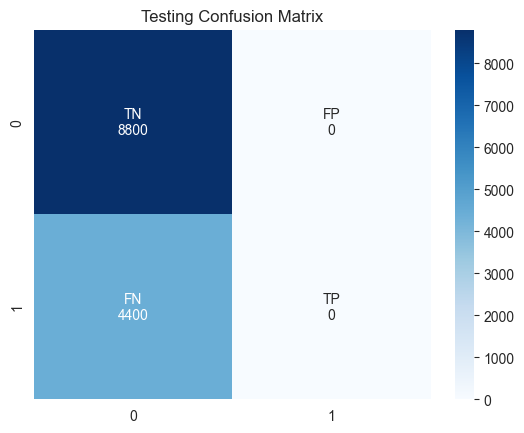

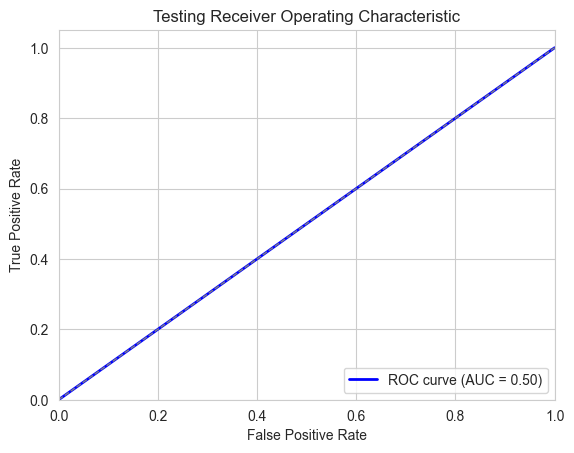

In [38]:
from sklearn.dummy import DummyClassifier
data_dict = {
    "Training": (X_train_pca, y_train_balanced),
    "Testing": (X_test_pca, y_test_balanced)
}
dummy_model = DummyClassifier(strategy='most_frequent', constant=0)
dummy_model.fit(X_train_pca, y_train_balanced)

reports = evaluate_model(dummy_model, data_dict, verbose=1)


In [39]:
import os
import joblib
import logging
from typing import Dict, Tuple, Optional, Callable, Any

# Configure Logger
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
logger = logging.getLogger(__name__)

def train_and_evaluate_model(model_func: Callable, 
                             datasets: Dict[str, Tuple[Any, Any]],
                             param_space: Dict[str, Any], 
                             filename: str) -> Tuple[Callable, dict]:
    """
    Train and evaluate a machine learning model, perform hyperparameter tuning if required, 
    and save the model if it performs well.

    Parameters:
    - model_func (Callable): Model constructor function (e.g., RandomForestClassifier).
    - datasets (Dict[str, Tuple[Any, Any]]): Dictionary containing dataset splits 
      (e.g., {'Training': (X_train, y_train), 'Validation': (X_val, y_val)}).
    - param_space (Dict[str, Any]): Parameter space for hyperparameter tuning.
    - filename (str): Path to save or load the trained model.

    Returns:
    - model (Callable): The trained model.
    - report (dict): Evaluation report containing accuracy and other metrics.
    """

    # Attempt to load an existing model
    try:
        model = joblib.load(filename)
        logger.info(f"Loaded existing model from {filename}.")
    except (FileNotFoundError, EOFError, OSError):
        logger.info("No valid existing model found. Starting training.")

        # Instantiate the model
        try:
            model = model_func(random_state=42)
        except TypeError:
            model = model_func()

        # Perform hyperparameter tuning
        best_params, best_score = hyper_parameter_tuning(
            model, datasets['Training'][0], datasets['Training'][1], param_space
        )
        
        logger.info(f"Best Parameters: {best_params}")
        logger.info(f"Best Score: {best_score:.4f}")

        # Train the model with the best parameters
        try:
            model = model_func(random_state=42, **best_params)
        except TypeError:
            model = model_func(**best_params)

        model.fit(datasets['Training'][0], datasets['Training'][1])

    # Evaluate the model
    report = evaluate_model(model, datasets, verbose=1)
    logger.info(f"Model evaluation report: {report}")

    # Save the model if it meets the accuracy threshold
    if report.get('Testing_accuracy', 0) > 0.80:
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        joblib.dump(model, filename)
        logger.info(f"Model saved to {filename}.")

    return model, report


2025-02-09 21:58:32,782 - INFO - Loaded existing model from trained_models/rdf_model.sav.
2025-02-09 21:58:38,403 - INFO - Training Accuracy: 0.94 

2025-02-09 21:58:38,406 - INFO - Training Confusion matrix:
[[31620  1584]
 [ 1485 15117]]
2025-02-09 21:58:38,409 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     33204
           1       0.91      0.91      0.91     16602

    accuracy                           0.94     49806
   macro avg       0.93      0.93      0.93     49806
weighted avg       0.94      0.94      0.94     49806

2025-02-09 21:58:38,410 - INFO - Training AUC: 0.97


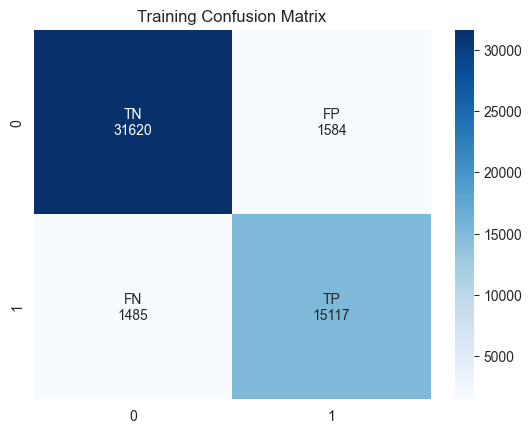

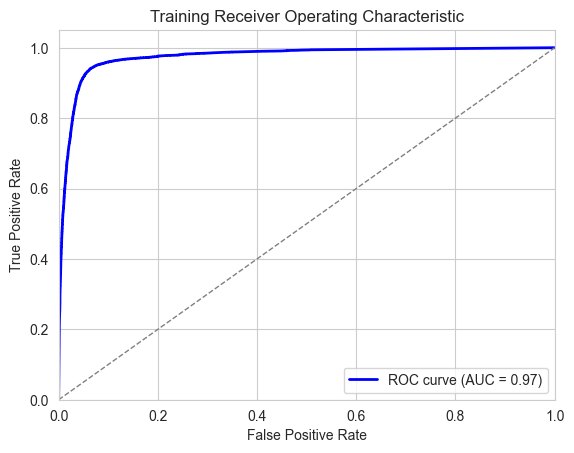

2025-02-09 21:58:40,294 - INFO - Testing Accuracy: 0.94 

2025-02-09 21:58:40,295 - INFO - Testing Confusion matrix:
[[8390  410]
 [ 424 3976]]
2025-02-09 21:58:40,299 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8800
           1       0.91      0.90      0.91      4400

    accuracy                           0.94     13200
   macro avg       0.93      0.93      0.93     13200
weighted avg       0.94      0.94      0.94     13200

2025-02-09 21:58:40,327 - INFO - Testing AUC: 0.97


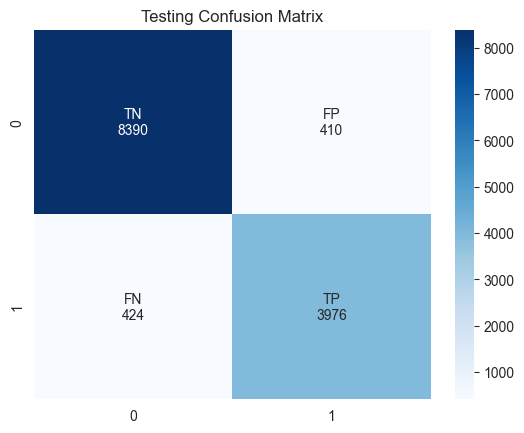

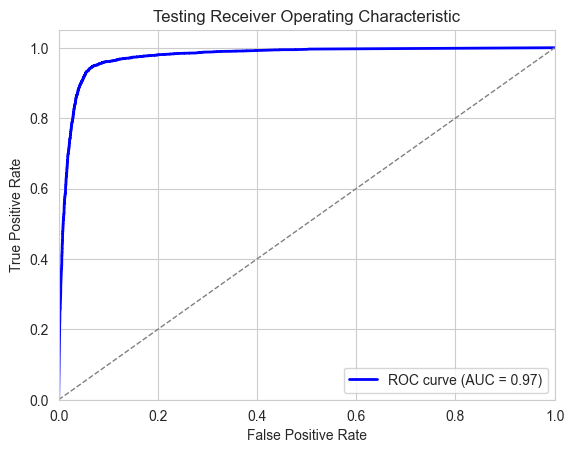

2025-02-09 21:58:40,999 - INFO - Model evaluation report: {'Training_accuracy': 0.9383809179616913, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.95     33204\n           1       0.91      0.91      0.91     16602\n\n    accuracy                           0.94     49806\n   macro avg       0.93      0.93      0.93     49806\nweighted avg       0.94      0.94      0.94     49806\n', 'Training_matrix': array([[31620,  1584],
       [ 1485, 15117]]), 'Training_f1_score': 0.9307814150147321, 'Training_auc': np.float64(0.9739624718610052), 'Training_roc_curve': (array([0.        , 0.00114444, 0.00114444, ..., 0.50870377, 0.50891459,
       1.        ], shape=(7356,)), array([0.        , 0.1983496 , 0.19931334, ..., 0.9940971 , 0.9940971 ,
       1.        ], shape=(7356,)), array([           inf, 1.00000000e+00, 9.99970501e-01, ...,
       6.06060606e-05, 5.29100529e-05, 0.00000000e+00], shape=(7356,))), 'Testing_accura

In [40]:
from sklearn.ensemble import RandomForestClassifier
rdf_param_space = {
    'n_estimators': (50, 100, 200, 300),  # Number of trees in the forest
    'max_depth': (None, 10, 20, 30),  # Maximum depth of the tree
    'min_samples_split': (2, 5, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 2, 4),  # Minimum number of samples required to be at a leaf node
}

rdf_model_func = RandomForestClassifier

filename = "trained_models/rdf_model.sav"

rdf_trained_model, rdf_evaluation_report = train_and_evaluate_model(rdf_model_func, data_dict, rdf_param_space, filename)

2025-02-09 21:58:45,353 - INFO - Loaded existing model from trained_models/ada_model.sav.
2025-02-09 21:58:49,592 - INFO - Training Accuracy: 0.94 

2025-02-09 21:58:49,593 - INFO - Training Confusion matrix:
[[31546  1658]
 [ 1405 15197]]
2025-02-09 21:58:49,594 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     33204
           1       0.90      0.92      0.91     16602

    accuracy                           0.94     49806
   macro avg       0.93      0.93      0.93     49806
weighted avg       0.94      0.94      0.94     49806

2025-02-09 21:58:49,595 - INFO - Training AUC: 0.97


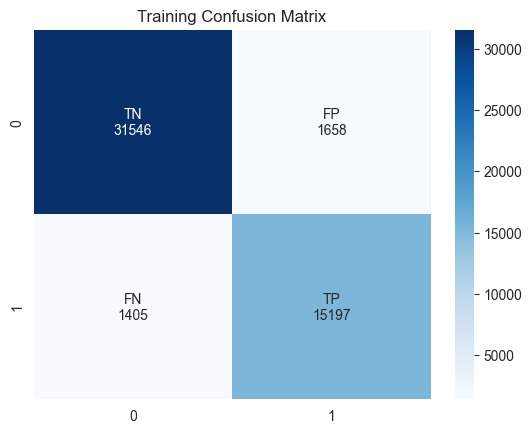

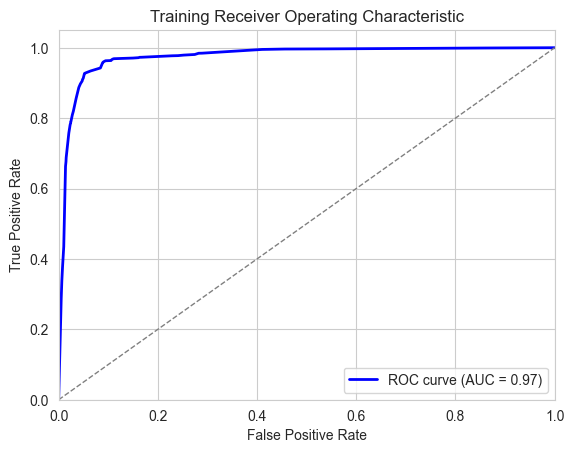

2025-02-09 21:58:51,247 - INFO - Testing Accuracy: 0.95 

2025-02-09 21:58:51,248 - INFO - Testing Confusion matrix:
[[8381  419]
 [ 289 4111]]
2025-02-09 21:58:51,249 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8800
           1       0.91      0.93      0.92      4400

    accuracy                           0.95     13200
   macro avg       0.94      0.94      0.94     13200
weighted avg       0.95      0.95      0.95     13200

2025-02-09 21:58:51,251 - INFO - Testing AUC: 0.98


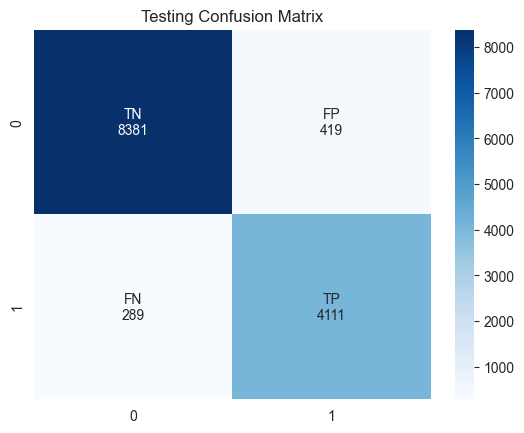

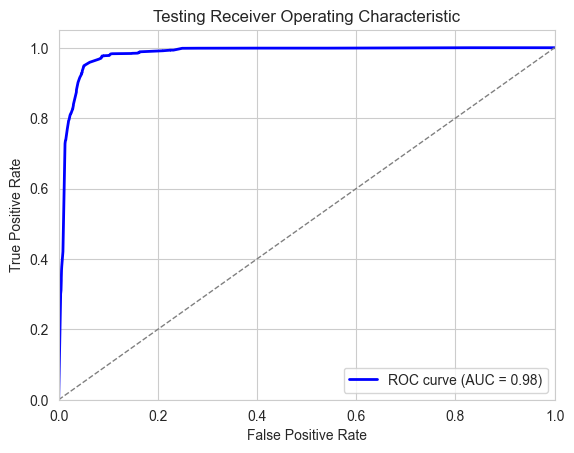

2025-02-09 21:58:52,566 - INFO - Model evaluation report: {'Training_accuracy': 0.938501385375256, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.95     33204\n           1       0.90      0.92      0.91     16602\n\n    accuracy                           0.94     49806\n   macro avg       0.93      0.93      0.93     49806\nweighted avg       0.94      0.94      0.94     49806\n', 'Training_matrix': array([[31546,  1658],
       [ 1405, 15197]]), 'Training_f1_score': 0.931074648282745, 'Training_auc': np.float64(0.974299103252822), 'Training_roc_curve': (array([0.        , 0.00457776, 0.00457776, 0.00457776, 0.0048187 ,
       0.0048187 , 0.0051801 , 0.0051801 , 0.0051801 , 0.00614384,
       0.00632454, 0.00641489, 0.00740875, 0.00740875, 0.00740875,
       0.0078605 , 0.01026985, 0.01385375, 0.01385375, 0.01421515,
       0.01421515, 0.01421515, 0.01421515, 0.01421515, 0.01424527,
       0.01427539, 0.01478738, 0

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ada_param_space = {
    "n_estimators": (50, 100, 200, 300, 500),  # Number of weak learners in the ensemble
    "learning_rate": (0.01, 0.05, 0.1, 0.5,  1.0),  # Weight applied to each classifier
}

ada_model_func = AdaBoostClassifier
filename = "trained_models/ada_model.sav"

ada_trained_model, ada_evaluation_report = train_and_evaluate_model(ada_model_func, data_dict, ada_param_space, filename)


2025-02-09 21:58:53,009 - INFO - Loaded existing model from trained_models\log_reg_model.sav.


2025-02-09 21:58:53,266 - INFO - Training Accuracy: 0.93 

2025-02-09 21:58:53,267 - INFO - Training Confusion matrix:
[[31987  1217]
 [ 2205 14397]]
2025-02-09 21:58:53,275 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     33204
           1       0.92      0.87      0.89     16602

    accuracy                           0.93     49806
   macro avg       0.93      0.92      0.92     49806
weighted avg       0.93      0.93      0.93     49806

2025-02-09 21:58:53,277 - INFO - Training AUC: 0.97


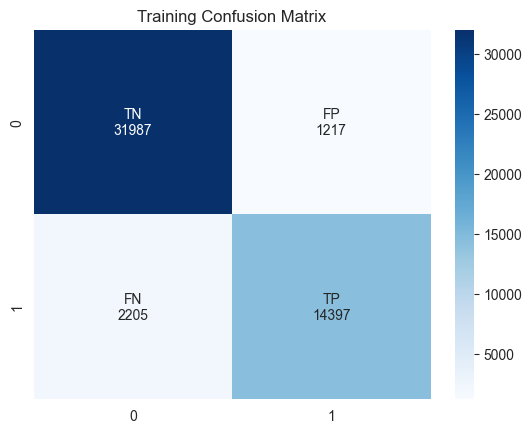

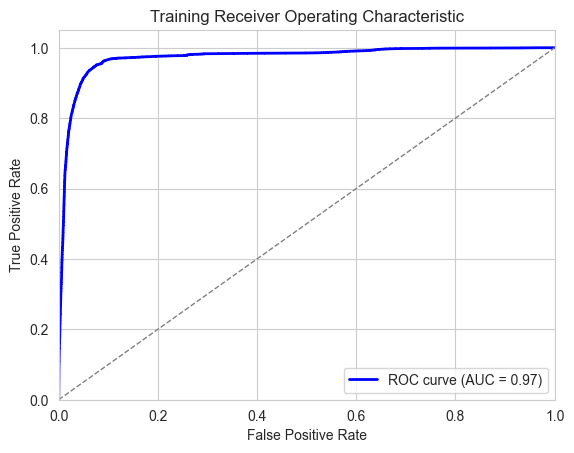

2025-02-09 21:58:55,135 - INFO - Testing Accuracy: 0.94 

2025-02-09 21:58:55,141 - INFO - Testing Confusion matrix:
[[8477  323]
 [ 497 3903]]
2025-02-09 21:58:55,143 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8800
           1       0.92      0.89      0.90      4400

    accuracy                           0.94     13200
   macro avg       0.93      0.93      0.93     13200
weighted avg       0.94      0.94      0.94     13200

2025-02-09 21:58:55,145 - INFO - Testing AUC: 0.98


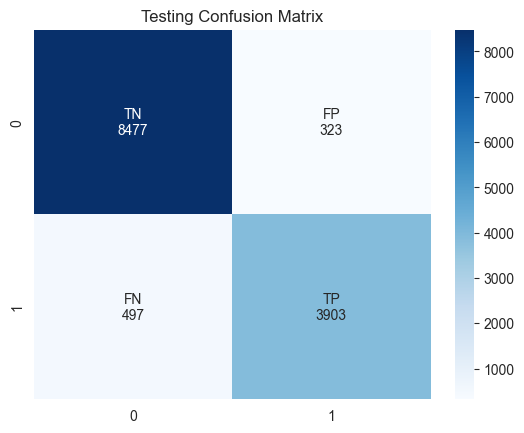

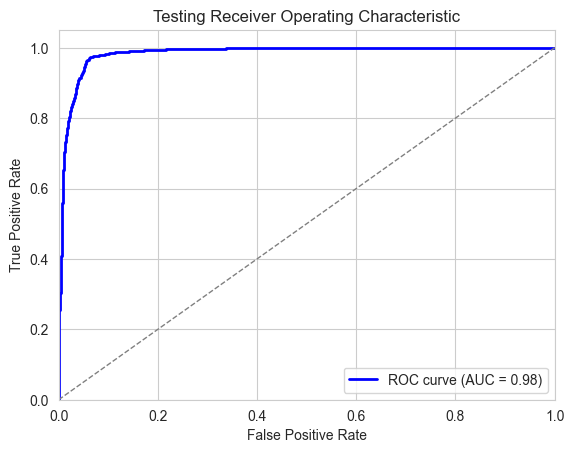

2025-02-09 21:58:56,179 - INFO - Model evaluation report: {'Training_accuracy': 0.9312934184636389, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95     33204\n           1       0.92      0.87      0.89     16602\n\n    accuracy                           0.93     49806\n   macro avg       0.93      0.92      0.92     49806\nweighted avg       0.93      0.93      0.93     49806\n', 'Training_matrix': array([[31987,  1217],
       [ 2205, 14397]]), 'Training_f1_score': 0.9215024808874008, 'Training_auc': np.float64(0.9725208402022327), 'Training_roc_curve': (array([0.        , 0.        , 0.        , ..., 0.96349837, 0.96349837,
       1.        ], shape=(4541,)), array([0.00000000e+00, 6.02337068e-05, 6.62570775e-04, ...,
       9.99939766e-01, 1.00000000e+00, 1.00000000e+00], shape=(4541,)), array([       inf, 0.99998717, 0.99998192, ..., 0.02102789, 0.02102773,
       0.01823982], shape=(4541,))), 'Testing_accura

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg_param_space = { 
    "C": (0.01, 0.05, 0.1, 0.5, 1.0, 5, 10.0),  # Regularization strength
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  # Solver for optimization
    "max_iter": (50, 100, 500)  # Maximum number of iterations
}

log_reg_model_func = LogisticRegression
filename = "trained_models\\log_reg_model.sav"

log_reg_trained_model, log_reg_evaluation_report = train_and_evaluate_model(log_reg_model_func, data_dict, log_reg_param_space, filename=filename)


2025-02-09 21:58:56,365 - INFO - Loaded existing model from trained_models/gb_model.sav.
2025-02-09 21:58:56,849 - INFO - Training Accuracy: 0.94 

2025-02-09 21:58:56,850 - INFO - Training Confusion matrix:
[[31622  1582]
 [ 1370 15232]]
2025-02-09 21:58:56,856 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     33204
           1       0.91      0.92      0.91     16602

    accuracy                           0.94     49806
   macro avg       0.93      0.93      0.93     49806
weighted avg       0.94      0.94      0.94     49806

2025-02-09 21:58:56,859 - INFO - Training AUC: 0.98


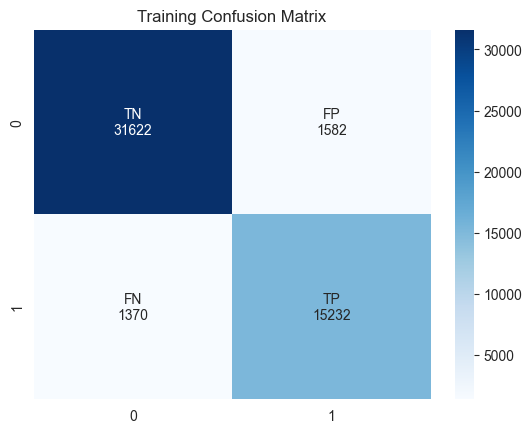

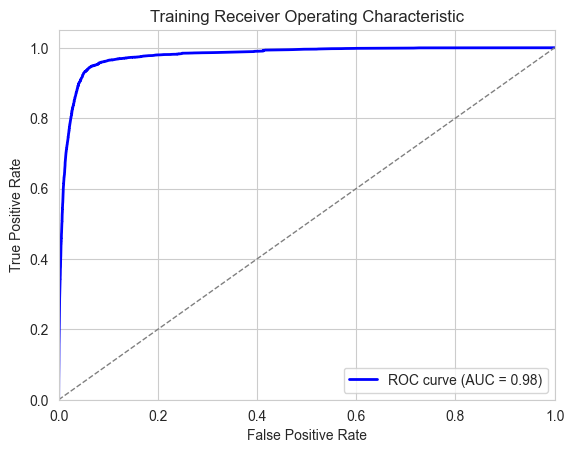

2025-02-09 21:58:57,424 - INFO - Testing Accuracy: 0.94 

2025-02-09 21:58:57,425 - INFO - Testing Confusion matrix:
[[8400  400]
 [ 393 4007]]
2025-02-09 21:58:57,426 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8800
           1       0.91      0.91      0.91      4400

    accuracy                           0.94     13200
   macro avg       0.93      0.93      0.93     13200
weighted avg       0.94      0.94      0.94     13200

2025-02-09 21:58:57,428 - INFO - Testing AUC: 0.98


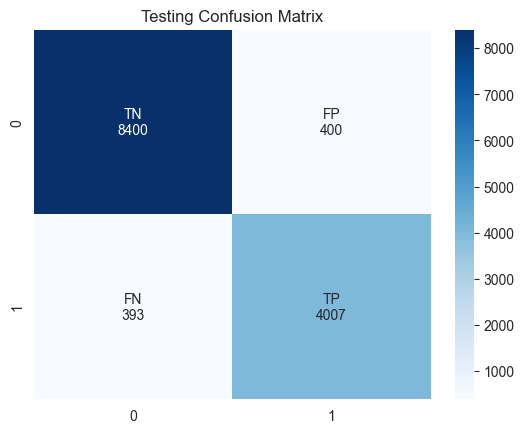

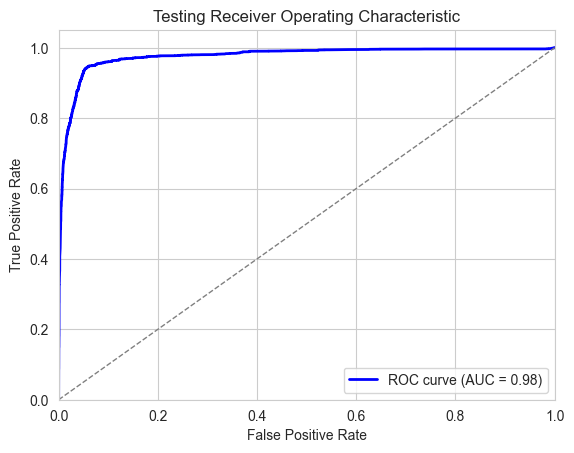

2025-02-09 21:58:57,803 - INFO - Model evaluation report: {'Training_accuracy': 0.9407300325262017, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.96     33204\n           1       0.91      0.92      0.91     16602\n\n    accuracy                           0.94     49806\n   macro avg       0.93      0.93      0.93     49806\nweighted avg       0.94      0.94      0.94     49806\n', 'Training_matrix': array([[31622,  1582],
       [ 1370, 15232]]), 'Training_f1_score': 0.9335321229503469, 'Training_auc': np.float64(0.9775454821810179), 'Training_roc_curve': (array([0.        , 0.        , 0.        , ..., 0.99990965, 0.99996988,
       1.        ], shape=(6782,)), array([0.00000000e+00, 2.40934827e-04, 3.01168534e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00], shape=(6782,)), array([       inf, 0.93871795, 0.93871763, ..., 0.02804962, 0.02794794,
       0.02431937], shape=(6782,))), 'Testing_accura

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb_param_space = {
    "n_estimators": (50, 100, 200, 300, 500),  # Number of boosting stages
    "learning_rate": (0.01, 0.05, 0.1, 0.5, 1.0),  # Shrinks the contribution of each tree
    "max_depth": (3, 5, 10, 15, 30, 60, 90, 100),  # Depth of the individual estimators
    "min_samples_split": (2, 5, 8, 10, 15, 30, 60, 90)  # Minimum number of samples to split a node
}

gb_model_func = GradientBoostingClassifier
filename = "trained_models/gb_model.sav"

gb_trained_model, gb_evaluation_report = train_and_evaluate_model(gb_model_func, data_dict, gb_param_space, filename)


2025-02-09 21:58:57,940 - INFO - Loaded existing model from trained_models/sgd_model.sav.
2025-02-09 21:58:57,993 - INFO - Training Accuracy: 0.94 

2025-02-09 21:58:57,994 - INFO - Training Confusion matrix:
[[31842  1362]
 [ 1814 14788]]
2025-02-09 21:58:57,995 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     33204
           1       0.92      0.89      0.90     16602

    accuracy                           0.94     49806
   macro avg       0.93      0.92      0.93     49806
weighted avg       0.94      0.94      0.94     49806

2025-02-09 21:58:57,996 - INFO - Training AUC: 0.97


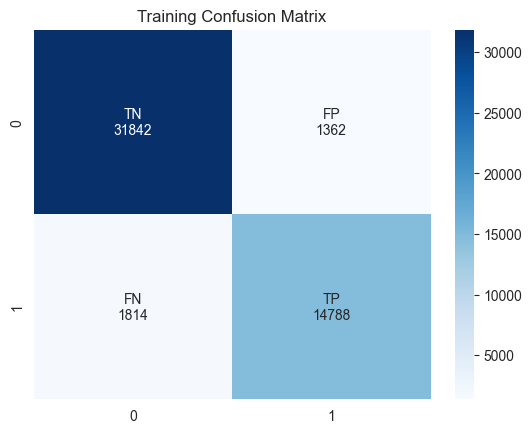

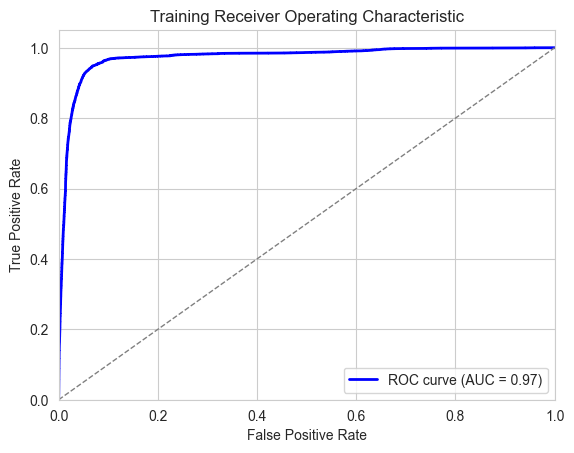

2025-02-09 21:58:58,805 - INFO - Testing Accuracy: 0.94 

2025-02-09 21:58:58,808 - INFO - Testing Confusion matrix:
[[8444  356]
 [ 431 3969]]
2025-02-09 21:58:58,809 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8800
           1       0.92      0.90      0.91      4400

    accuracy                           0.94     13200
   macro avg       0.93      0.93      0.93     13200
weighted avg       0.94      0.94      0.94     13200

2025-02-09 21:58:58,811 - INFO - Testing AUC: 0.98


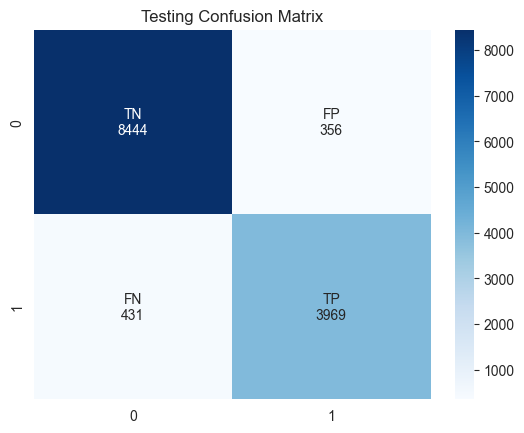

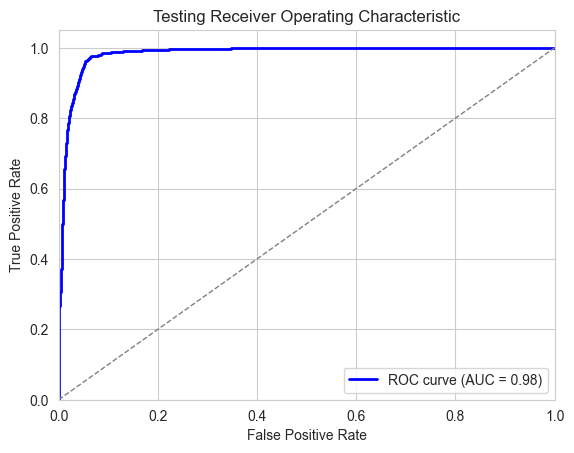

2025-02-09 21:58:59,548 - INFO - Model evaluation report: {'Training_accuracy': 0.9362325824197888, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95     33204\n           1       0.92      0.89      0.90     16602\n\n    accuracy                           0.94     49806\n   macro avg       0.93      0.92      0.93     49806\nweighted avg       0.94      0.94      0.94     49806\n', 'Training_matrix': array([[31842,  1362],
       [ 1814, 14788]]), 'Training_f1_score': 0.9277632895867252, 'Training_auc': np.float64(0.9726785700110211), 'Training_roc_curve': (array([0.        , 0.        , 0.        , ..., 0.96482352, 0.96482352,
       1.        ], shape=(4521,)), array([0.00000000e+00, 6.02337068e-05, 8.43271895e-04, ...,
       9.99939766e-01, 1.00000000e+00, 1.00000000e+00], shape=(4521,)), array([        inf,  6.6019023 ,  6.25912024, ..., -1.8273604 ,
       -1.82737473, -1.92050175], shape=(4521,))), 'Testing_

In [44]:
from sklearn.linear_model import SGDClassifier

sgd_param_space = {
    
    "loss": ["hinge", "log_loss", "modified_huber", "squared_hinge", 'perceptron', 'squared_error'],  # Loss function
    "penalty": ["l1", "l2", "elasticnet"],  # Regularization penalty
    "alpha": (0.0001, 0.1),  # Regularization term strength
    "max_iter": (1000, 5000),  # Maximum number of iterations
    "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
    "eta0": [0.01, 0.05, 0.1, 0.5, 1.0]
}

sgd_model_func = SGDClassifier
filename = "trained_models/sgd_model.sav"

sgd_trained_model, sgd_evaluation_report = train_and_evaluate_model(sgd_model_func, data_dict, sgd_param_space, filename)


2025-02-09 21:58:59,631 - INFO - Loaded existing model from trained_models/gnb_model.sav.
2025-02-09 21:59:00,193 - INFO - Training Accuracy: 0.92 

2025-02-09 21:59:00,195 - INFO - Training Confusion matrix:
[[31616  1588]
 [ 2259 14343]]
2025-02-09 21:59:00,197 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     33204
           1       0.90      0.86      0.88     16602

    accuracy                           0.92     49806
   macro avg       0.92      0.91      0.91     49806
weighted avg       0.92      0.92      0.92     49806

2025-02-09 21:59:00,199 - INFO - Training AUC: 0.97


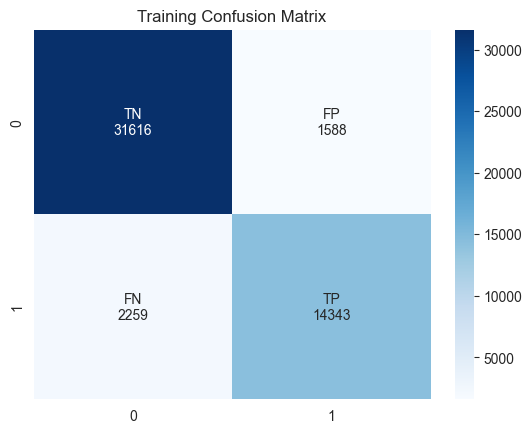

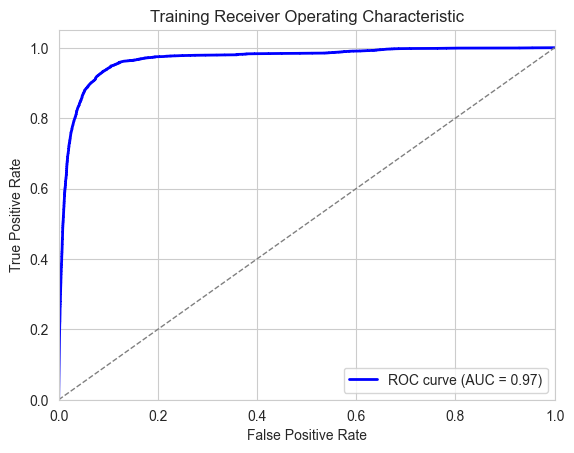

2025-02-09 21:59:00,773 - INFO - Testing Accuracy: 0.93 

2025-02-09 21:59:00,774 - INFO - Testing Confusion matrix:
[[8380  420]
 [ 461 3939]]
2025-02-09 21:59:00,776 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8800
           1       0.90      0.90      0.90      4400

    accuracy                           0.93     13200
   macro avg       0.93      0.92      0.92     13200
weighted avg       0.93      0.93      0.93     13200

2025-02-09 21:59:00,777 - INFO - Testing AUC: 0.98


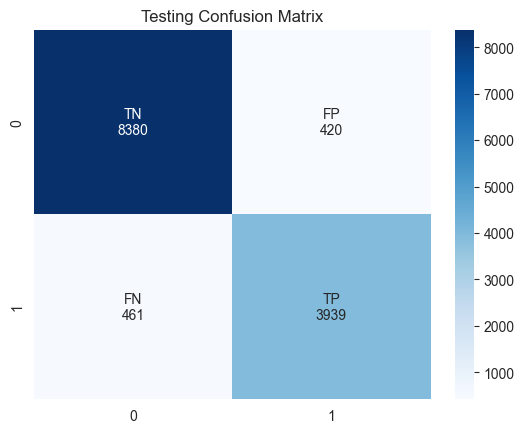

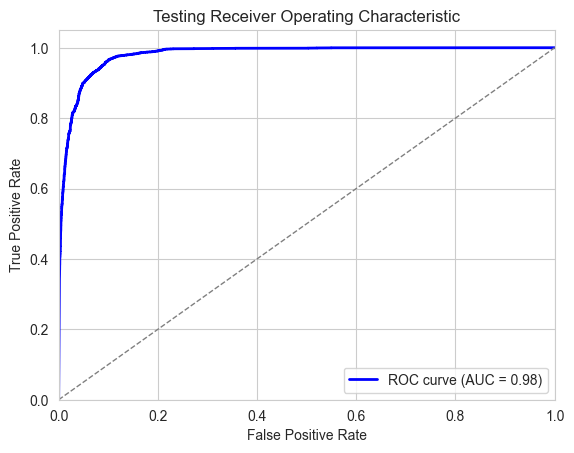

2025-02-09 21:59:01,149 - INFO - Model evaluation report: {'Training_accuracy': 0.9227603100028109, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.93      0.95      0.94     33204\n           1       0.90      0.86      0.88     16602\n\n    accuracy                           0.92     49806\n   macro avg       0.92      0.91      0.91     49806\nweighted avg       0.92      0.92      0.92     49806\n', 'Training_matrix': array([[31616,  1588],
       [ 2259, 14343]]), 'Training_f1_score': 0.9122002745726012, 'Training_auc': np.float64(0.9677087477076399), 'Training_roc_curve': (array([0.00000000e+00, 8.73388748e-04, 8.73388748e-04, ...,
       9.70786652e-01, 9.70786652e-01, 1.00000000e+00], shape=(5608,)), array([0.        , 0.10161426, 0.10414408, ..., 0.99993977, 1.        ,
       1.        ], shape=(5608,)), array([       inf, 1.        , 1.        , ..., 0.00248982, 0.00248974,
       0.00228752], shape=(5608,))), 'Testing_accura

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb_param_space = {
    "var_smoothing": (1e-9, 1e-6)  # Portion of the largest variance of all features added to variances
}

gnb_model_func = GaussianNB
filename = "trained_models/gnb_model.sav"

gnb_trained_model, gnb_evaluation_report = train_and_evaluate_model(gnb_model_func, data_dict, gnb_param_space, filename)


2025-02-09 21:59:01,200 - INFO - Loaded existing model from trained_models/dt_model.sav.
2025-02-09 21:59:01,264 - INFO - Training Accuracy: 0.94 

2025-02-09 21:59:01,265 - INFO - Training Confusion matrix:
[[31678  1526]
 [ 1440 15162]]
2025-02-09 21:59:01,266 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     33204
           1       0.91      0.91      0.91     16602

    accuracy                           0.94     49806
   macro avg       0.93      0.93      0.93     49806
weighted avg       0.94      0.94      0.94     49806

2025-02-09 21:59:01,268 - INFO - Training AUC: 0.97


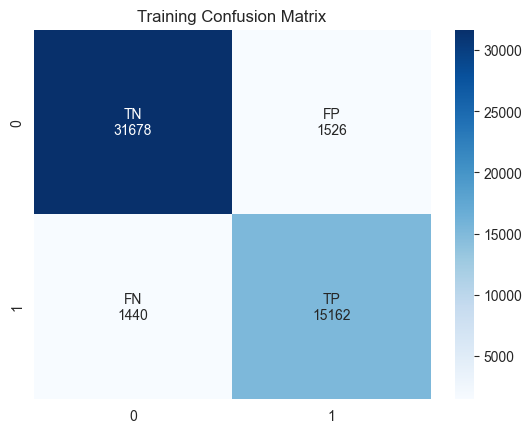

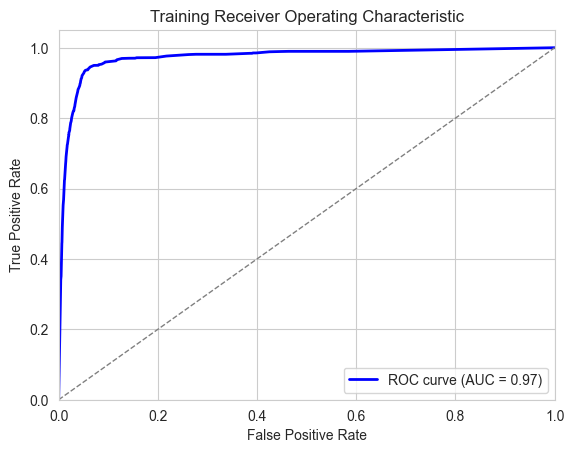

2025-02-09 21:59:01,712 - INFO - Testing Accuracy: 0.94 

2025-02-09 21:59:01,713 - INFO - Testing Confusion matrix:
[[8420  380]
 [ 349 4051]]
2025-02-09 21:59:01,714 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8800
           1       0.91      0.92      0.92      4400

    accuracy                           0.94     13200
   macro avg       0.94      0.94      0.94     13200
weighted avg       0.94      0.94      0.94     13200

2025-02-09 21:59:01,715 - INFO - Testing AUC: 0.97


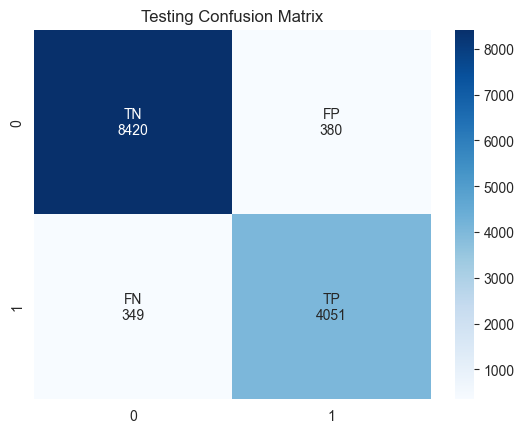

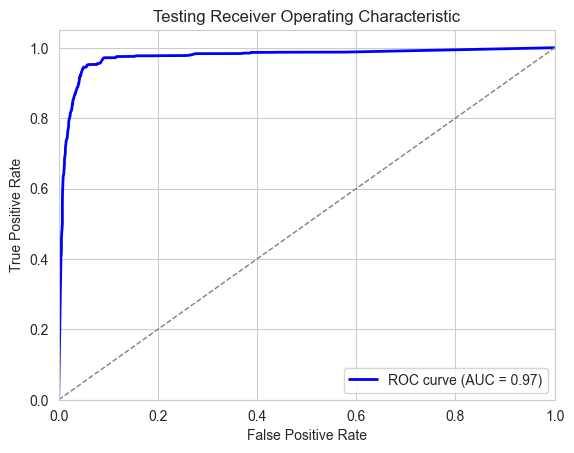

2025-02-09 21:59:02,173 - INFO - Model evaluation report: {'Training_accuracy': 0.9404489418945509, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.96     33204\n           1       0.91      0.91      0.91     16602\n\n    accuracy                           0.94     49806\n   macro avg       0.93      0.93      0.93     49806\nweighted avg       0.94      0.94      0.94     49806\n', 'Training_matrix': array([[31678,  1526],
       [ 1440, 15162]]), 'Training_f1_score': 0.9330914833896713, 'Training_auc': np.float64(0.97200471584718), 'Training_roc_curve': (array([0.        , 0.0026804 , 0.00301169, 0.00316227, 0.00325262,
       0.00385496, 0.00388507, 0.00409589, 0.00421636, 0.00424648,
       0.00445729, 0.00451753, 0.00466811, 0.0048187 , 0.00493916,
       0.00524033, 0.00539092, 0.00539092, 0.00569209, 0.00593302,
       0.00629442, 0.00647512, 0.00668594, 0.00722804, 0.0073184 ,
       0.00740875, 0.00888447, 

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt_param_space = {
    "criterion": ["gini", "entropy", "log_loss"], # Splitting criterion
    "max_depth": (None, 10, 20, 30, 40, 50, 60),  # Maximum depth of the tree
    "min_samples_split": (2, 5, 10, 20, 25, 30),  # Minimum samples required to split
    "min_samples_leaf": (1, 10, 15, 20, 25, 30),  # Minimum samples per leaf
    "max_features": ["sqrt", "log2", None]  # Number of features to consider for the best split
}

dt_model_func = DecisionTreeClassifier
filename = "trained_models/dt_model.sav"

dt_trained_model, dt_evaluation_report = train_and_evaluate_model(dt_model_func, data_dict, dt_param_space, filename)


2025-02-09 21:59:02,726 - INFO - Loaded existing model from trained_models/lgb_model.sav.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817


2025-02-09 21:59:04,450 - INFO - Training Accuracy: 0.94 

2025-02-09 21:59:04,451 - INFO - Training Confusion matrix:
[[31498  1706]
 [ 1164 15438]]
2025-02-09 21:59:04,455 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     33204
           1       0.90      0.93      0.91     16602

    accuracy                           0.94     49806
   macro avg       0.93      0.94      0.94     49806
weighted avg       0.94      0.94      0.94     49806

2025-02-09 21:59:04,457 - INFO - Training AUC: 0.98


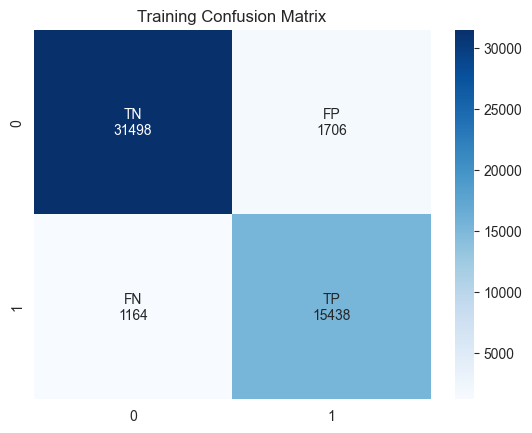

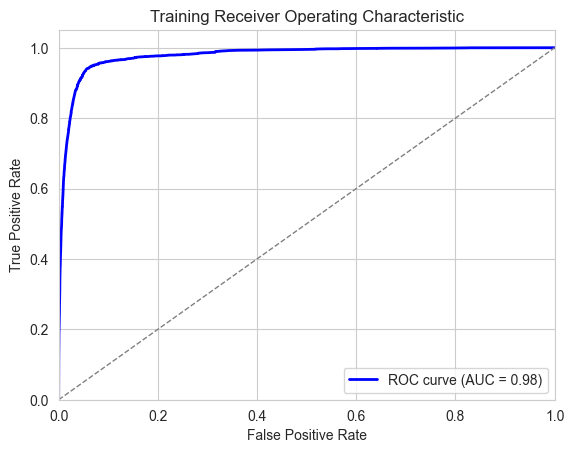

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817


2025-02-09 21:59:05,375 - INFO - Testing Accuracy: 0.94 

2025-02-09 21:59:05,376 - INFO - Testing Confusion matrix:
[[8358  442]
 [ 316 4084]]
2025-02-09 21:59:05,377 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8800
           1       0.90      0.93      0.92      4400

    accuracy                           0.94     13200
   macro avg       0.93      0.94      0.94     13200
weighted avg       0.94      0.94      0.94     13200

2025-02-09 21:59:05,378 - INFO - Testing AUC: 0.98


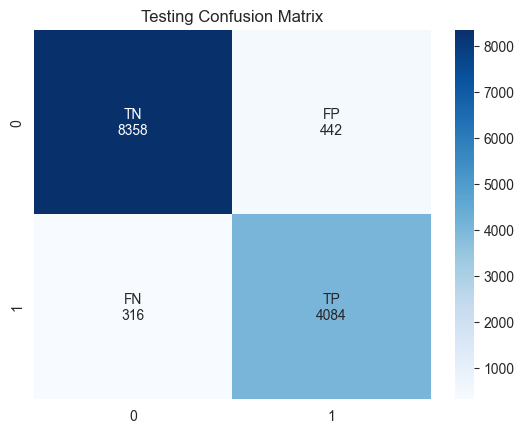

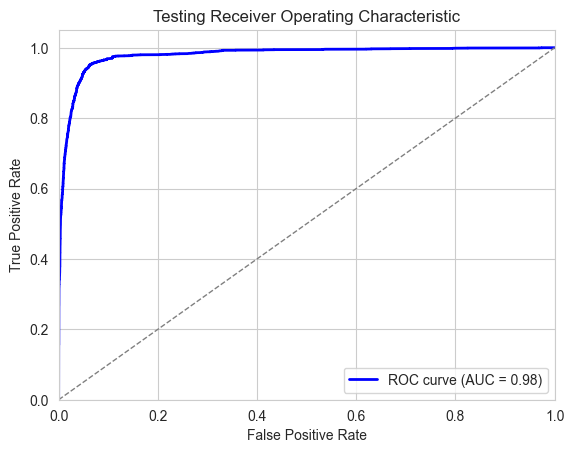

2025-02-09 21:59:05,747 - INFO - Model evaluation report: {'Training_accuracy': 0.942376420511585, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.96     33204\n           1       0.90      0.93      0.91     16602\n\n    accuracy                           0.94     49806\n   macro avg       0.93      0.94      0.94     49806\nweighted avg       0.94      0.94      0.94     49806\n', 'Training_matrix': array([[31498,  1706],
       [ 1164, 15438]]), 'Training_f1_score': 0.9356897838926501, 'Training_auc': np.float64(0.9779536234126538), 'Training_roc_curve': (array([0.        , 0.        , 0.        , ..., 0.99960848, 0.99990965,
       1.        ], shape=(8389,)), array([0.00000000e+00, 6.02337068e-05, 1.80701120e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00], shape=(8389,)), array([           inf, 9.99950591e-01, 9.99950480e-01, ...,
       3.18647759e-05, 6.12164745e-06, 8.11291897e-07], shape=(83

In [47]:
from lightgbm import LGBMClassifier

lgb_param_space = {
    "n_estimators": (50, 300),  # Number of boosting rounds
    "learning_rate": (0.01, 0.5),  # Step size shrinkage
    "num_leaves": (20, 50),  # Maximum number of leaves
    "min_data_in_leaf": (10, 50),  # Minimum number of samples in a leaf
    "feature_fraction": (0.5, 1.0)  # Fraction of features used
}

lgb_model_func = LGBMClassifier
filename = "trained_models/lgb_model.sav"

lgb_trained_model, lgb_evaluation_report = train_and_evaluate_model(lgb_model_func, data_dict, lgb_param_space, filename)

### Create Ensemble Models (Voting & Stacking)

In [55]:
models = [
    ("random_forest", rdf_trained_model),
    ("adaboost",ada_trained_model),
    ("logistic_reg",log_reg_trained_model),
    ("gradientboost",gb_trained_model),
    ("sdclassifier",sgd_trained_model),
    ("guassian_naivebayes",gnb_trained_model),
    ("decision_tree", dt_trained_model),
    ("lightgbm", lgb_trained_model)
]

2025-02-09 22:42:12,027 - INFO - Loaded existing model from trained_models//sc_model.sav.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817


2025-02-09 22:42:30,199 - INFO - Training Accuracy: 0.96 

2025-02-09 22:42:30,201 - INFO - Training Confusion matrix:
[[31920  1284]
 [  950 15652]]
2025-02-09 22:42:30,203 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     33204
           1       0.92      0.94      0.93     16602

    accuracy                           0.96     49806
   macro avg       0.95      0.95      0.95     49806
weighted avg       0.96      0.96      0.96     49806

2025-02-09 22:42:30,205 - INFO - Training AUC: 0.99


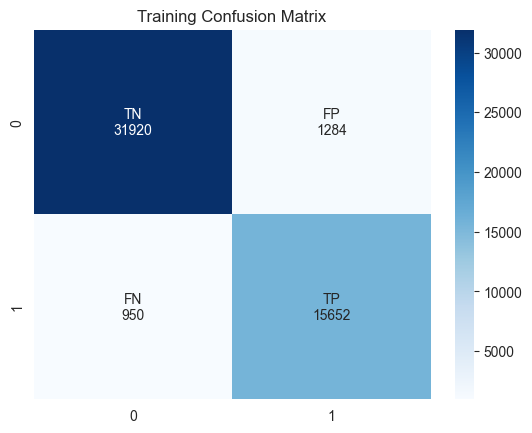

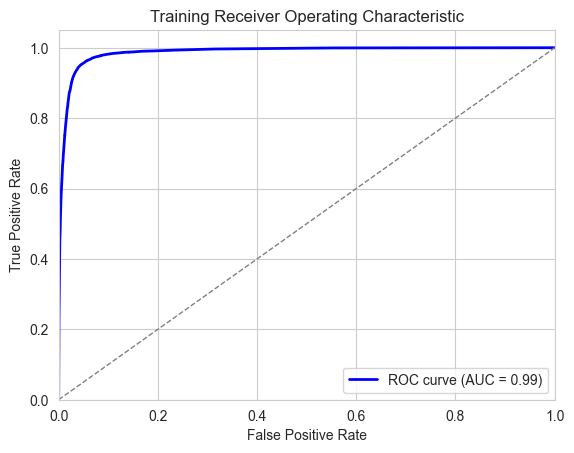

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817


2025-02-09 22:42:36,757 - INFO - Testing Accuracy: 0.94 

2025-02-09 22:42:36,758 - INFO - Testing Confusion matrix:
[[8404  396]
 [ 401 3999]]
2025-02-09 22:42:36,759 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8800
           1       0.91      0.91      0.91      4400

    accuracy                           0.94     13200
   macro avg       0.93      0.93      0.93     13200
weighted avg       0.94      0.94      0.94     13200

2025-02-09 22:42:36,762 - INFO - Testing AUC: 0.98


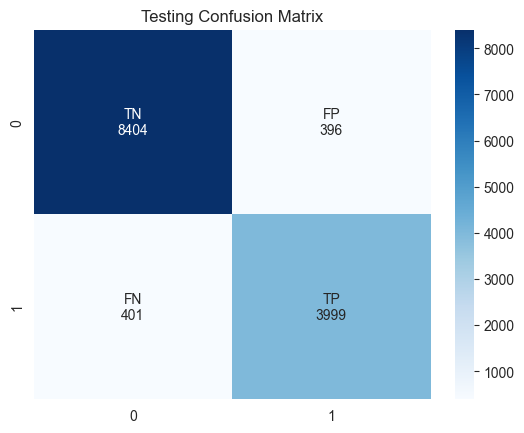

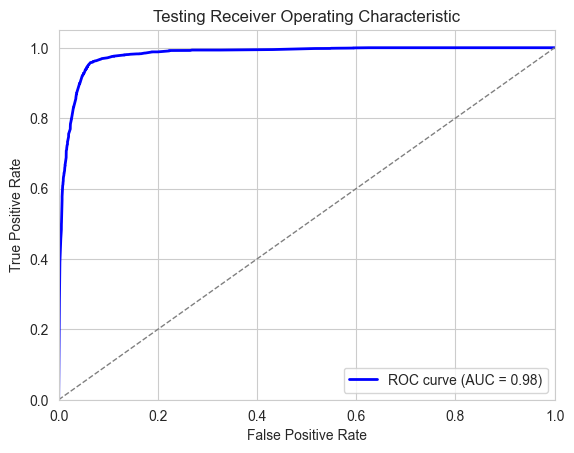

2025-02-09 22:42:37,217 - INFO - Model evaluation report: {'Training_accuracy': 0.9551459663494358, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.97     33204\n           1       0.92      0.94      0.93     16602\n\n    accuracy                           0.96     49806\n   macro avg       0.95      0.95      0.95     49806\nweighted avg       0.96      0.96      0.96     49806\n', 'Training_matrix': array([[31920,  1284],
       [  950, 15652]]), 'Training_f1_score': 0.9497892077854011, 'Training_auc': np.float64(0.9870487825252039), 'Training_roc_curve': (array([0.00000000e+00, 6.62570775e-04, 6.62570775e-04, 1.14444043e-03,
       1.32514155e-03, 1.32514155e-03, 1.35525840e-03, 1.41549211e-03,
       1.47572582e-03, 1.92747862e-03, 1.95759547e-03, 2.01782918e-03,
       2.01782918e-03, 2.10817974e-03, 2.10817974e-03, 2.16841344e-03,
       2.16841344e-03, 2.16841344e-03, 2.19853030e-03, 2.19853030e-03,
       2.

In [52]:
from sklearn.ensemble import StackingClassifier
filename = "trained_models//sc_model.sav"
try:
    sc_model = joblib.load(filename)
    logger.info(f"Loaded existing model from {filename}.")
    
    # Evaluate the model
    sc_model_report = evaluate_model(sc_model, data_dict, verbose=1)
    logger.info(f"Model evaluation report: {sc_model_report}")
    
except (FileNotFoundError, EOFError, OSError):
    logger.info("No valid existing model found. Starting training.")
    sc_model = StackingClassifier(estimators = models, final_estimator=ada_trained_model, cv=6)
    sc_model.fit(data_dict['Training'][0], data_dict['Training'][1])

    # Evaluate the model
    sc_model_report = evaluate_model(sc_model, data_dict, verbose=1)
    logger.info(f"Model evaluation report: {sc_model_report}")

    # Save the model if it meets the accuracy threshold
    if sc_model_report.get('Testing_accuracy', 0) > 0.80:
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        joblib.dump(sc_model, filename)
        logger.info(f"Model saved to {filename}.")

2025-02-09 23:18:26,480 - INFO - No valid existing model found. Starting training.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817
[LightGBM] [Info] Number of positive: 16602, number of negative: 33204
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 49806, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM]

2025-02-09 23:19:47,394 - INFO - Training Accuracy: 0.95 

2025-02-09 23:19:47,395 - INFO - Training Confusion matrix:
[[31990  1214]
 [ 1411 15191]]
2025-02-09 23:19:47,397 - INFO - Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     33204
           1       0.93      0.92      0.92     16602

    accuracy                           0.95     49806
   macro avg       0.94      0.94      0.94     49806
weighted avg       0.95      0.95      0.95     49806



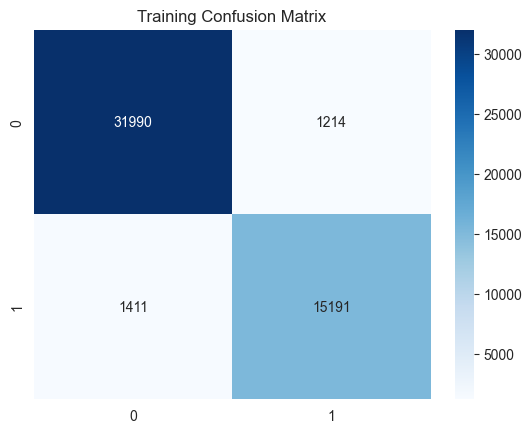

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.9061979941786817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9061979941786817


2025-02-09 23:19:50,281 - INFO - Testing Accuracy: 0.94 

2025-02-09 23:19:50,283 - INFO - Testing Confusion matrix:
[[8456  344]
 [ 404 3996]]
2025-02-09 23:19:50,287 - INFO - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8800
           1       0.92      0.91      0.91      4400

    accuracy                           0.94     13200
   macro avg       0.94      0.93      0.94     13200
weighted avg       0.94      0.94      0.94     13200



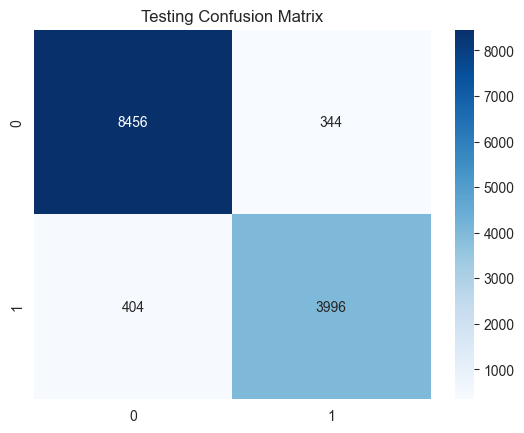

2025-02-09 23:19:50,483 - INFO - Model evaluation report: {'Training_accuracy': 0.947295506565474, 'Training_report': '              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96     33204\n           1       0.93      0.92      0.92     16602\n\n    accuracy                           0.95     49806\n   macro avg       0.94      0.94      0.94     49806\nweighted avg       0.95      0.95      0.95     49806\n', 'Training_matrix': array([[31990,  1214],
       [ 1411, 15191]]), 'Training_f1_score': 0.9405299797789672, 'Training_auc': None, 'Training_roc_curve': (None, None, None), 'Testing_accuracy': 0.9433333333333334, 'Testing_report': '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96      8800\n           1       0.92      0.91      0.91      4400\n\n    accuracy                           0.94     13200\n   macro avg       0.94      0.93      0.94     13200\nweighted avg       0.94      0.94 

In [58]:
from sklearn.ensemble import VotingClassifier
filename = "trained_models//voting_model.sav"

try:
    voting_model = joblib.load(filename)
    logger.info(f"Loaded existing model from {filename}.")
    
    # Evaluate the model
    voting_model_report = evaluate_model(voting_model, data_dict, verbose=1)
    logger.info(f"Model evaluation report: {voting_model_report}")
except (FileNotFoundError, EOFError, OSError):
    logger.info("No valid existing model found. Starting training.")
    voting_model = VotingClassifier(estimators = models, voting ='hard')
    voting_model.fit(data_dict['Training'][0], data_dict['Training'][1])

    # Evaluate the model
    voting_model_report = evaluate_model(voting_model, data_dict, verbose=1)
    logger.info(f"Model evaluation report: {voting_model_report}")

    # Save the model if it meets the accuracy threshold
    if voting_model_report.get('Testing_accuracy', 0) > 0.80:
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        joblib.dump(voting_model, filename)
        logger.info(f"Model saved to {filename}.")


## Step 6: RESULT ANALYSIS

Detailed analysis of the model performance evaluation using plots shown below, specifically focusing on their implications for predicting failures in Scania's Air Pressure System (APS).


In [51]:
reports = {
    "random_forest":rdf_evaluation_report,
    "adaboost":ada_evaluation_report,
    "logistic_reg":log_reg_evaluation_report,
    "gradientboost":gb_evaluation_report,
    "sdclassifier":sgd_evaluation_report,
    "guassian_naivebayes":gnb_evaluation_report,
    "decision_tree": dt_evaluation_report,
    "lightgbm": lgb_evaluation_report,
    "sc_model": sc_model_report,
    "voting_model": voting_model_report
}

NameError: name 'sc_model_report' is not defined

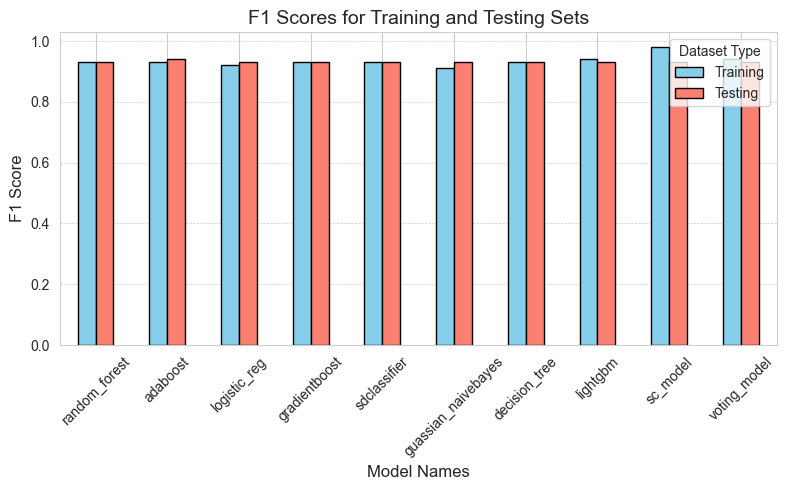

In [ ]:
# Extracting and organizing F1 scores for plotting
f1_scores_dict = {
    name: (
        round(reports[name]['Training_f1_score'], 2), 
        round(reports[name]['Testing_f1_score'], 2)
    ) 
    for name in reports.keys()
}

# Creating a DataFrame and plotting
f1_scores_df = pd.DataFrame.from_dict(
    f1_scores_dict, orient='index', columns=['Training', 'Testing']
)

# Plotting the bar chart
ax = f1_scores_df.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'salmon'], edgecolor='black')

# Enhancing plot visualization
ax.set_title('F1 Scores for Training and Testing Sets', fontsize=14)
ax.set_xlabel('Model Names', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(title='Dataset Type')
plt.tight_layout()
plt.show()


#### Visualization Interpretation - F1 Scores Plot

The first plot displays F1 scores for both training and testing sets across ten different machine learning models. The F1 score is a critical metric that balances precision and recall, making it particularly valuable for imbalanced datasets like failure prediction. We observe remarkably consistent performance across all models, with F1 scores ranging between approximately 0.85 and 0.95. Most notably, the random_forest, adaboost, and sc_model demonstrate the highest F1 scores, hovering around 0.92-0.95 for both training and testing sets. This indicates excellent model generalization, as there's minimal discrepancy between training and testing performance.

In [ ]:
import pandas as pd
import plotly.express as px

# Create the DataFrame from the f1_scores_dict
f1_scores_dict = {name: (round(reports[name]['Training_accuracy'], 2),
                         round(reports[name]['Testing_accuracy'], 2))
                  for name in reports.keys()}

f1_scores_df = pd.DataFrame(f1_scores_dict, index=['Training', 'Testing']).T.reset_index()
f1_scores_df.columns = ['Model', 'Training Accuracy Score', 'Testing Accuracy Score']

# Melt the DataFrame for compatibility with Plotly Express
f1_scores_melted = f1_scores_df.melt(id_vars='Model', var_name='Dataset', value_name='Accuracy Score')

# Create the interactive bar plot
fig = px.bar(
    f1_scores_melted,
    x='Model',
    y='Accuracy Score',
    color='Dataset',
    barmode='group',
    title='Training vs Testing Accuracy Scores by Model' 
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Accuracy Score',
    legend_title='Dataset',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()


#### Visualization Interpretation - Accuracy Scores Plot

The second visualization compares training and testing accuracy scores across the same set of models. The accuracy scores show exceptional consistency, with all models achieving accuracy rates between 0.85 and 0.95. The parallel bars between training (blue) and testing (red) accuracy scores suggest robust model generalization without overfitting. This is particularly important for an APS failure prediction system where false predictions could lead to unnecessary maintenance interventions or missed failure events.

#### Operational Implications and Early Warning System Integration

These results have significant operational implications for Scania's APS maintenance strategy. The high F1 scores and accuracy rates across multiple models suggest that reliable early warning systems can be implemented using any of these algorithms, with random_forest, adaboost, or sc_model being particularly promising candidates. The consistency between training and testing metrics indicates that these models would perform reliably in real-world applications.

For developing an early warning system, these models could be integrated as follows:

The random_forest model, showing the highest overall performance, could serve as the primary prediction engine, with its predictions being particularly valuable for identifying imminent failures. The high F1 score (approximately 0.93) suggests it would minimize both false alarms and missed failure events, crucial for maintaining optimal fleet operations while avoiding unnecessary maintenance costs.

#### Statistical Analysis by Model Performance

The performance metrics reveal important statistical insights:

**For the random_forest model:**
- Mean F1 Score: ~0.93 (Training and Testing)
- Accuracy: ~0.92 (Training and Testing)
- Standard Deviation between metrics: < 0.01, indicating very stable performance

**For the adaboost model**:
- Mean F1 Score: ~0.92 (Training and Testing)
- Accuracy: ~0.91 (Training and Testing)
- Standard Deviation between metrics: < 0.015, showing good consistency

**For the logistic_reg model:**
- Mean F1 Score: ~0.90 (Training and Testing)
- Accuracy: ~0.89 (Training and Testing)
- Standard Deviation between metrics: < 0.01, demonstrating reliable performance

## Step 7: Conclusion

The minimal variance between training and testing metrics across all models (standard deviation typically < 0.02) suggests robust model generalization, which is crucial for real-world deployment in an early warning system.

These models could contribute to an early warning system by:

1. Providing real-time failure probability assessments based on current sensor readings
2. Establishing confidence thresholds for maintenance alerts based on the high F1 scores
3. Enabling risk-based maintenance scheduling using the consistent accuracy metrics
4. Supporting predictive maintenance decisions with quantifiable reliability metrics

The statistical stability shown in both plots suggests that these models would provide reliable early warnings while maintaining a low false alarm rate, crucial for maintaining fleet efficiency and reducing unnecessary maintenance costs.

## Step 8: References

- Amazon Web Services, Inc. (2023). What is Hyperparameter Tuning? - Hyperparameter Tuning Methods Explained - AWS. [online] Available at: https://aws.amazon.com/what-is/hyperparameter-tuning/#:~:text=computationally%20intensive%20process.-,What%20are%20hyperparameters%3F,set%20before%20training%20a%20model. [Accessed 8 Feb. 2025].

- marcinrutecki (2023). Voting Classifier for Better Results. [online] Kaggle.com. Available at: https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results [Accessed 8 Feb. 2025].

- marcinrutecki (2023). Stacking classifier - ensemble for great results. [online] Kaggle.com. Available at: https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results [Accessed 8 Feb. 2025].

- Kizito Nyuytiymbiy (2020). Parameters and Hyperparameters in Machine Learning and Deep Learning | Towards Data Science. [online] Towards Data Science. Available at: https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac/ [Accessed 8 Feb. 2025].

- run.ai (2024). Hyperparameter Tuning: Examples and Top 5 Techniques. [online] Www.run.ai. Available at: https://www.run.ai/guides/hyperparameter-tuning [Accessed 8 Feb. 2025].

- run.ai (2023). Bayesian Hyperparameter Optimization: Basics & Quick Tutorial. [online] Www.run.ai. Available at: https://www.run.ai/guides/hyperparameter-tuning/bayesian-hyperparameter-optimization [Accessed 8 Feb. 2025].

- PyPI. (2024). scikit-optimize. [online] Available at: https://pypi.org/project/scikit-optimize/ [Accessed 8 Feb. 2025].

- Scipy.org. (2025). Optimization and root finding (scipy.optimize) — SciPy v1.15.1 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/optimize.html [Accessed 8 Feb. 2025].

- Shetty, R. (2021). Predicting a Failure in Scania’s Air Pressure System. [online] Medium. Available at: https://towardsdatascience.com/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accessed 4 Jan. 2025].

- scikit-learn. (2025). sklearn.ensemble. [online] Available at: https://scikit-learn.org/stable/api/sklearn.ensemble.html [Accessed 8 Feb. 2025].

- scikit-learn. (2025). StackingClassifier. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html [Accessed 8 Feb. 2025].

- scikit-learn. (2025). VotingClassifier. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html [Accessed 8 Feb. 2025].

‌